# EDA of Crime_by_place_of_occurrence_2001_2012

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('E:\\India_Crime - Copy\\India_Crime - Copy\\17_Crime_by_place_of_occurrence_2001_2012.csv')
df

STATE/UT  YEAR  RESIDENTIAL PREMISES - Dacoity  \
0       ANDHRA PRADESH  2001                             100   
1    ARUNACHAL PRADESH  2001                               9   
2                ASSAM  2001                             381   
3                BIHAR  2001                             818   
4         CHHATTISGARH  2001                              54   
..                 ...   ...                             ...   
451              DELHI  2012                              10   
452        LAKSHADWEEP  2012                               0   
453         PUDUCHERRY  2012                               1   
454        TOTAL (UTs)  2012                              11   
455  TOTAL (ALL-INDIA)  2012                            1288   

     RESIDENTIAL PREMISES - Robbery  RESIDENTIAL PREMISES - Burglary  \
0                               177                             5158   
1                                26                               99   
2                               191                             1695   
3                               326                             2486   
4                                42                             3336   
..                              ...                              ...   
451                             101                             1249   
452                               0                                3   
453                               4                               47   
454                             123                             1515   
455                            2821                            60698   

     RESIDENTIAL PREMISES - Theft  HIGHWAYS - Dacoity  HIGHWAYS - Robbery  \
0                            4257                  57                 172   
1                             131                   0                   0   
2                            2901                  46                 136   
3                            4741                 162                 826   
4                            1417                  10                  38   
..                            ...                 ...                 ...   
451                          7076                   1                  32   
452                             7                   0                   0   
453                            42                   0                   0   
454                          7974                   1                  32   
455                         81861                 838                5000   

     HIGHWAYS - Burglary  HIGHWAYS - Theft  ...  \
0                     31                74  ...   
1                      0                 8  ...   
2                      7                87  ...   
3                      0               257  ...   
4                     12                72  ...   
..                   ...               ...  ...   
451                    0               189  ...   
452                    0                 0  ...   
453                    0                 0  ...   
454                    0               199  ...   
455                  316             27802  ...   

     COMMERCIAL ESTABLISHMENTS - Burglary  COMMERCIAL ESTABLISHMENTS - Theft  \
0                                    1041                               2502   
1                                      84                                 54   
2                                     442                                967   
3                                     231                                686   
4                                     370                                299   
..                                    ...                                ...   
451                                   285                               1370   
452                                     0                                  0   
453                                    26                                 20   
454                                   412 

In [3]:
df['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'TOTAL (STATES)', 'A & N ISLANDS', 'CHANDIGARH',
       'D & N HAVELI', 'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP',
       'PUDUCHERRY', 'TOTAL (UTs)', 'TOTAL (ALL-INDIA)'], dtype=object)

In [4]:
#clean unusefull data because we will calculate total numbers of each crime for more insights
df = df.drop(list(df[df['STATE/UT'] == 'TOTAL (UTs)'].index))
df = df.drop(list(df[df['STATE/UT'] == 'TOTAL (ALL-INDIA)'].index))
df = df.drop(list(df[df['STATE/UT'] == 'TOTAL (STATES)'].index))

In [5]:
df.shape

(420, 34)

In [6]:
df.columns

Index(['STATE/UT', 'YEAR', 'RESIDENTIAL PREMISES - Dacoity',
       'RESIDENTIAL PREMISES - Robbery', 'RESIDENTIAL PREMISES - Burglary',
       'RESIDENTIAL PREMISES - Theft', 'HIGHWAYS - Dacoity',
       'HIGHWAYS - Robbery', 'HIGHWAYS - Burglary', 'HIGHWAYS - Theft',
       'RIVER and SEA - Dacoity', 'RIVER and SEA - Robbery',
       'RIVER and SEA - Burglary', 'RIVER and SEA - Theft',
       'RAILWAYS - Dacoity', 'RAILWAYS - Robbery', 'RAILWAYS - Burglary',
       'RAILWAYS - Theft', 'BANKS - Dacoity', 'BANKS - Robbery',
       'BANKS - Burglary', 'BANKS - Theft',
       'COMMERCIAL ESTABLISHMENTS - Dacoity',
       'COMMERCIAL ESTABLISHMENTS - Robbery',
       'COMMERCIAL ESTABLISHMENTS - Burglary',
       'COMMERCIAL ESTABLISHMENTS - Theft', 'OTHER PLACES - Dacoity',
       'OTHER PLACES - Robbery', 'OTHER PLACES - Burglary',
       'OTHER PLACES - Theft', 'TOTAL - Dacoity', 'TOTAL - Robbery',
       'TOTAL - Burglary', 'TOTAL - Theft'],
      dtype='object')

In [7]:
#add column of overall crimes
df['overall crimes'] = df['TOTAL - Dacoity'] + df['TOTAL - Burglary'] + df['TOTAL - Robbery'] + df['TOTAL - Theft']

In [8]:
df.head(5)

STATE/UT  YEAR  RESIDENTIAL PREMISES - Dacoity  \
0     ANDHRA PRADESH  2001                             100   
1  ARUNACHAL PRADESH  2001                               9   
2              ASSAM  2001                             381   
3              BIHAR  2001                             818   
4       CHHATTISGARH  2001                              54   

   RESIDENTIAL PREMISES - Robbery  RESIDENTIAL PREMISES - Burglary  \
0                             177                             5158   
1                              26                               99   
2                             191                             1695   
3                             326                             2486   
4                              42                             3336   

   RESIDENTIAL PREMISES - Theft  HIGHWAYS - Dacoity  HIGHWAYS - Robbery  \
0                          4257                  57                 172   
1                           131                   0                   0   
2                          2901                  46                 136   
3                          4741                 162                 826   
4                          1417                  10                  38   

   HIGHWAYS - Burglary  HIGHWAYS - Theft  ...  \
0                   31                74  ...   
1                    0                 8  ...   
2                    7                87  ...   
3                    0               257  ...   
4                   12                72  ...   

   COMMERCIAL ESTABLISHMENTS - Theft  OTHER PLACES - Dacoity  \
0                               2502                      37   
1                                 54                       8   
2                                967                      77   
3                                686                     210   
4                                299                      15   

   OTHER PLACES - Robbery  OTHER PLACES - Burglary  OTHER PLACES - Theft  \
0                     232                      862                  8849   
1                      40                       65                   249   
2                     261                      271                  1342   
3                     880                      505                  2582   
4                     239                      420                  2835   

   TOTAL - Dacoity  TOTAL - Robbery  TOTAL - Burglary  TOTAL - Theft  \
0              214              629              7220          16751   
1               22               84               248            443   
2              532              687              2423           5367   
3             1291             2203              3233           9701   
4               87              338              4144           4812   

   overall crimes  
0           24814  
1             797  
2            9009  
3           16428  
4            9381  

[5 rows x 35 columns]

In [9]:
#check for null values
df.isnull().sum()

STATE/UT                                0
YEAR                                    0
RESIDENTIAL PREMISES - Dacoity          0
RESIDENTIAL PREMISES - Robbery          0
RESIDENTIAL PREMISES - Burglary         0
RESIDENTIAL PREMISES - Theft            0
HIGHWAYS - Dacoity                      0
HIGHWAYS - Robbery                      0
HIGHWAYS - Burglary                     0
HIGHWAYS - Theft                        0
RIVER and SEA - Dacoity                 0
RIVER and SEA - Robbery                 0
RIVER and SEA - Burglary                0
RIVER and SEA - Theft                   0
RAILWAYS - Dacoity                      0
RAILWAYS - Robbery                      0
RAILWAYS - Burglary                     0
RAILWAYS - Theft                        0
BANKS - Dacoity                         0
BANKS - Robbery                         0
BANKS - Burglary                        0
BANKS - Theft                           0
COMMERCIAL ESTABLISHMENTS - Dacoity     0
COMMERCIAL ESTABLISHMENTS - Robber

There are NO null values

In [10]:
#check for if there are states with zero crimes
df[df['overall crimes'] == 0]

Empty DataFrame
Columns: [STATE/UT, YEAR, RESIDENTIAL PREMISES - Dacoity, RESIDENTIAL PREMISES - Robbery, RESIDENTIAL PREMISES - Burglary, RESIDENTIAL PREMISES - Theft, HIGHWAYS - Dacoity, HIGHWAYS - Robbery, HIGHWAYS - Burglary, HIGHWAYS - Theft, RIVER and SEA - Dacoity, RIVER and SEA - Robbery, RIVER and SEA - Burglary, RIVER and SEA - Theft, RAILWAYS - Dacoity, RAILWAYS - Robbery, RAILWAYS - Burglary, RAILWAYS - Theft, BANKS - Dacoity, BANKS - Robbery, BANKS - Burglary, BANKS - Theft, COMMERCIAL ESTABLISHMENTS - Dacoity, COMMERCIAL ESTABLISHMENTS - Robbery, COMMERCIAL ESTABLISHMENTS - Burglary, COMMERCIAL ESTABLISHMENTS - Theft, OTHER PLACES - Dacoity, OTHER PLACES - Robbery, OTHER PLACES - Burglary, OTHER PLACES - Theft, TOTAL - Dacoity, TOTAL - Robbery, TOTAL - Burglary, TOTAL - Theft, overall crimes]
Index: []

[0 rows x 35 columns]

There are NO satets with zero crimes of properties so no need to clean more data

In [11]:
df1 = pd.read_csv('E:\\Datatrained\\Castpone project\\Data of states.csv')
df1

STATE/UT  population litercay rate  Area km^2
0       A & N ISLANDS      380581        86.63%       8249
1      ANDHRA PRADESH    84580777        67.02%     162970
2   ARUNACHAL PRADESH     1383727        65.38%      83743
3               ASSAM    31205576        72.19%      78438
4               BIHAR   104099452        61.80%      94163
5          CHANDIGARH     1055450        86.05%        114
6        CHHATTISGARH    25545198        70.28%     135192
7        D & N HAVELI      343709        76.24%        491
8         DAMAN & DIU      243247        87.10%        112
9               DELHI    16787941        86.21%       1483
10                GOA     1458545        88.70%       3702
11            GUJARAT    60439692        78.03%     196244
12            HARYANA    25351462        75.55%      44212
13   HIMACHAL PRADESH     6864602        82.80%      55673
14    JAMMU & KASHMIR    12541302        67.16%      55538
15          JHARKHAND    32988134        66.41%      79716
16          KARNATAKA    61095297        75.36%     191791
17             KERALA    33406061        94.00%      38852
18        LAKSHADWEEP       64473        91.85%         32
19     MADHYA PRADESH    72626809        69.32%     308252
20        MAHARASHTRA   112374333        82.34%     307713
21            MANIPUR     2855794        76.94%      22327
22          MEGHALAYA     2966889        74.43%      22429
23            MIZORAM     1097206        91.33%      21081
24           NAGALAND     1978502        79.55%      16579
25             ODISHA    41974218        72.87%     155707
26         PUDUCHERRY     1247953        85.85%        490
27             PUNJAB    27743338        75.84%      50362
28          RAJASTHAN    68548437        66.11%     342239
29             SIKKIM      610577        81.42%       7096
30         TAMIL NADU    72147030        80.09%     130060
31            TRIPURA     3673917        87.22%      10486
32      UTTAR PRADESH   199812341        67.68%     240928
33        UTTARAKHAND    10086292        78.82%      53483
34        WEST BENGAL    91276115        76.26%      88752

In [12]:
df['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY'], dtype=object)

In [13]:
df1['STATE/UT'].unique()

array(['A & N ISLANDS', 'ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM',
       'BIHAR', 'CHANDIGARH', 'CHHATTISGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'GOA', 'GUJARAT', 'HARYANA',
       'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA',
       'KERALA', 'LAKSHADWEEP', 'MADHYA PRADESH', 'MAHARASHTRA',
       'MANIPUR', 'MEGHALAYA', 'MIZORAM', 'NAGALAND', 'ODISHA',
       'PUDUCHERRY', 'PUNJAB', 'RAJASTHAN', 'SIKKIM', 'TAMIL NADU',
       'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND', 'WEST BENGAL'],
      dtype=object)

In [14]:
# now let us merge both of datasets :
dff = pd.merge(df,df1, on='STATE/UT',how='right') #how = 'right' we will locate df1 on the right of data
dff

STATE/UT  YEAR  RESIDENTIAL PREMISES - Dacoity  \
0    A & N ISLANDS  2001                               0   
1    A & N ISLANDS  2002                               0   
2    A & N ISLANDS  2003                               0   
3    A & N ISLANDS  2004                               0   
4    A & N ISLANDS  2005                               0   
..             ...   ...                             ...   
415    WEST BENGAL  2008                              62   
416    WEST BENGAL  2009                              70   
417    WEST BENGAL  2010                             110   
418    WEST BENGAL  2011                              72   
419    WEST BENGAL  2012                              92   

     RESIDENTIAL PREMISES - Robbery  RESIDENTIAL PREMISES - Burglary  \
0                                 0                               47   
1                                 0                               44   
2                                 0                               36   
3                                 1                               47   
4                                 1                               68   
..                              ...                              ...   
415                              80                              256   
416                             104                              183   
417                              90                              253   
418                             112                              238   
419                              86                              221   

     RESIDENTIAL PREMISES - Theft  HIGHWAYS - Dacoity  HIGHWAYS - Robbery  \
0                              18                   0                   0   
1                              16                   0                   0   
2                              14                   0                   0   
3                              20                   0                   0   
4                              20                   0                   0   
..                            ...                 ...                 ...   
415                          3924                  17                  71   
416                          5201                  24                  81   
417                          6214                  34                 171   
418                          5147                  20                  89   
419                          5002                  30                  90   

     HIGHWAYS - Burglary  HIGHWAYS - Theft  ...  OTHER PLACES - Burglary  \
0                      0                 0  ...                       10   
1                      0                 0  ...                        0   
2                      0                 0  ...                       10   
3                      0                 0  ...                        5   
4                      0                 0  ...                        0   
..                   ...               ...  ...                      ...   
415                    2                67  ...                      168   
416                    1               108  ...                      100   
417                    2               114  ...                      101   
418                    0                47  ...                      192   
419                    0               256  ...                      204   

     OTHER PLACES - Theft  TOTAL - Dacoity  TOTAL - Robbery  TOTAL - Burglary  \
0                      40                0                4                64   
1                      30                1                7                49   
2                      41                2                7                56   
3                      68                0                3                69   
4                      41                0                4                68   
..                    ...              ...              ...               ...   
415                

In [15]:
#check for null values
dff.isnull().sum()

STATE/UT                                0
YEAR                                    0
RESIDENTIAL PREMISES - Dacoity          0
RESIDENTIAL PREMISES - Robbery          0
RESIDENTIAL PREMISES - Burglary         0
RESIDENTIAL PREMISES - Theft            0
HIGHWAYS - Dacoity                      0
HIGHWAYS - Robbery                      0
HIGHWAYS - Burglary                     0
HIGHWAYS - Theft                        0
RIVER and SEA - Dacoity                 0
RIVER and SEA - Robbery                 0
RIVER and SEA - Burglary                0
RIVER and SEA - Theft                   0
RAILWAYS - Dacoity                      0
RAILWAYS - Robbery                      0
RAILWAYS - Burglary                     0
RAILWAYS - Theft                        0
BANKS - Dacoity                         0
BANKS - Robbery                         0
BANKS - Burglary                        0
BANKS - Theft                           0
COMMERCIAL ESTABLISHMENTS - Dacoity     0
COMMERCIAL ESTABLISHMENTS - Robber

There are NO null values in the new merged dataset which means the keys of merge are the same so we can now move ahead to analyze our dataset

# 2.1 Analysis of Literacy Rate vs Total Crimes

# We will indicate the summury of litercay rate based on year 2011 as we collect data based on the last census commissioner's data of 2011

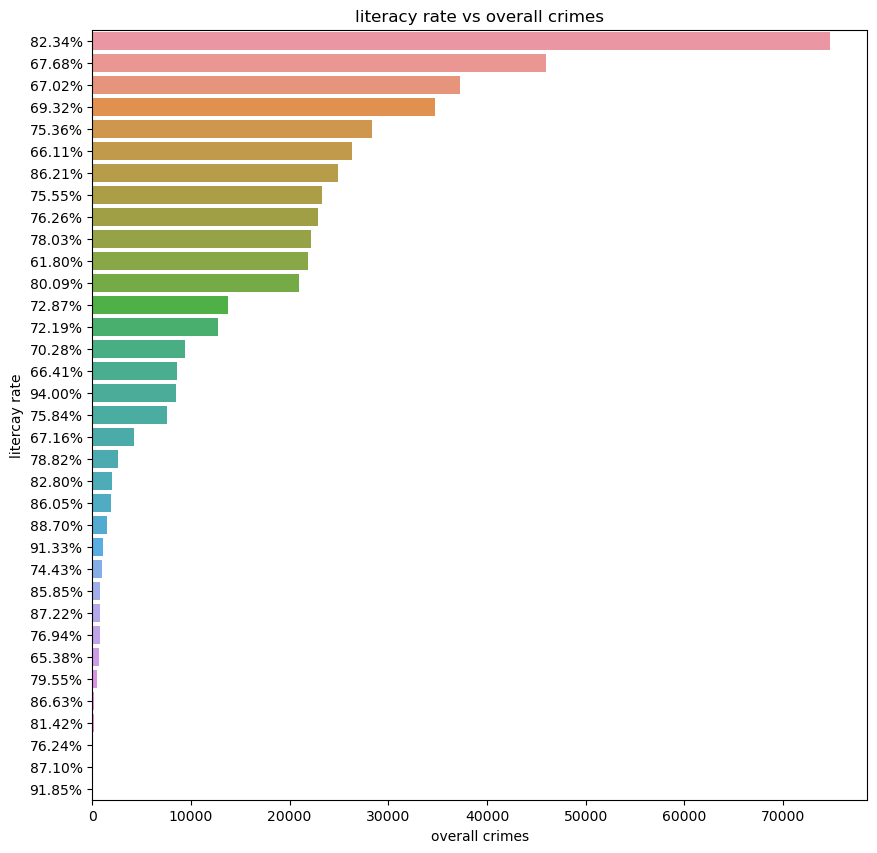

In [16]:
plt.figure(figsize=(10,10))
data = dff[dff['YEAR'] == 2011]
dt = data.groupby('litercay rate')['overall crimes'].sum().sort_values(ascending=False).reset_index()
sns.barplot(x='overall crimes' , y='litercay rate' , data=dt)
plt.title('literacy rate vs overall crimes')
plt.show()

according to statistics in year 2011 we found out that :
- population with literacy rate of 82.34 % recorded the highest number og crimes of property which is very noticable about the relation between high level of education and intendency to criminality while population with literacy rate of 67.68 % is in the second place
- the majority of literacy rates between 60 % to 80 % recorded total number of crimes above 10000 which says crimes of properties increased in societies with moderate education level
- stealing properties are existed in all levels of societies

In [17]:
dff.columns

Index(['STATE/UT', 'YEAR', 'RESIDENTIAL PREMISES - Dacoity',
       'RESIDENTIAL PREMISES - Robbery', 'RESIDENTIAL PREMISES - Burglary',
       'RESIDENTIAL PREMISES - Theft', 'HIGHWAYS - Dacoity',
       'HIGHWAYS - Robbery', 'HIGHWAYS - Burglary', 'HIGHWAYS - Theft',
       'RIVER and SEA - Dacoity', 'RIVER and SEA - Robbery',
       'RIVER and SEA - Burglary', 'RIVER and SEA - Theft',
       'RAILWAYS - Dacoity', 'RAILWAYS - Robbery', 'RAILWAYS - Burglary',
       'RAILWAYS - Theft', 'BANKS - Dacoity', 'BANKS - Robbery',
       'BANKS - Burglary', 'BANKS - Theft',
       'COMMERCIAL ESTABLISHMENTS - Dacoity',
       'COMMERCIAL ESTABLISHMENTS - Robbery',
       'COMMERCIAL ESTABLISHMENTS - Burglary',
       'COMMERCIAL ESTABLISHMENTS - Theft', 'OTHER PLACES - Dacoity',
       'OTHER PLACES - Robbery', 'OTHER PLACES - Burglary',
       'OTHER PLACES - Theft', 'TOTAL - Dacoity', 'TOTAL - Robbery',
       'TOTAL - Burglary', 'TOTAL - Theft', 'overall crimes', 'population',
       'lite

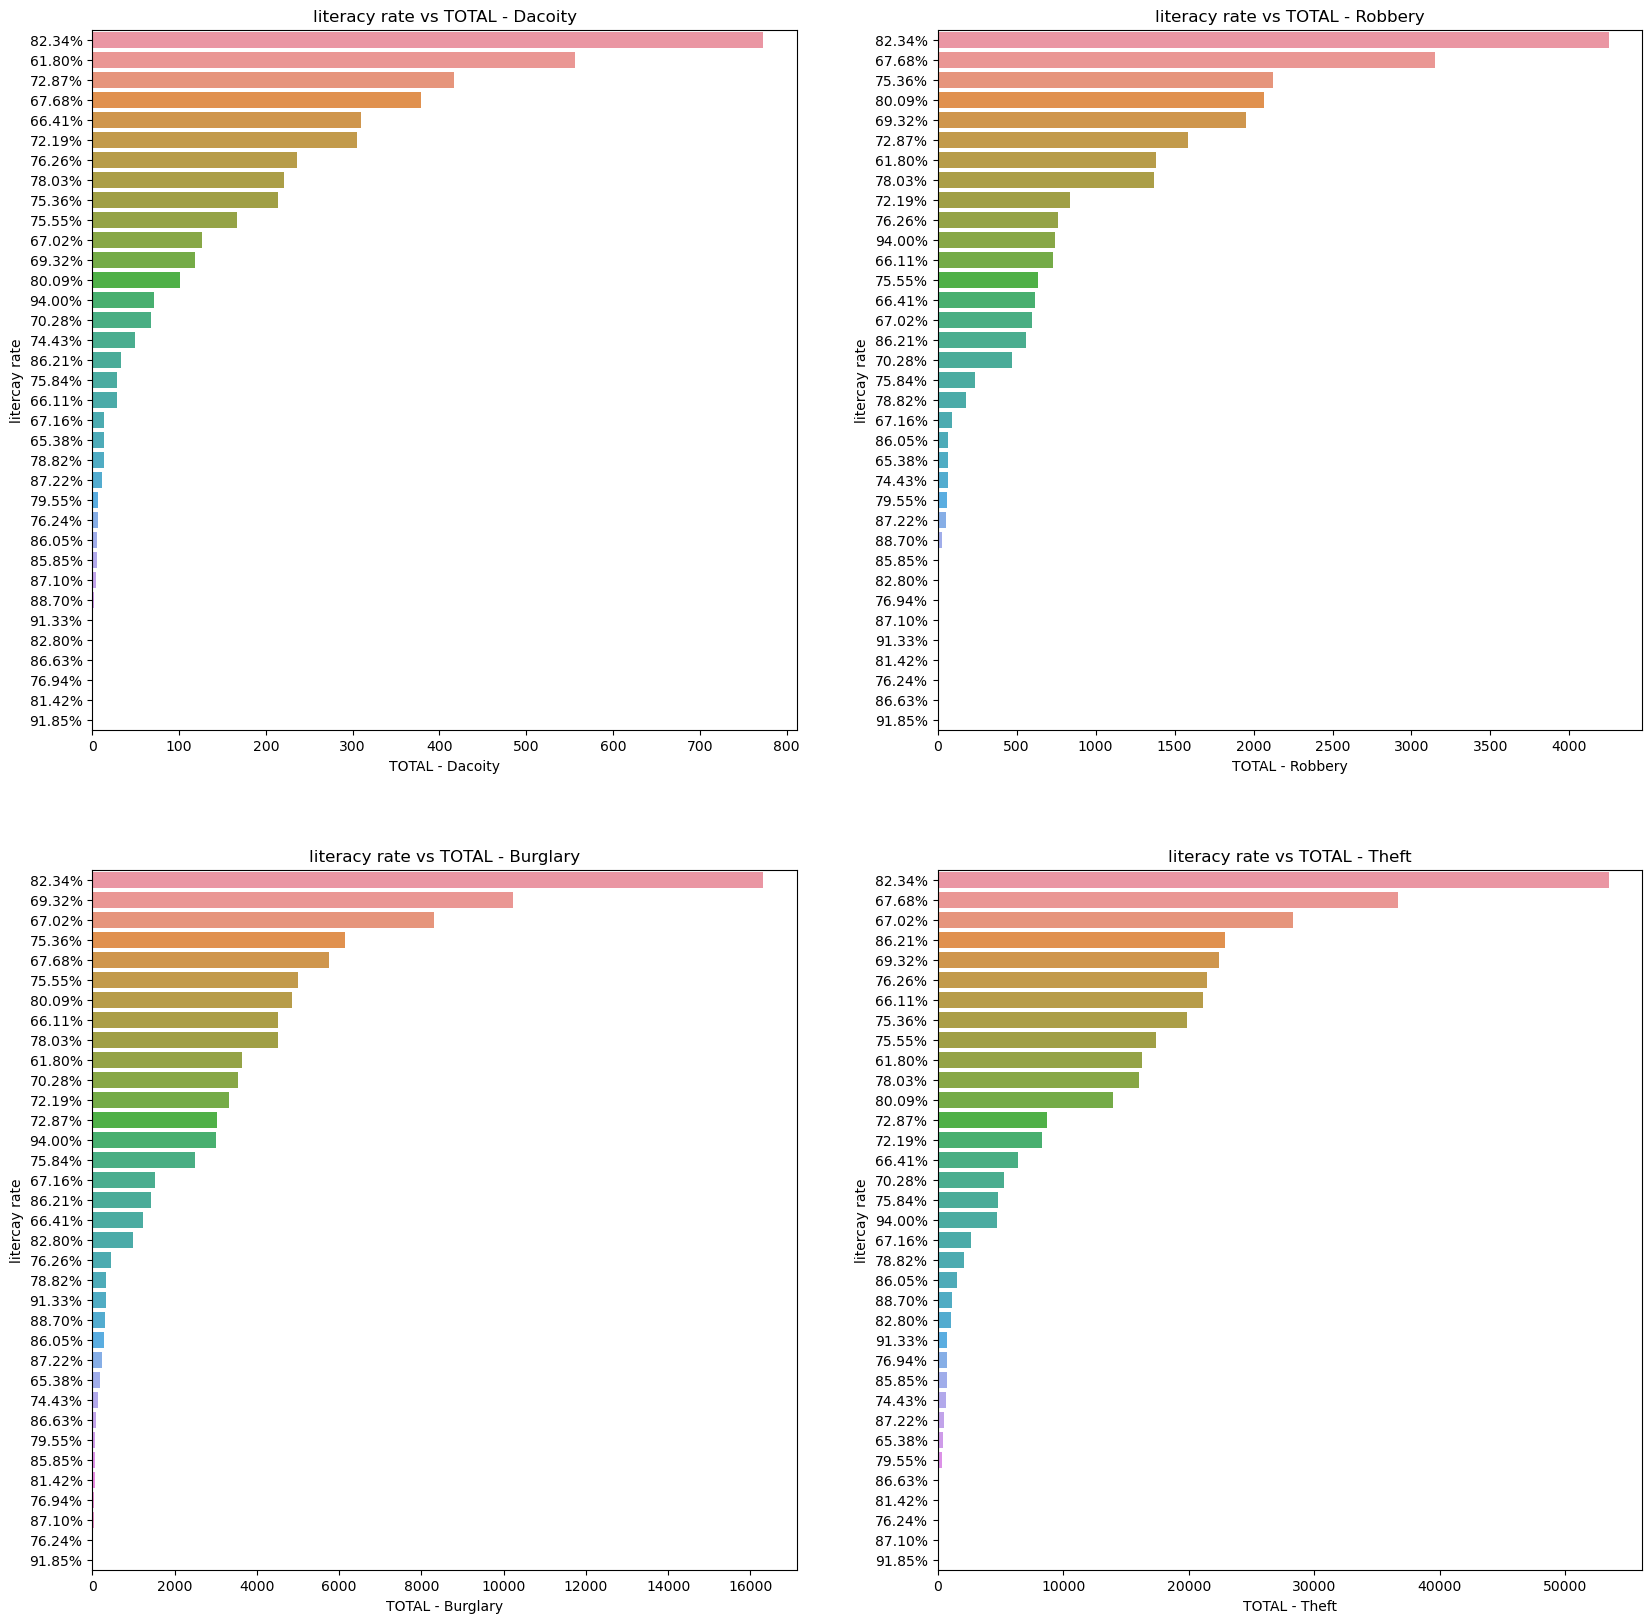

In [26]:
plt.figure(figsize=(20,20))
plot = 1
data = dff[dff['YEAR'] == 2011]
cols = ['TOTAL - Dacoity', 'TOTAL - Robbery','TOTAL - Burglary', 'TOTAL - Theft']
for i in cols :
    if plot <= 4 :
        ax = plt.subplot(2,2,plot)
        dt = data.groupby('litercay rate')[i].sum().sort_values(ascending=False).reset_index()
        sns.barplot(x=dt[i] , y=dt['litercay rate'] , data= dt)
        plt.title('literacy rate vs {}'.format(i))
    plot+=1
plt.show()    

according to year 2011 statistics we notice that the population with literacy rate of 82.34 % had the highest number in all types of crimes which ask questions about the related correlation between the high education level and prevention of criminality and most of high literacy rates above 85 % scored very low levels of crimes , on the contradictory , moderate literacy rates between 60% and 75 % scored  high or moderate numbers of crimes in all types

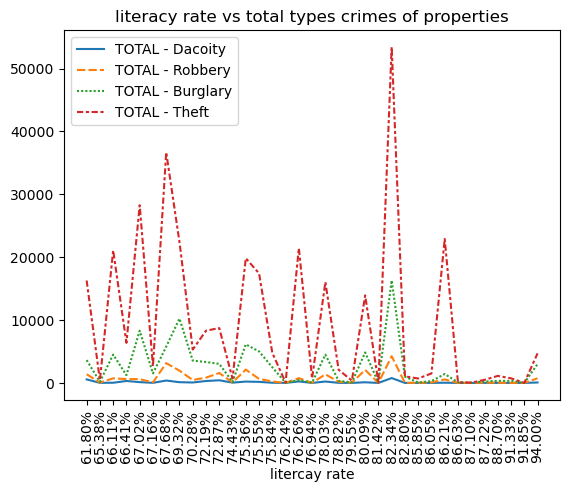

In [36]:
dtt1 = dff[dff['YEAR'] == 2011]
dtt2 = dtt1.groupby('litercay rate')['TOTAL - Dacoity', 'TOTAL - Robbery','TOTAL - Burglary', 'TOTAL - Theft'].sum()
sns.lineplot(data=dtt2)
plt.title('literacy rate vs total types crimes of properties')   
plt.xticks(rotation=90)
plt.show()

theft crimes of properties are the most crimes scored in 2011 by more than 50000 in the society with literacy rate of 82.34 % which is a high education level while Dacoity crimes are the least common

# 2.2 Analysis of the type of crime vs each state vs Literacy rate

# Literacy rate vs each type of crimes

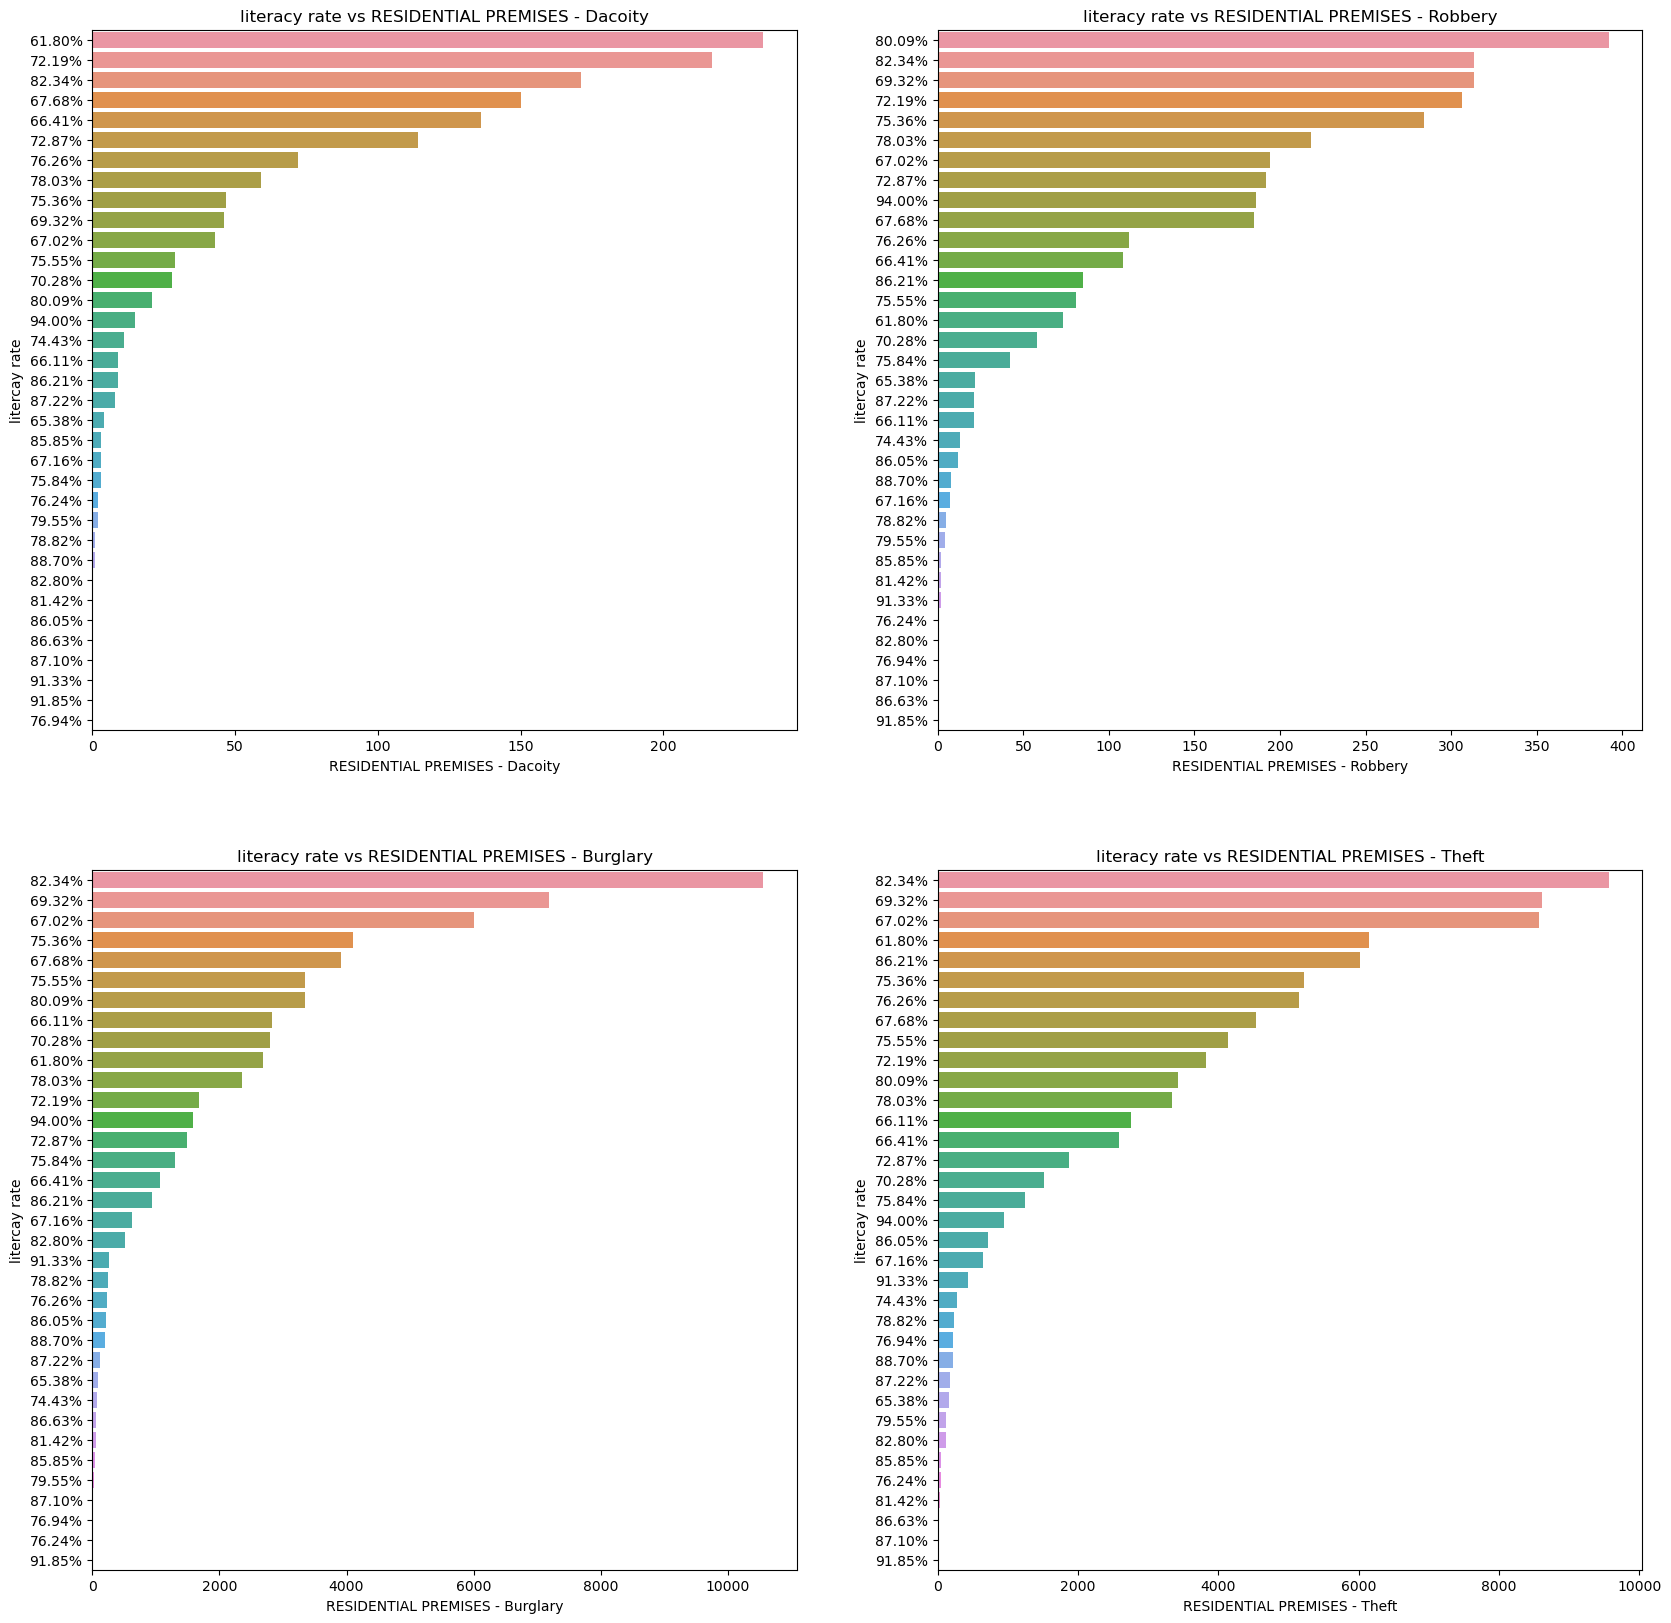

In [27]:
plt.figure(figsize=(20,20))
plot = 1
data = dff[dff['YEAR'] == 2011]
cols = ['RESIDENTIAL PREMISES - Dacoity','RESIDENTIAL PREMISES - Robbery', 'RESIDENTIAL PREMISES - Burglary','RESIDENTIAL PREMISES - Theft']
for i in cols :
    if plot <= 4 :
        ax = plt.subplot(2,2,plot)
        dt = data.groupby('litercay rate')[i].sum().sort_values(ascending=False).reset_index()
        sns.barplot(x=dt[i] , y=dt['litercay rate'] , data= dt)
        plt.title('literacy rate vs {}'.format(i))
    plot+=1
plt.show()    

- in year 2011 the population with literay rate 82.34 % which is a high literacy rate scored the highest number of residential premises crimes of burglary and theft so  criminality is among high educated societies in india
- population with literacy rate of 80.09 % recorded the highest number of robbery of residential premises and notice the population that has literacy rate of 94% scored more than 200 crimes of robbery in 2011 which gives us indications about the spread of criminality in high previliged soociety
- population with literacy rate of 61.80 scored the highest number of dacoity on residential premises by above 200 crimes in 2011 and rate 72.19 % in the second rate 

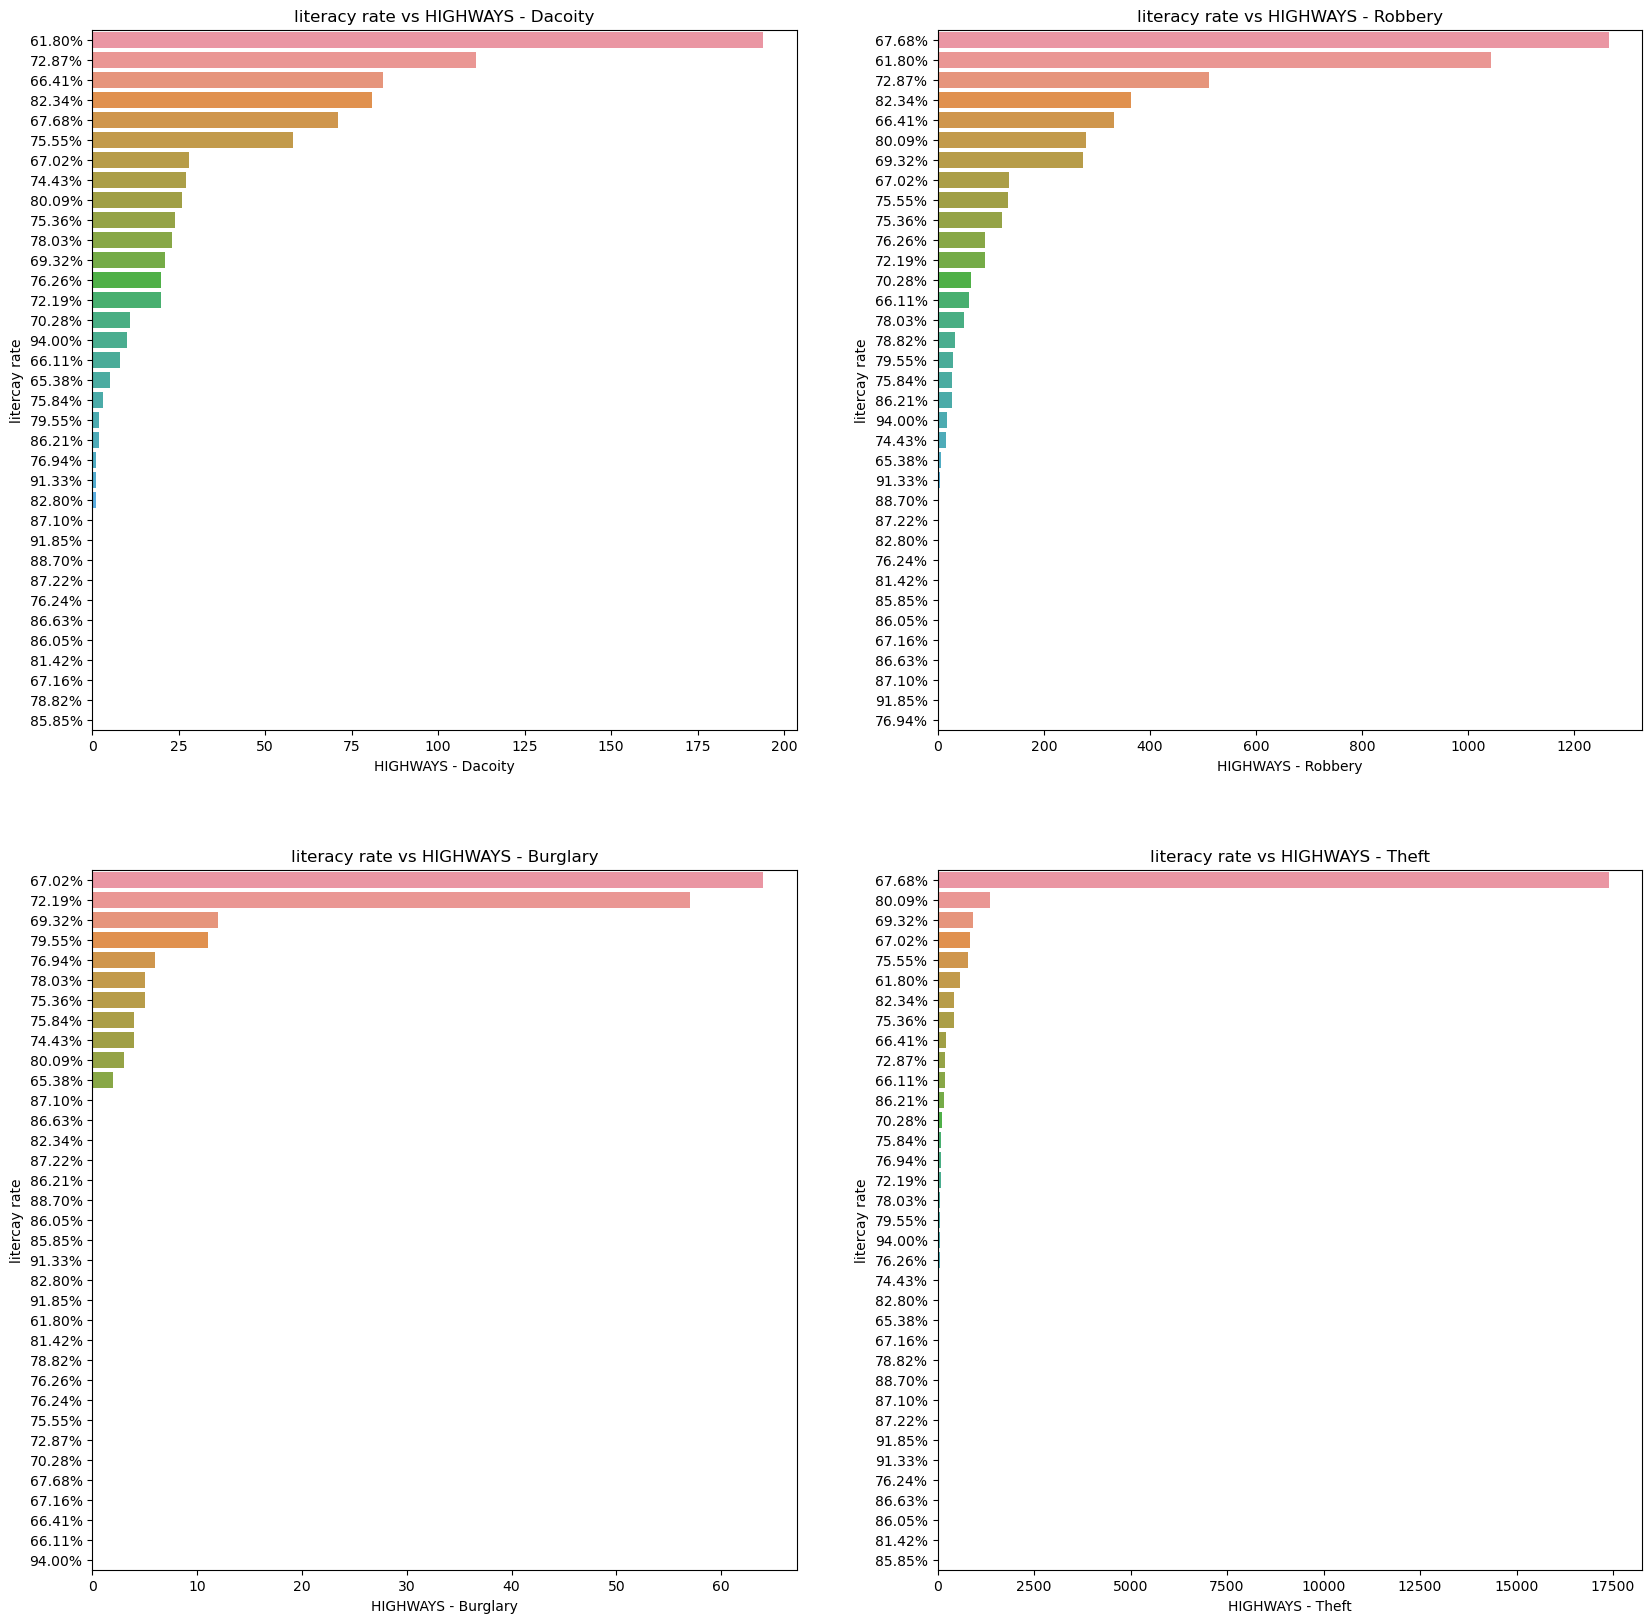

In [28]:
plt.figure(figsize=(20,20))
plot = 1
data = dff[dff['YEAR'] == 2011]
cols = ['HIGHWAYS - Dacoity','HIGHWAYS - Robbery', 'HIGHWAYS - Burglary', 'HIGHWAYS - Theft']
for i in cols :
    if plot <= 4 :
        ax = plt.subplot(2,2,plot)
        dt = data.groupby('litercay rate')[i].sum().sort_values(ascending=False).reset_index()
        sns.barplot(x=dt[i] , y=dt['litercay rate'] , data= dt)
        plt.title('literacy rate vs {}'.format(i))
    plot+=1
plt.show()    

- population with literacy rate of 61.80 % scored more than 175 crimes of Highways Dacoity crimes in 2011
- population with literacy rate of 67.68% recorded the highest number of Highways robbery and theft crimes in 2011
- population with literacy rate of 67.02% recorded the highest number of Highways Dacoity in 2011
- crimes of highways are highly recorded in societies with moderate literacy rates

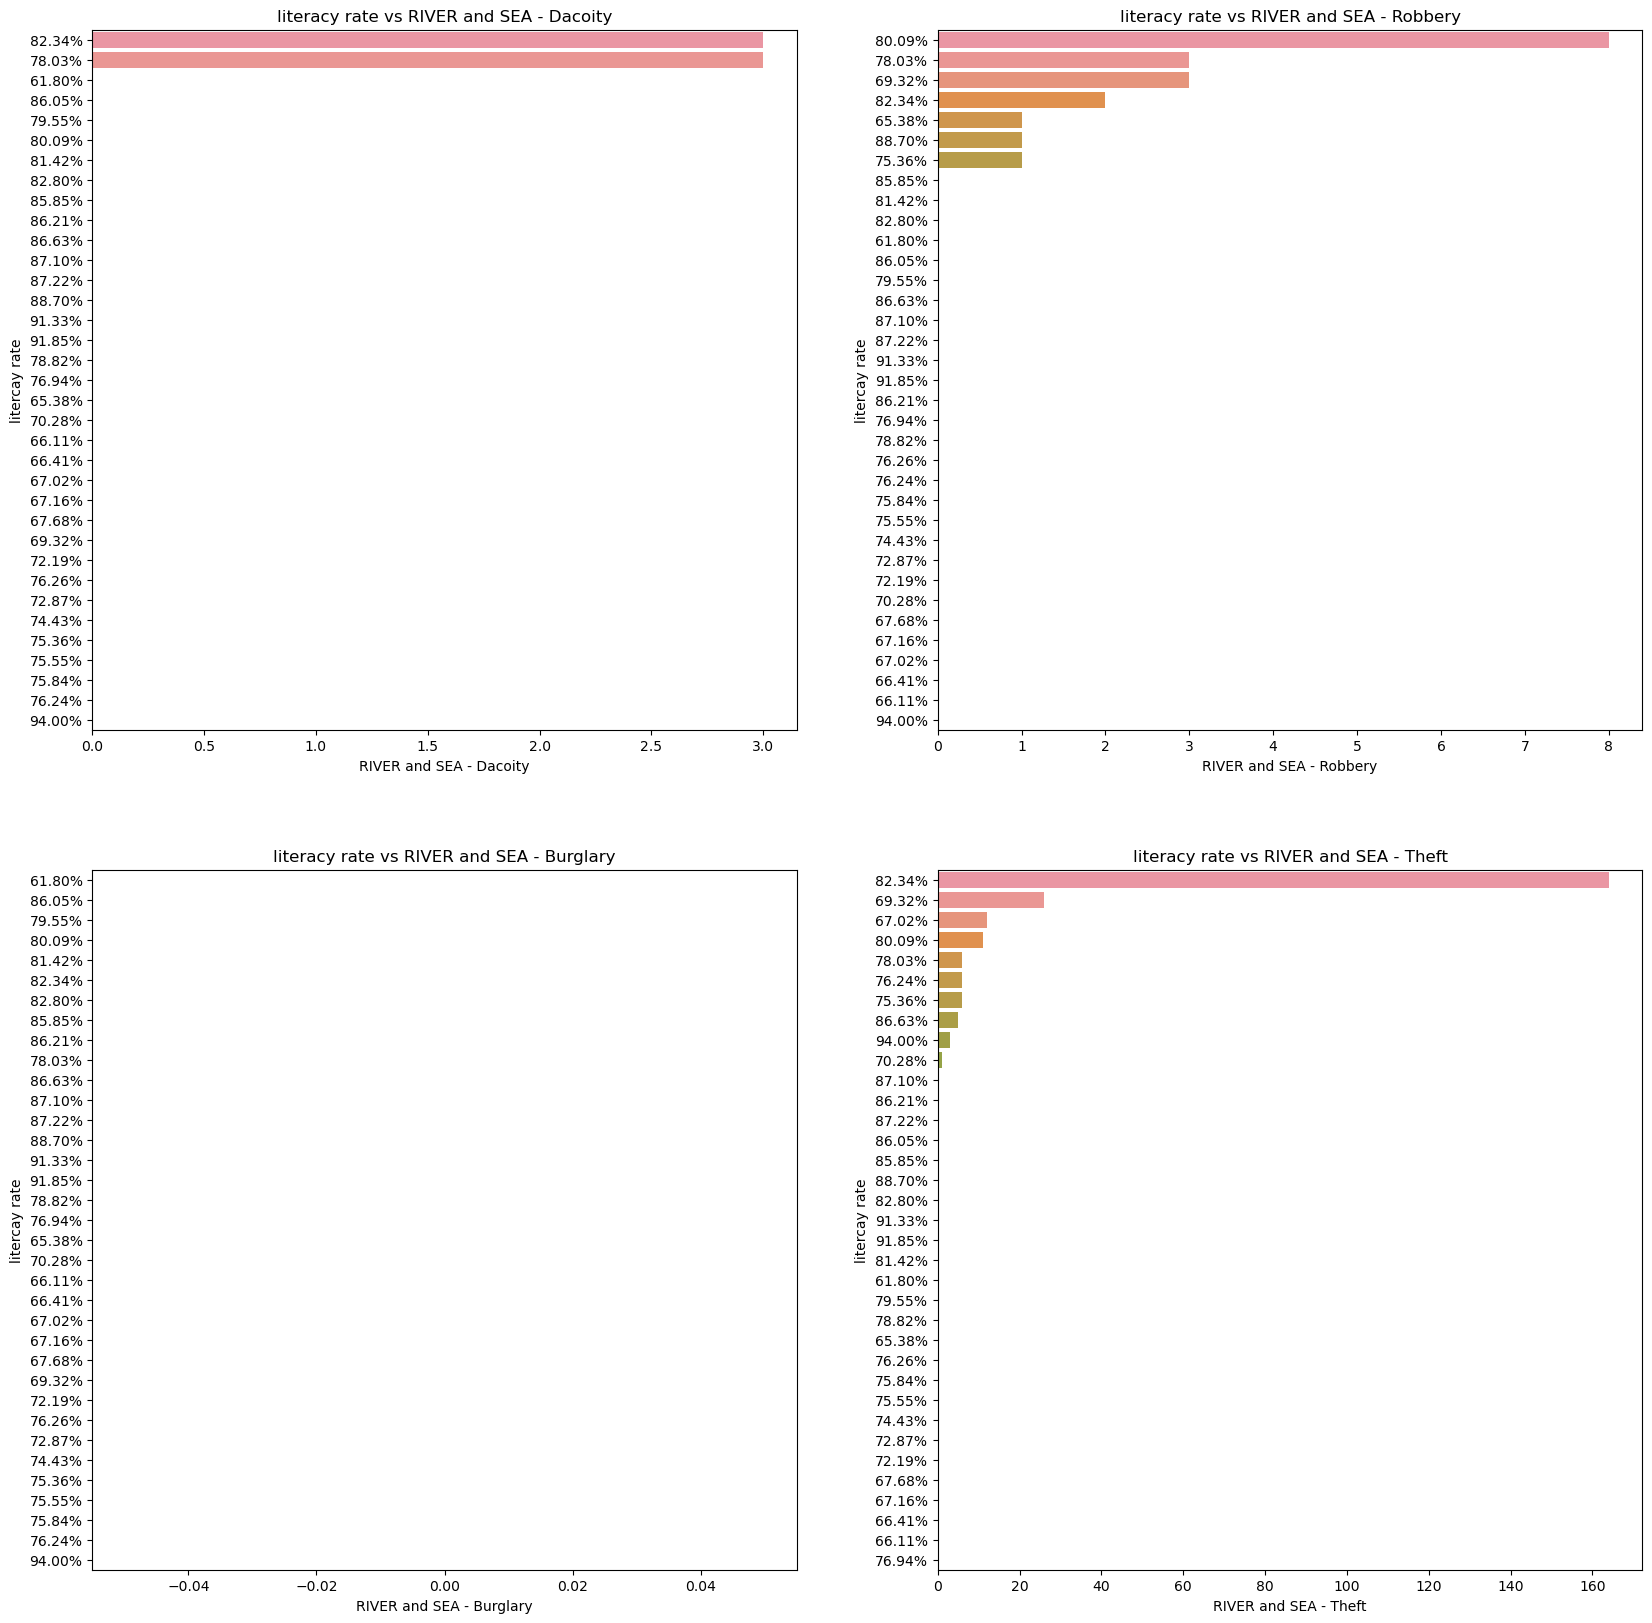

In [29]:
plt.figure(figsize=(20,20))
plot = 1
data = dff[dff['YEAR'] == 2011]
cols = ['RIVER and SEA - Dacoity', 'RIVER and SEA - Robbery','RIVER and SEA - Burglary', 'RIVER and SEA - Theft']
for i in cols :
    if plot <= 4 :
        ax = plt.subplot(2,2,plot)
        dt = data.groupby('litercay rate')[i].sum().sort_values(ascending=False).reset_index()
        sns.barplot(x=dt[i] , y=dt['litercay rate'] , data= dt)
        plt.title('literacy rate vs {}'.format(i))
    plot+=1
plt.show()    

according to 2011 statistics crimes on properties on river and seas are not too much common in india but it is still existed especially amng high literacy society of 82.34 % which recorded more than 160 cases of river and sea property theft crimes in 2011 and we did not recrd any Burglary crimes on river and sea properties in 2011 but we scored only 8 crimes of robbery in the population with literacy rate of 80.09 % and only three crimes among populations with literacy rates of 78.03% and 82.34 %

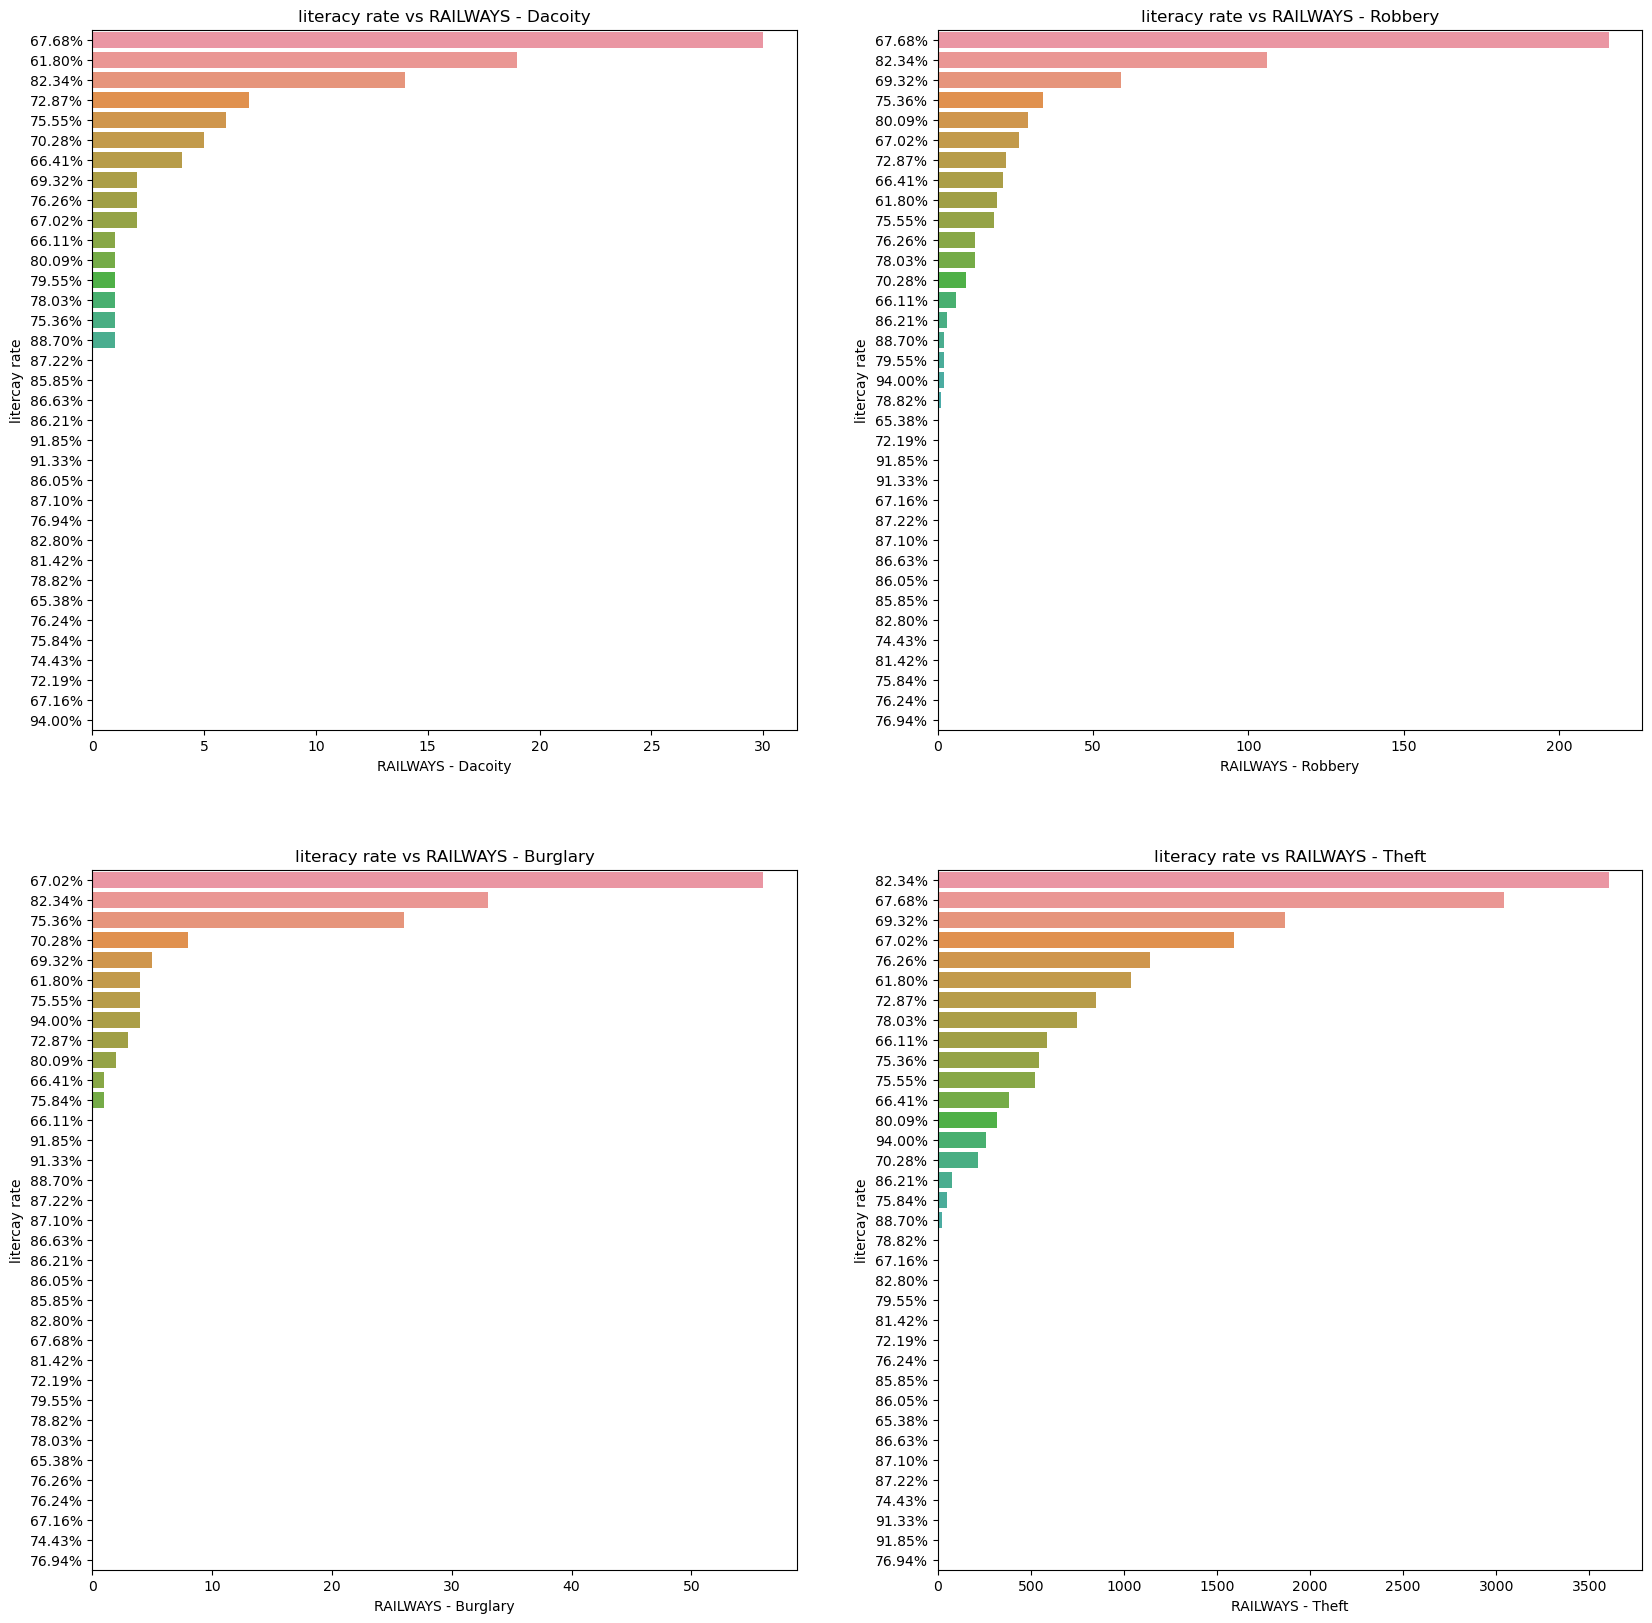

In [37]:
plt.figure(figsize=(20,20))
plot = 1
data = dff[dff['YEAR'] == 2011]
cols = ['RAILWAYS - Dacoity', 'RAILWAYS - Robbery', 'RAILWAYS - Burglary','RAILWAYS - Theft']
for i in cols :
    if plot <= 4 :
        ax = plt.subplot(2,2,plot)
        dt = data.groupby('litercay rate')[i].sum().sort_values(ascending=False).reset_index()
        sns.barplot(x=dt[i] , y=dt['litercay rate'] , data= dt)
        plt.title('literacy rate vs {}'.format(i))
    plot+=1
plt.show()    

- in 2011 the population with literacy rate of 67.68 % recorded the highest numbers of Railways Dacoity and Robbery crimes
- population with literacy rate of 67.02 % scored the highest number of Railways Burglary crimes in 2011 by more than 50 crimes in one year which is very high acoording its harsh condition which means crimes in some societies in india are harsh in its nature while rate 82.34 % came in the second place
- population with literacy rate of 82.34 % recorded more than 3500 case of Rsilways theft in 2011 which is high compared to the nature of the crime and also the high educated level in this sociey

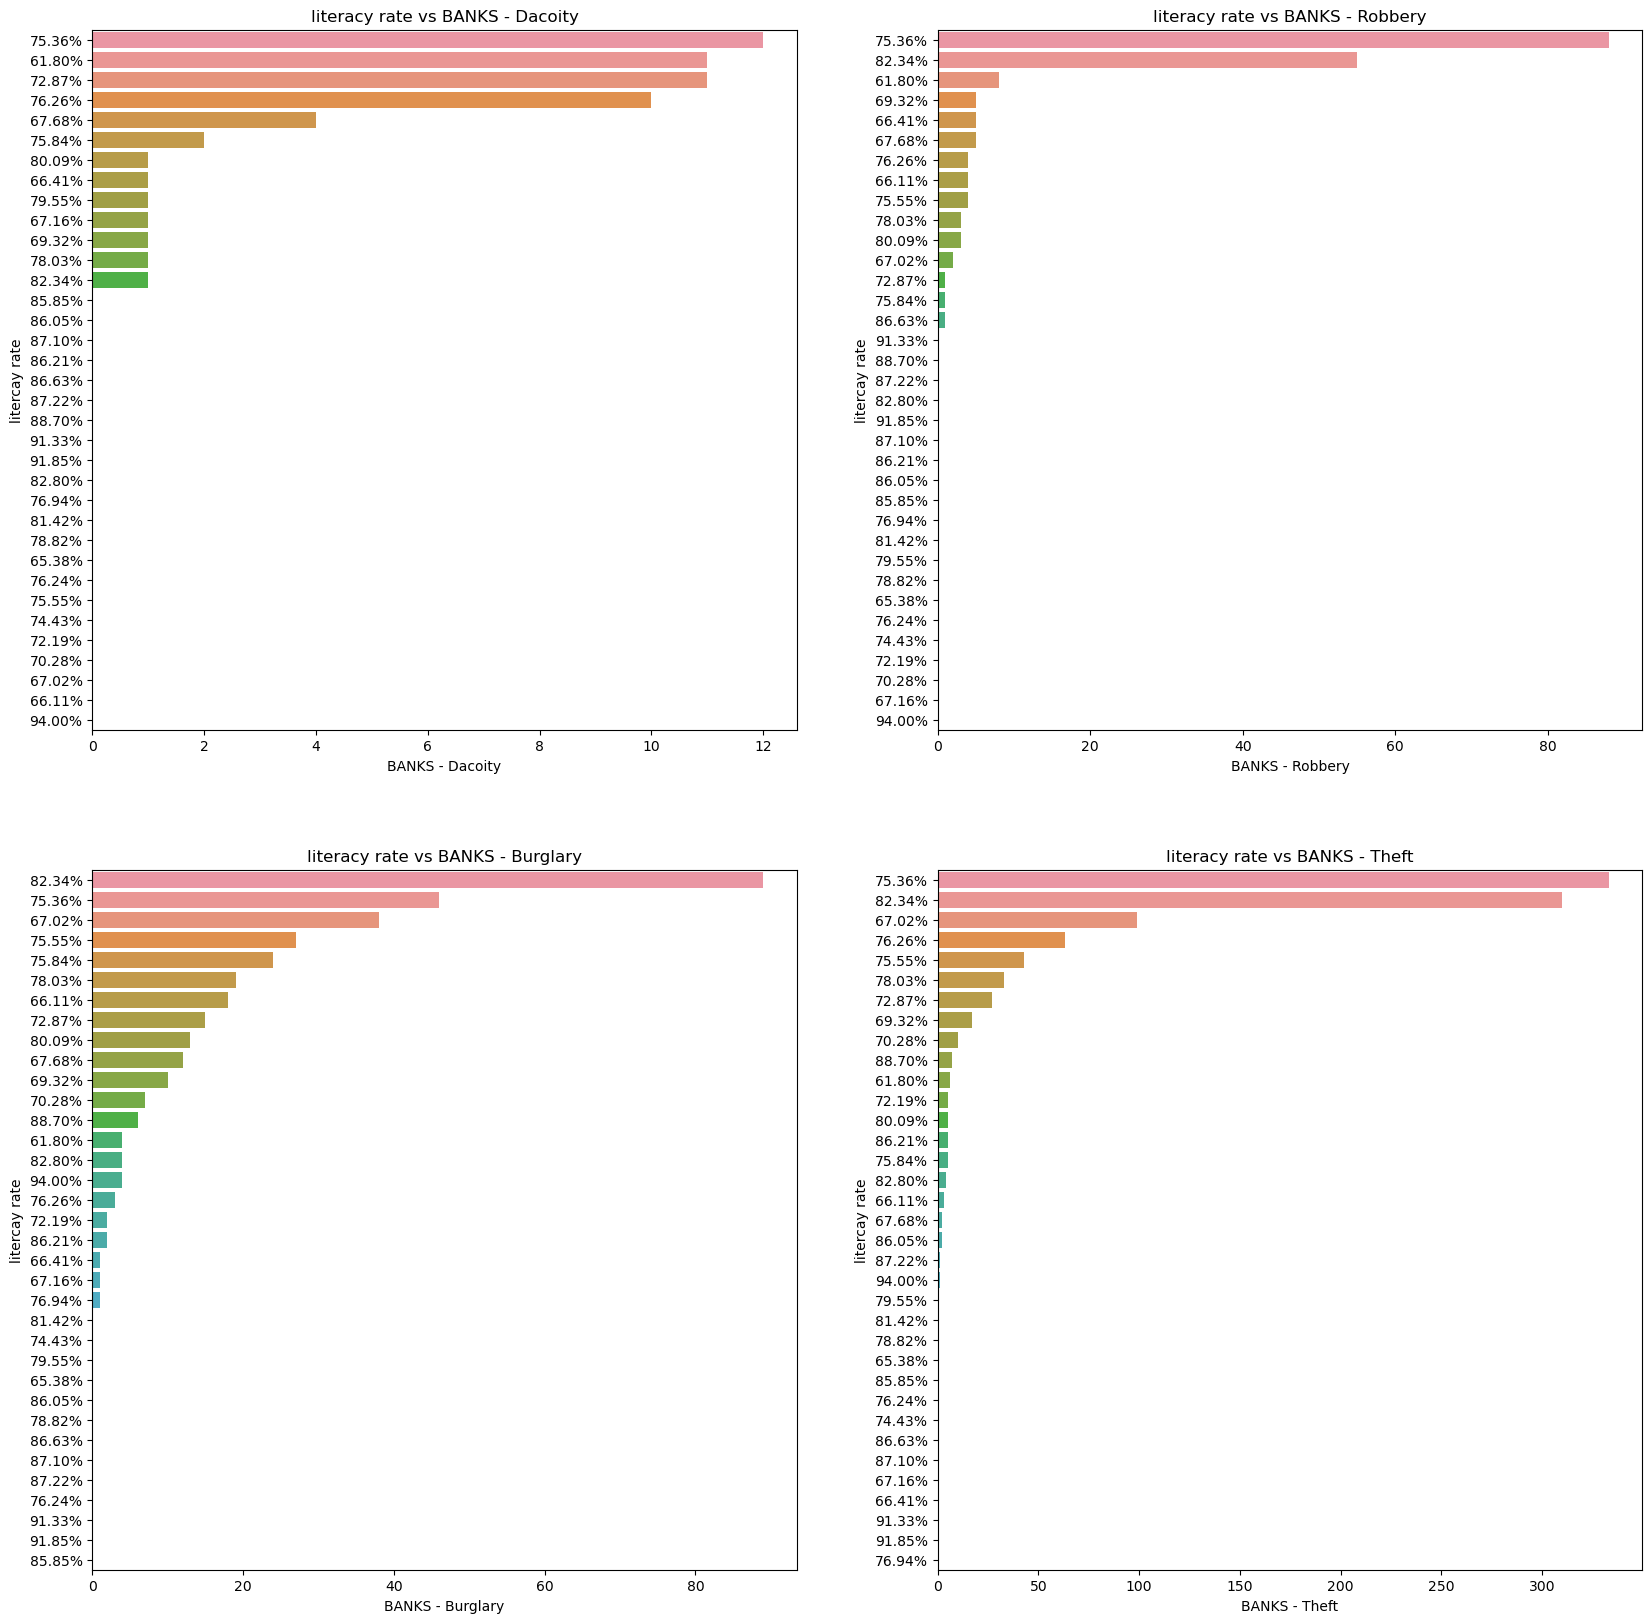

In [38]:
plt.figure(figsize=(20,20))
plot = 1
data = dff[dff['YEAR'] == 2011]
cols = ['BANKS - Dacoity', 'BANKS - Robbery','BANKS - Burglary', 'BANKS - Theft']
for i in cols :
    if plot <= 4 :
        ax = plt.subplot(2,2,plot)
        dt = data.groupby('litercay rate')[i].sum().sort_values(ascending=False).reset_index()
        sns.barplot(x=dt[i] , y=dt['litercay rate'] , data= dt)
        plt.title('literacy rate vs {}'.format(i))
    plot+=1
plt.show()    

- population with literacy rate of 75.36 % scored the highest numbers of crimes of Dacoity , robbery and Theft against banks in 2011 
- population with literacy rate f 82.34 % scored the highest number of Burglary crimes by more than 80 cases in 2011
- crimes of banks are very low in very high literacy rates above 85 %

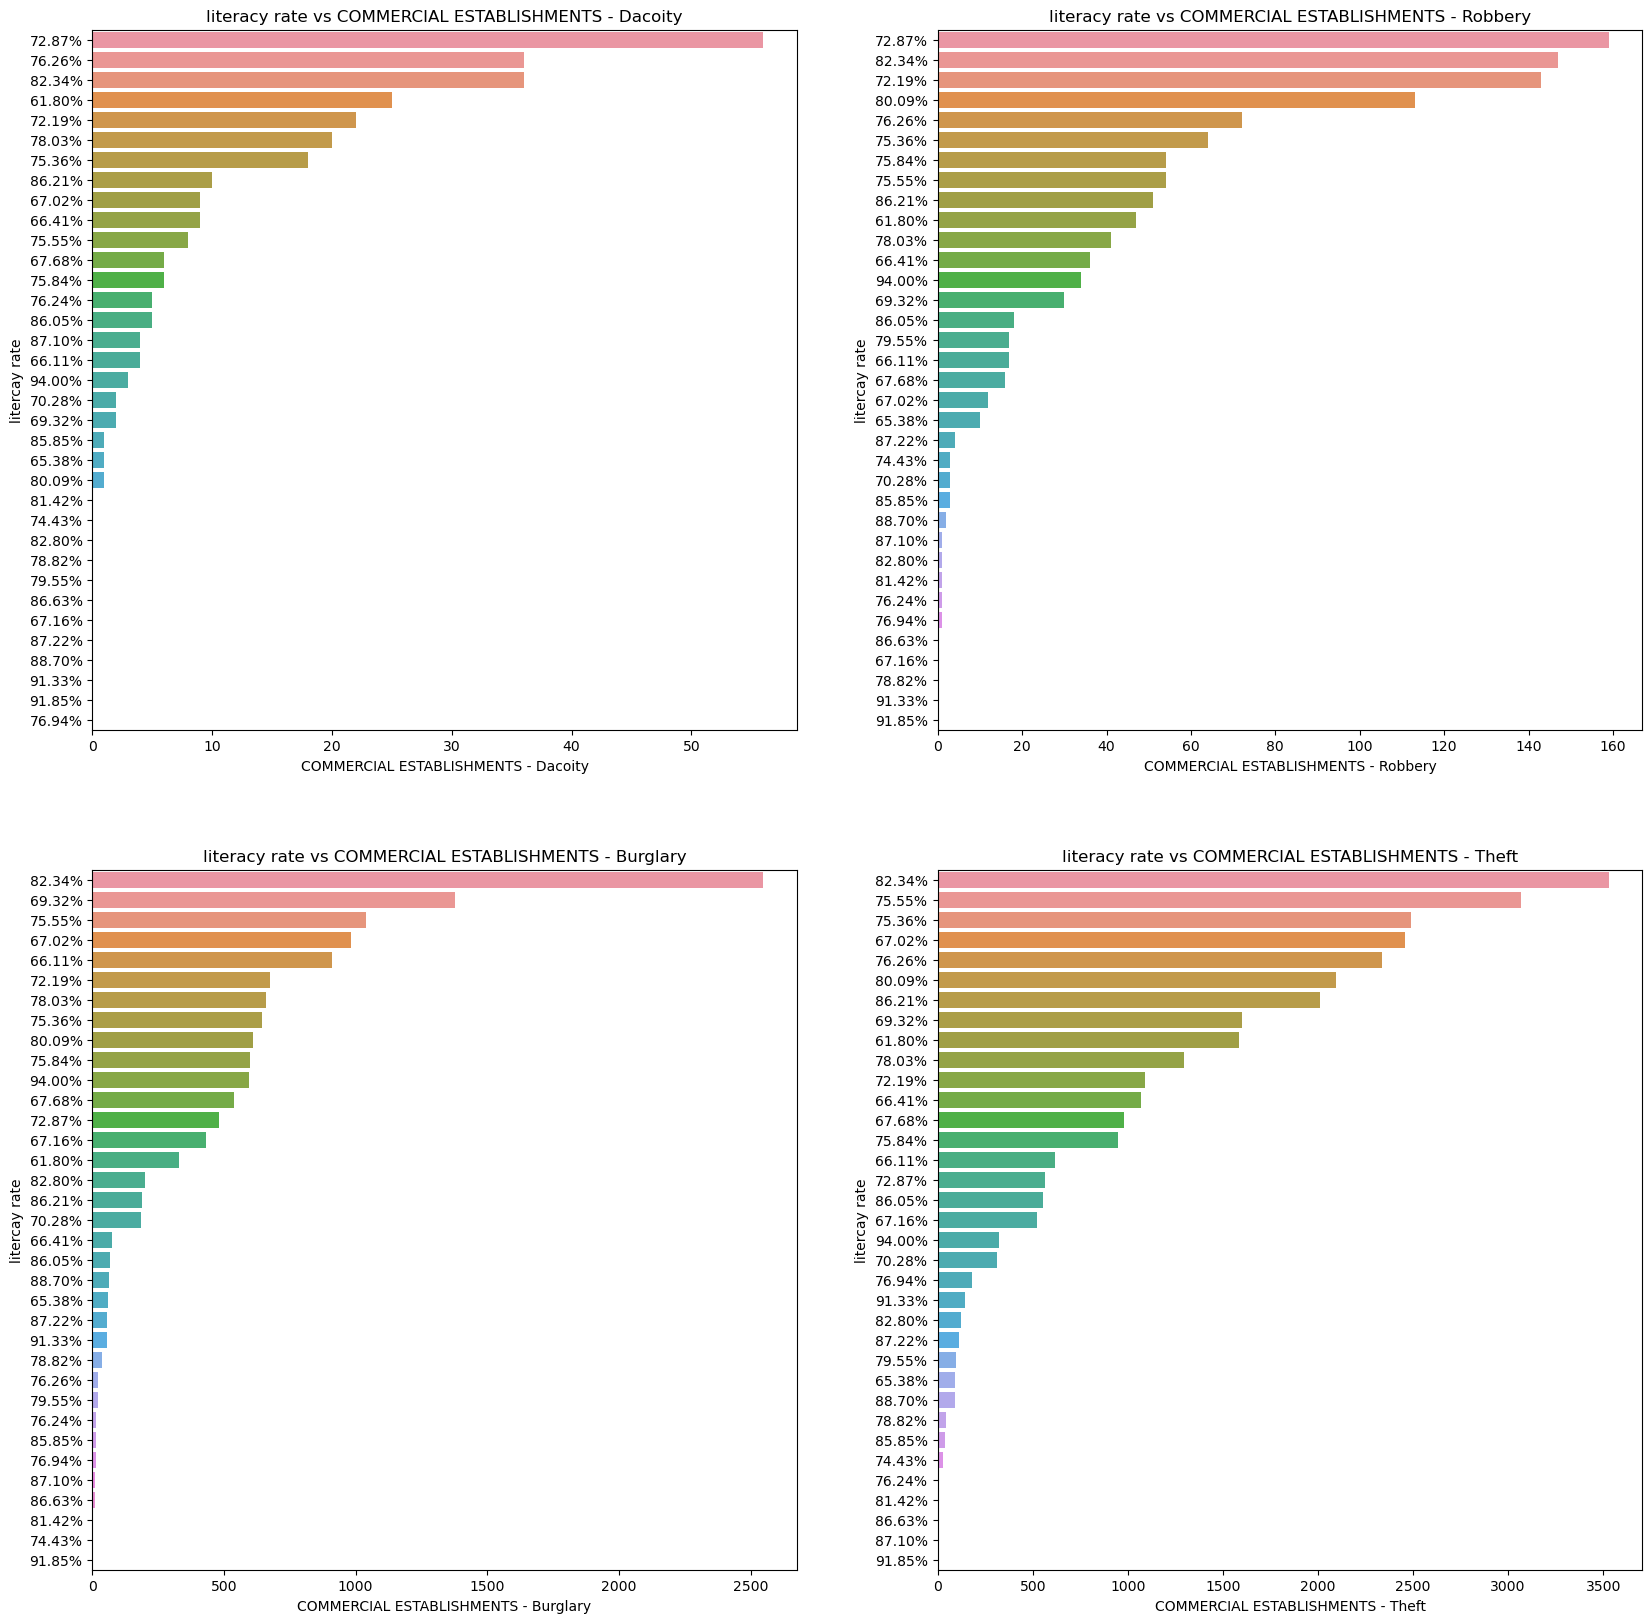

In [39]:
plt.figure(figsize=(20,20))
plot = 1
data = dff[dff['YEAR'] == 2011]
cols = ['COMMERCIAL ESTABLISHMENTS - Dacoity',
       'COMMERCIAL ESTABLISHMENTS - Robbery',
       'COMMERCIAL ESTABLISHMENTS - Burglary',
       'COMMERCIAL ESTABLISHMENTS - Theft']
for i in cols :
    if plot <= 4 :
        ax = plt.subplot(2,2,plot)
        dt = data.groupby('litercay rate')[i].sum().sort_values(ascending=False).reset_index()
        sns.barplot(x=dt[i] , y=dt['litercay rate'] , data= dt)
        plt.title('literacy rate vs {}'.format(i))
    plot+=1
plt.show()    

- population with literacy rate of 72.87% scored the highest number of crimes of Dacoity and Robbery on commercial establishments
- population with literacy rate of 82.34 % recorded the higest numbers of cases of Burglary and Theft on commercial establishments
- populations with literacy rate of 80.09% and 86.21 % recorded more than 1500 cases of theft against commercial establishments which says criminality of commercial establishements are very high amng high educated societies

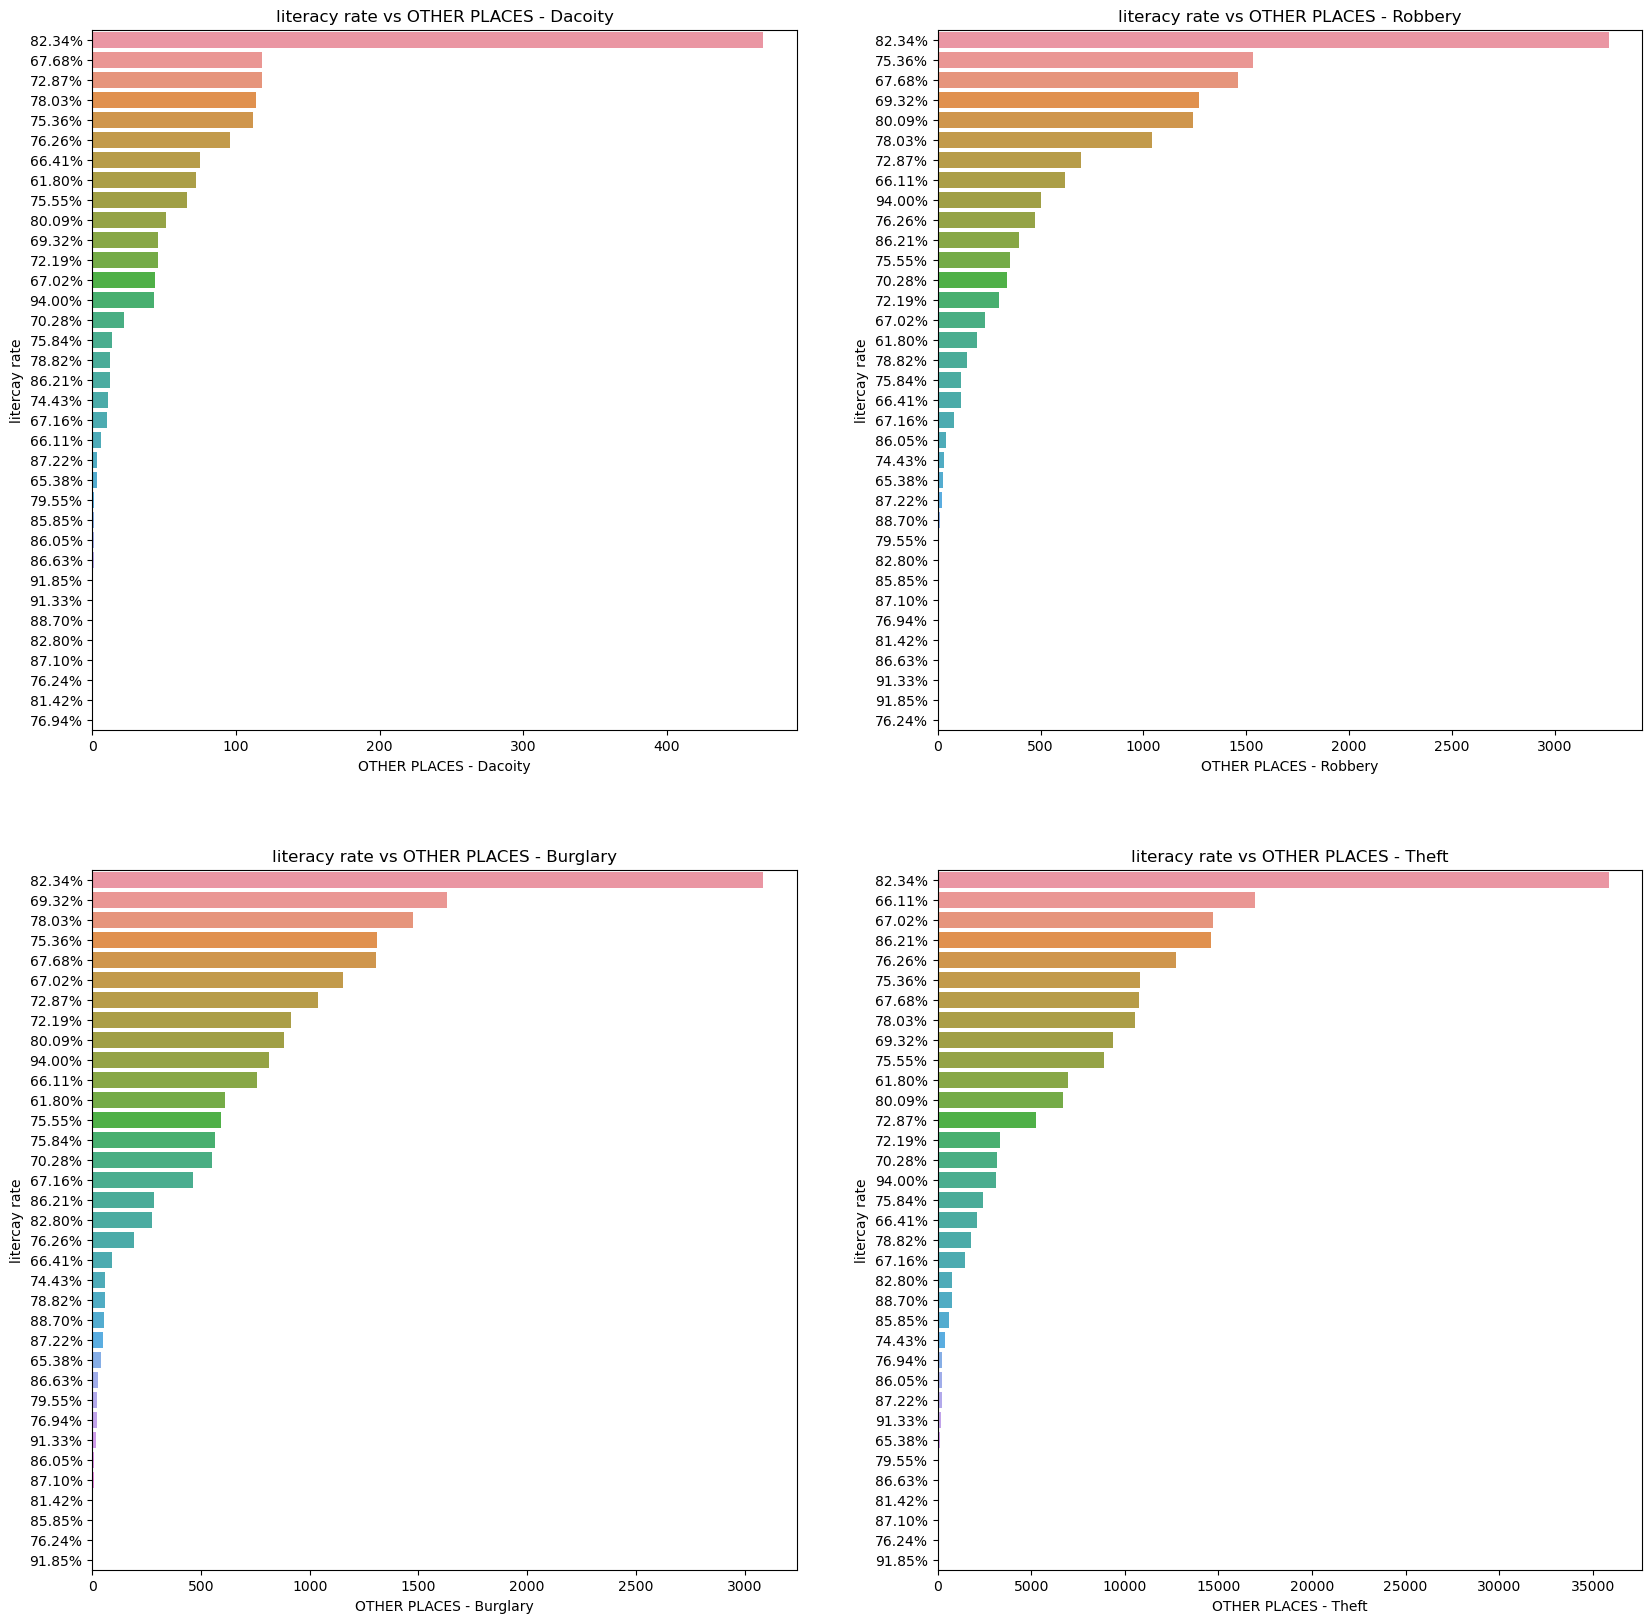

In [40]:
plt.figure(figsize=(20,20))
plot = 1
data = dff[dff['YEAR'] == 2011]
cols = ['OTHER PLACES - Dacoity','OTHER PLACES - Robbery', 'OTHER PLACES - Burglary',
        'OTHER PLACES - Theft']
for i in cols :
    if plot <= 4 :
        ax = plt.subplot(2,2,plot)
        dt = data.groupby('litercay rate')[i].sum().sort_values(ascending=False).reset_index()
        sns.barplot(x=dt[i] , y=dt['litercay rate'] , data= dt)
        plt.title('literacy rate vs {}'.format(i))
    plot+=1
plt.show()    

population with literacy rate of 82.34 % scored the highest numbers of stealing the other different unlabelled places in india which gives bad indications about the increase of criminality in india among high educated societies

# each state vs each type of crimes

# we will insight the crimes overall years in the last decade

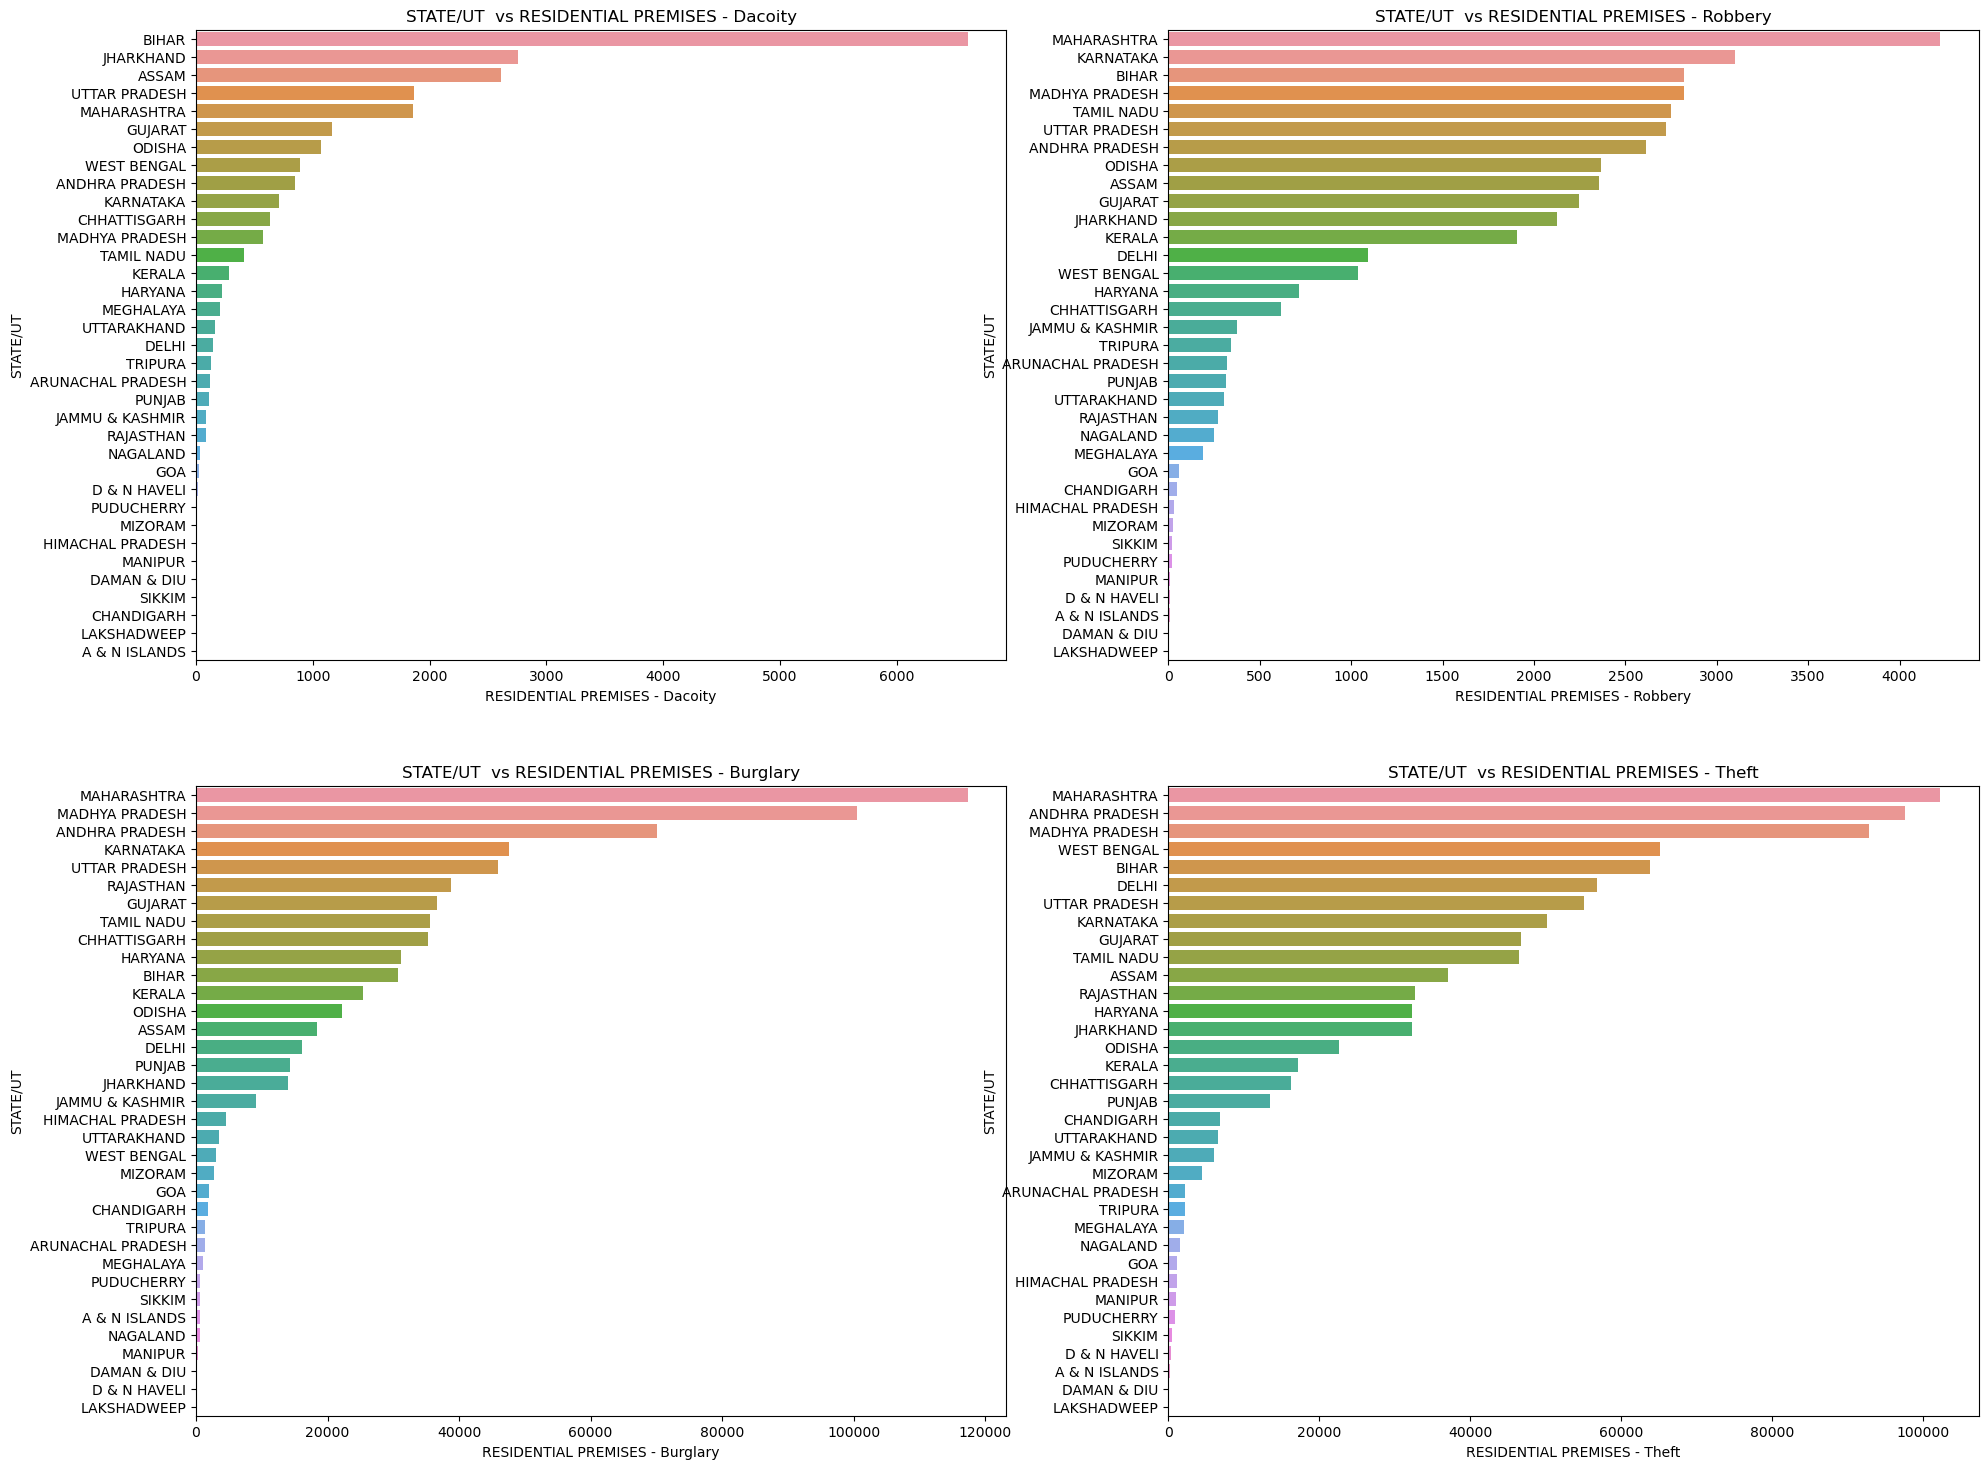

In [44]:
plt.figure(figsize=(23,18))
plot = 1
cols = ['RESIDENTIAL PREMISES - Dacoity','RESIDENTIAL PREMISES - Robbery', 'RESIDENTIAL PREMISES - Burglary','RESIDENTIAL PREMISES - Theft']
for i in cols :
    if plot <= 4 :
        ax = plt.subplot(2,2,plot)
        dt = dff.groupby('STATE/UT')[i].sum().sort_values(ascending=False).reset_index()
        sns.barplot(x=dt[i] , y=dt['STATE/UT'] , data= dt)
        plt.title('STATE/UT  vs {}'.format(i))
    plot+=1
plt.show()    

- state BIHAR recorded the highest number of residential premises dacoity crimes in india in the last decade by more than 6000 cases far away from other states
- state MAHARASHTRA scored the highest numbers of crimes of Robbert , Burglary and Theft crimes against residential premises in the last decade
- states ANDHRA PRADESH and MADHYA PRADESH scored very high numbers of crimes of Burglary and Theft by more than 80000 crimes in the last decade which says they are a vey dangerous places to live
- state LAKSHADWEEP is the lowest state that recorded crimes against residential premises

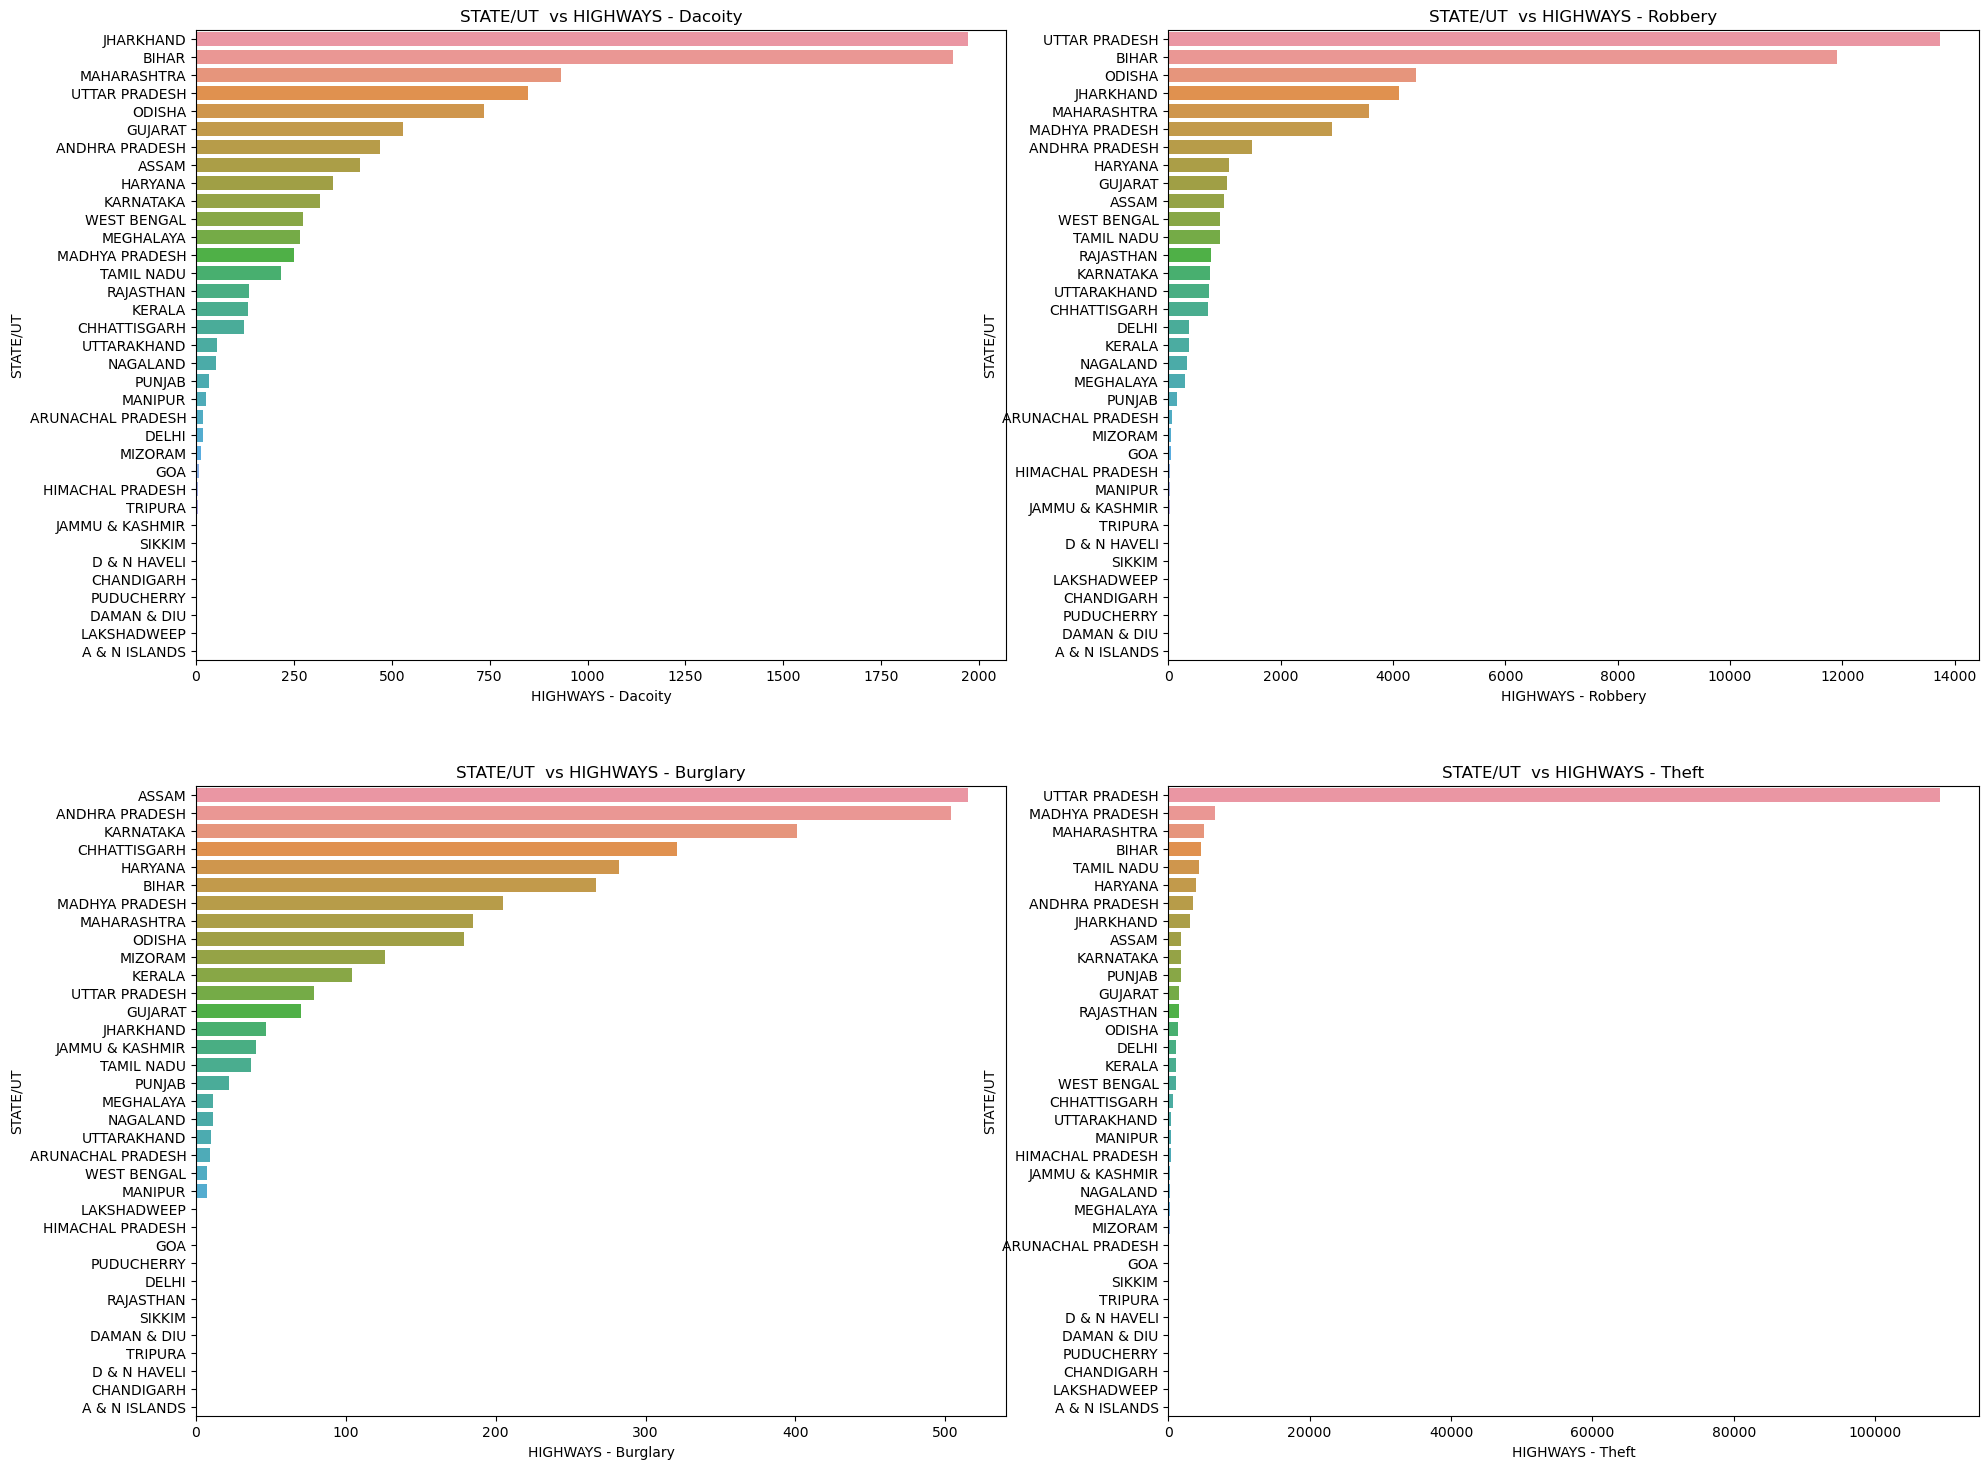

In [45]:
plt.figure(figsize=(23,18))
plot = 1
cols = ['HIGHWAYS - Dacoity','HIGHWAYS - Robbery', 'HIGHWAYS - Burglary', 'HIGHWAYS - Theft']
for i in cols :
    if plot <= 4 :
        ax = plt.subplot(2,2,plot)
        dt = dff.groupby('STATE/UT')[i].sum().sort_values(ascending=False).reset_index()
        sns.barplot(x=dt[i] , y=dt['STATE/UT'] , data= dt)
        plt.title('STATE/UT  vs {}'.format(i))
    plot+=1
plt.show()    

- Highways Dacoity crimes are the highest in states JHARKHAND and BIHAR respectively by recorded more than 1750 cases in the last decade
- state UTTAR PRADESH recorded the highest numbers of Robbery and Theft crimes against Highways in india in the last decade
- State ASSAM recorded the highest numbers of Burglary crimes on Highways in the last decade
- state A & N ISLANDS is the lowest state in Highways crimes

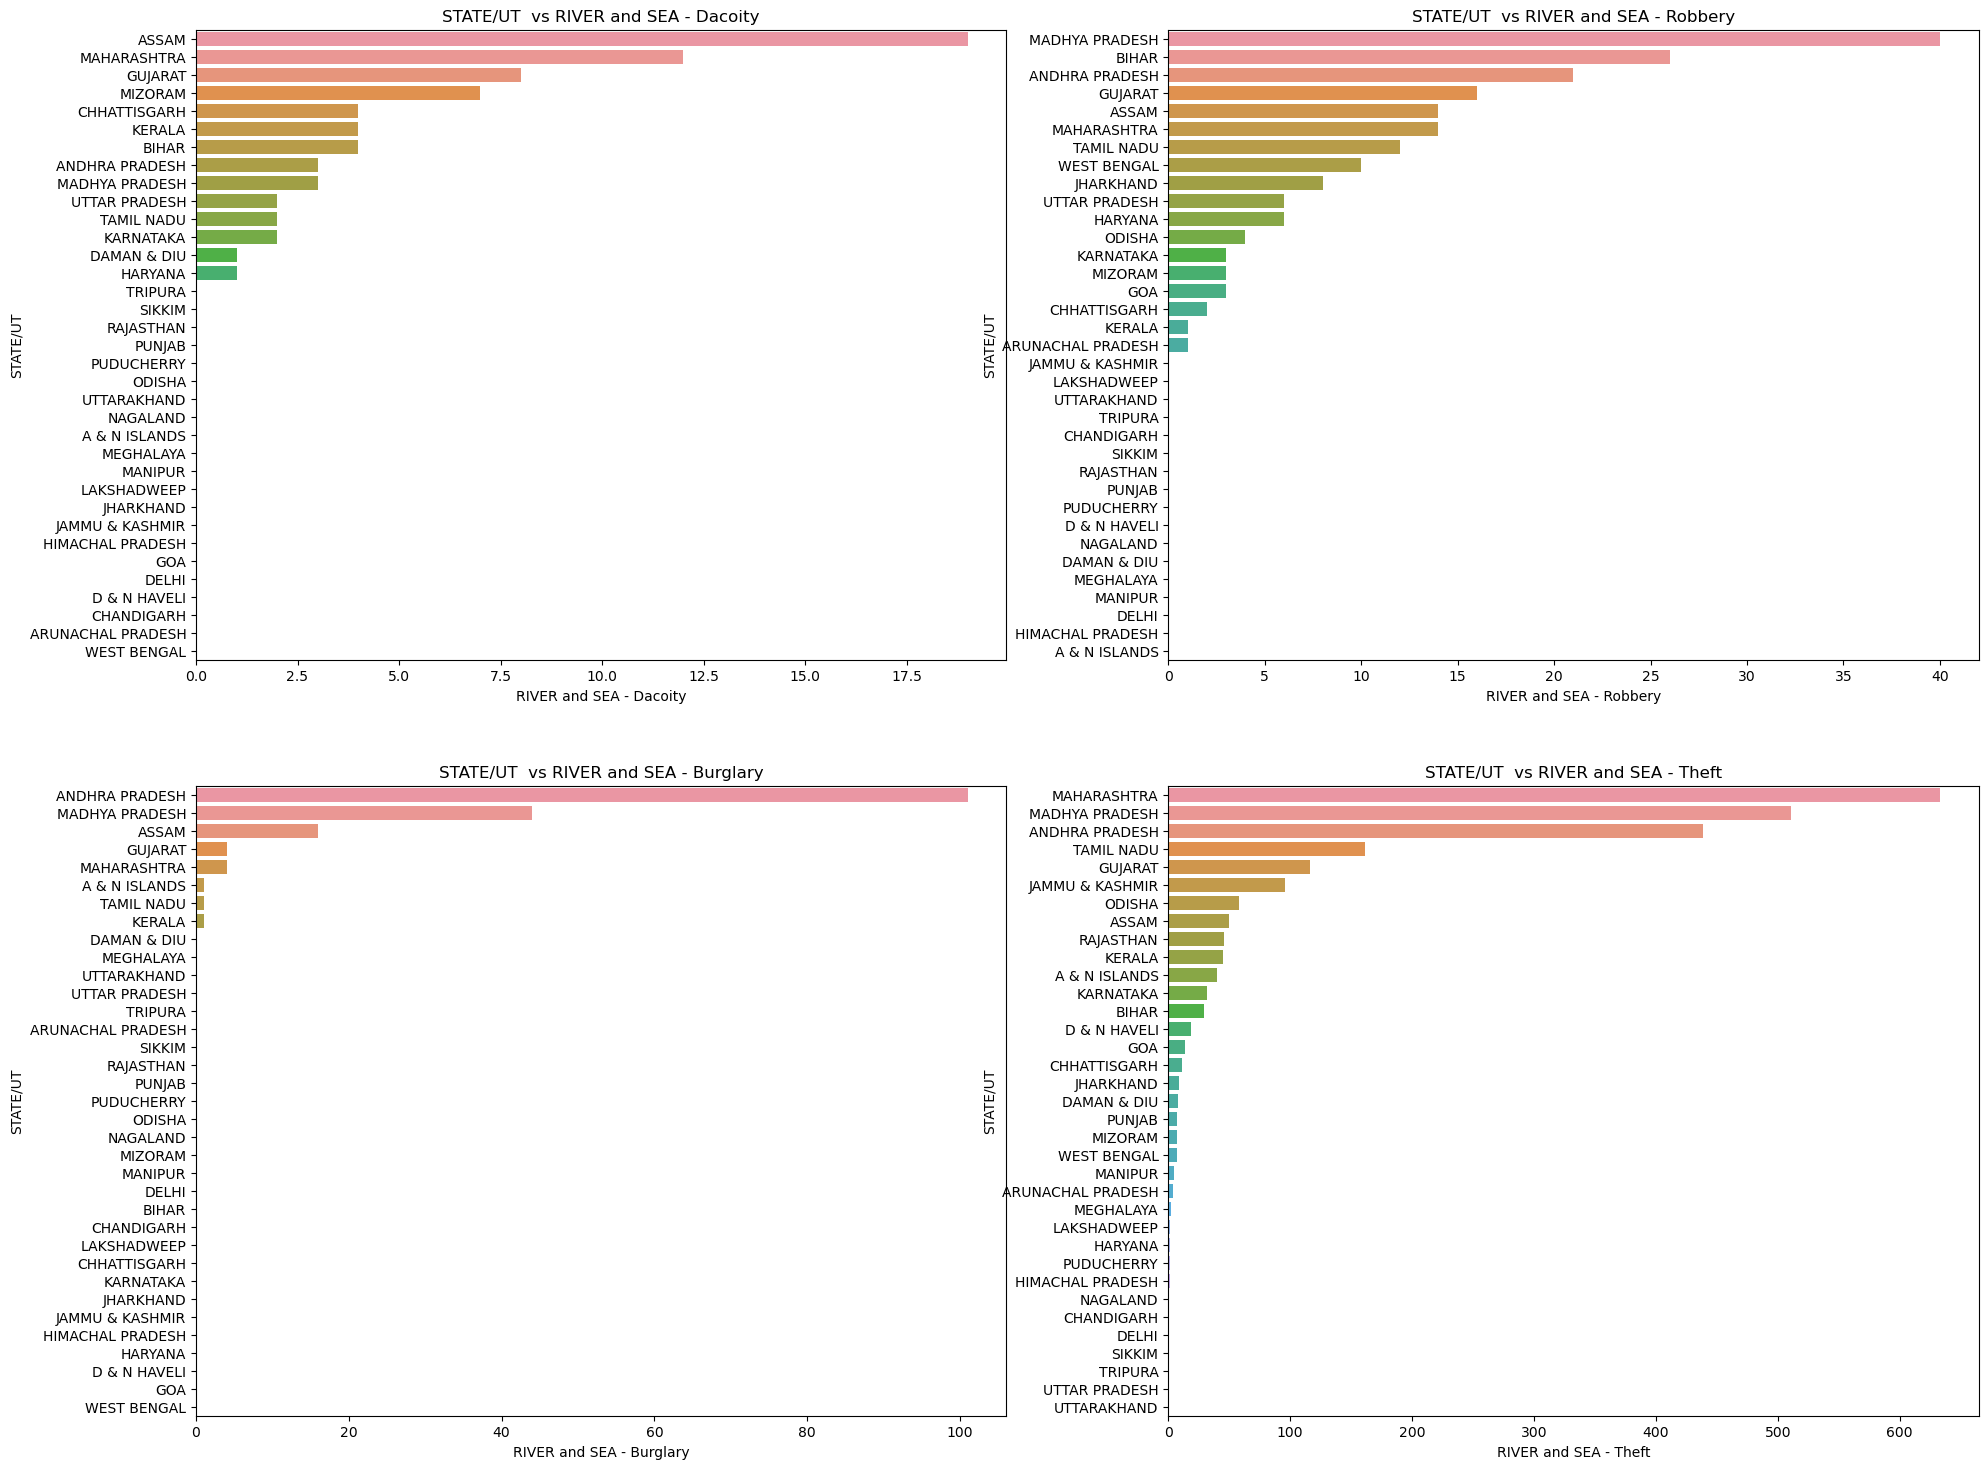

In [46]:
plt.figure(figsize=(23,18))
plot = 1
cols = ['RIVER and SEA - Dacoity', 'RIVER and SEA - Robbery','RIVER and SEA - Burglary', 'RIVER and SEA - Theft']
for i in cols :
    if plot <= 4 :
        ax = plt.subplot(2,2,plot)
        dt = dff.groupby('STATE/UT')[i].sum().sort_values(ascending=False).reset_index()
        sns.barplot(x=dt[i] , y=dt['STATE/UT'] , data= dt)
        plt.title('STATE/UT  vs {}'.format(i))
    plot+=1
plt.show()    

- The maximum number of total crimes agains river and sea properties in india was more than 600 in the last decade which says river and seas properties crimes are not too common
- state ASSAM recorded the highest number of Dacoity crimes on river and sea properties 
- MADHYA PRADESH state recorded the highest number of Robbery crimes against river and sea properties which is only 40 crimes in the last decade
- state ANDHRA PRADESH is the highest state with recorded numbers of Burglary crimes against River and Sea properties in india by only recorded 100 crimes in the last decade
- state MAHARASHTRA scored more than 600 crimes of river and sea crimes in the last decade which is the highest number of theft crimes

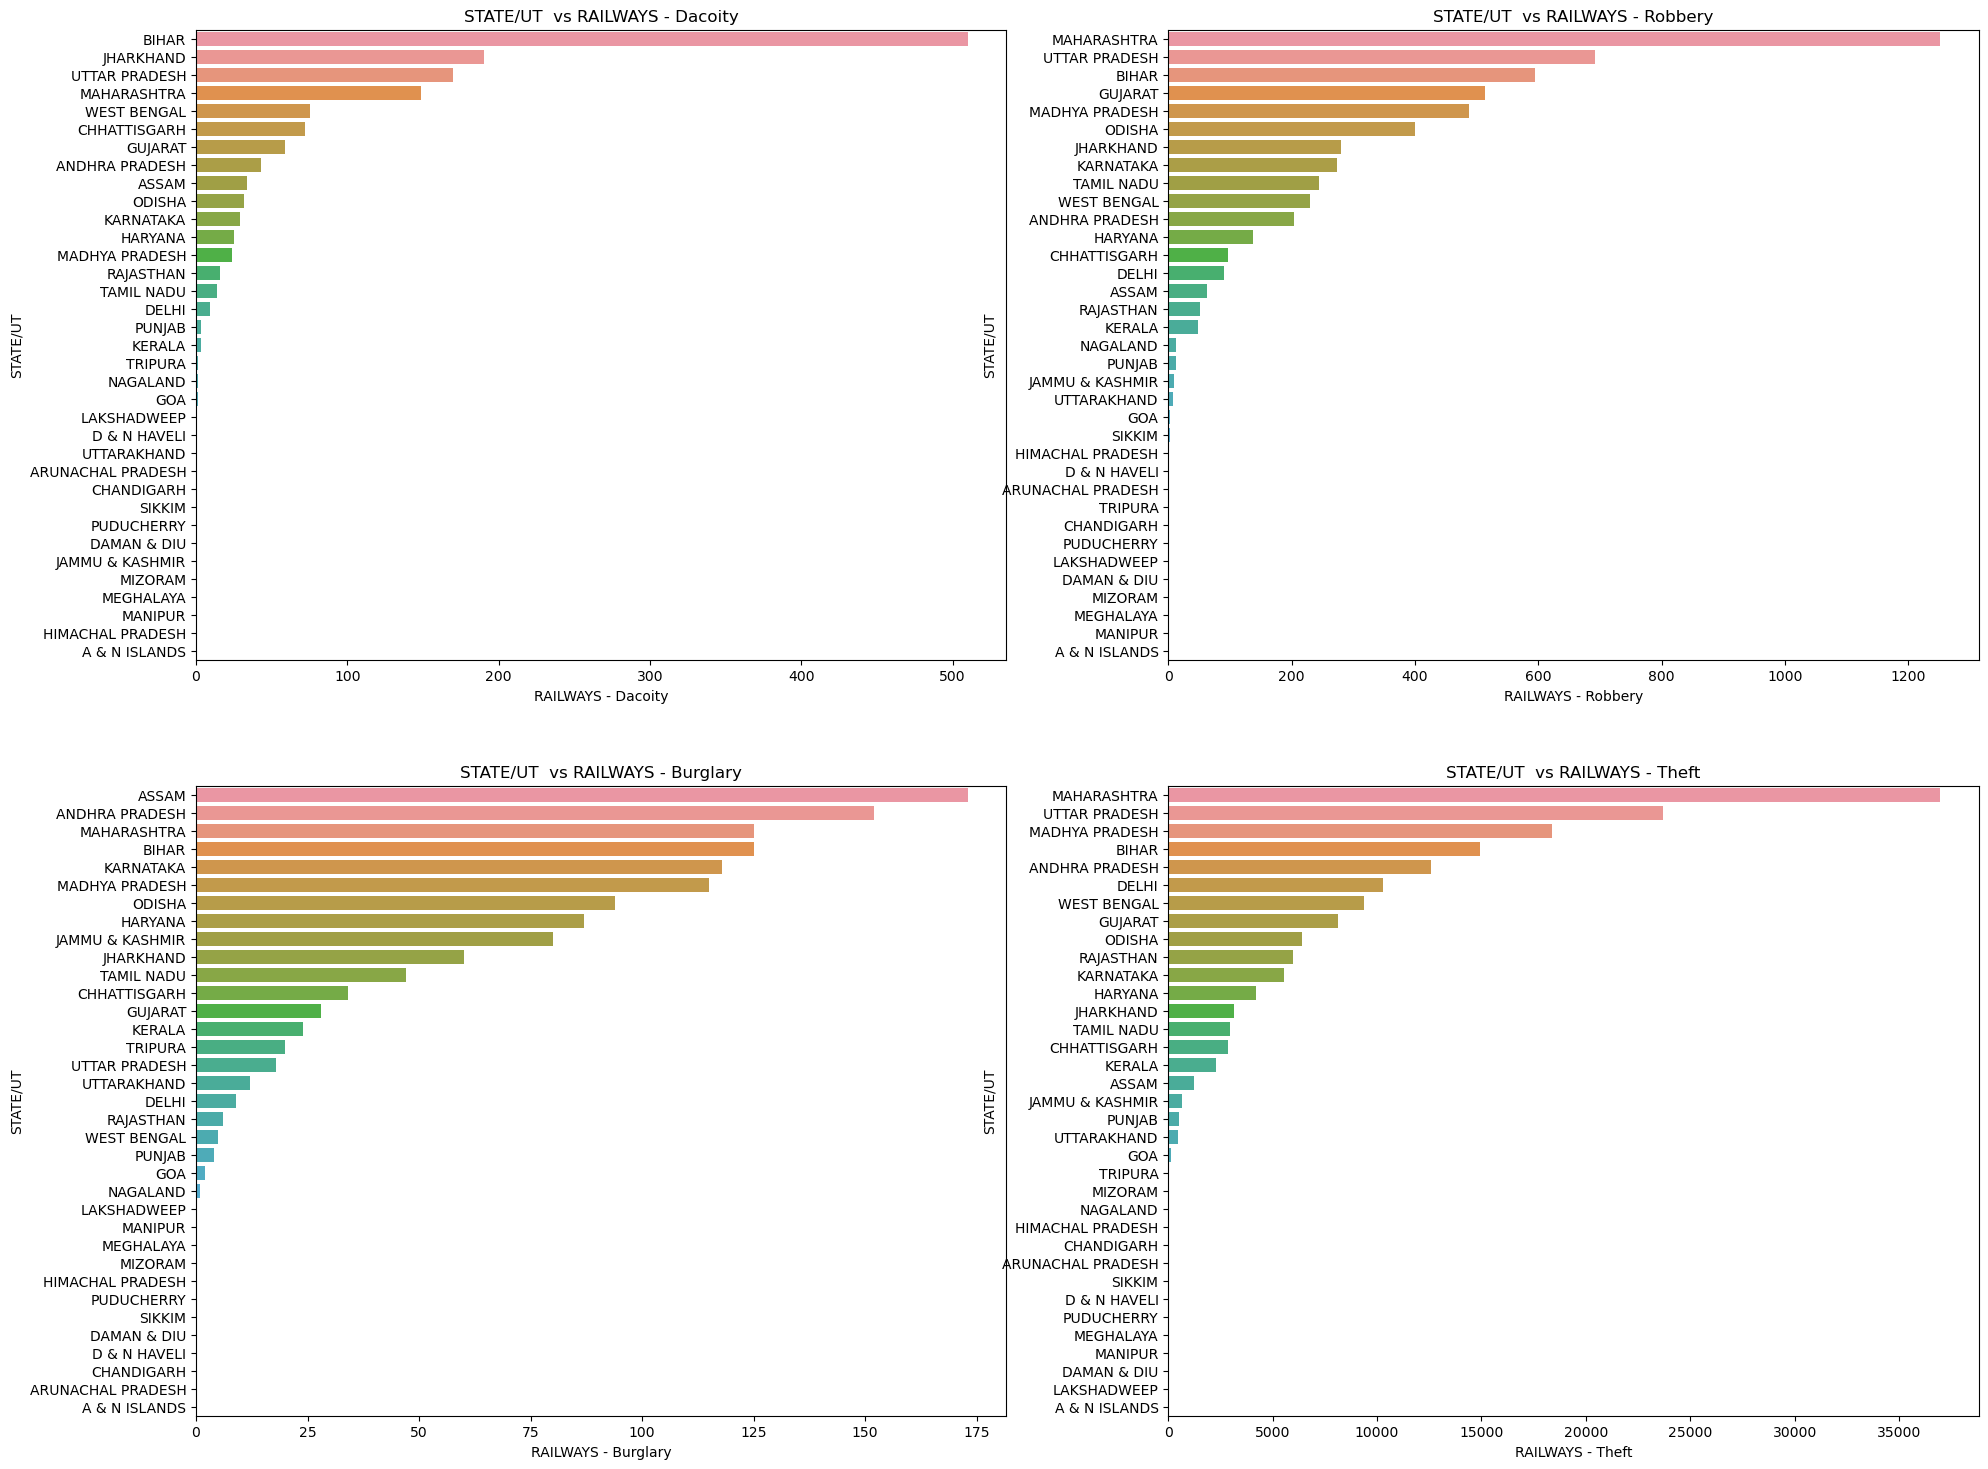

In [47]:
plt.figure(figsize=(23,18))
plot = 1
cols = ['RAILWAYS - Dacoity', 'RAILWAYS - Robbery', 'RAILWAYS - Burglary',
       'RAILWAYS - Theft']
for i in cols :
    if plot <= 4 :
        ax = plt.subplot(2,2,plot)
        dt = dff.groupby('STATE/UT')[i].sum().sort_values(ascending=False).reset_index()
        sns.barplot(x=dt[i] , y=dt['STATE/UT'] , data= dt)
        plt.title('STATE/UT  vs {}'.format(i))
    plot+=1
plt.show()    

- state BIHAR recorded the highest number of Raileays Dacoity crimes in india in the last decade
- state MAHARASHTRA scored the highest number of Railways Robbery and theft crimes in india while ASSAM recorded 175 crimes of Railways Burglary in the last decade which is the highest number of crimes in  a state

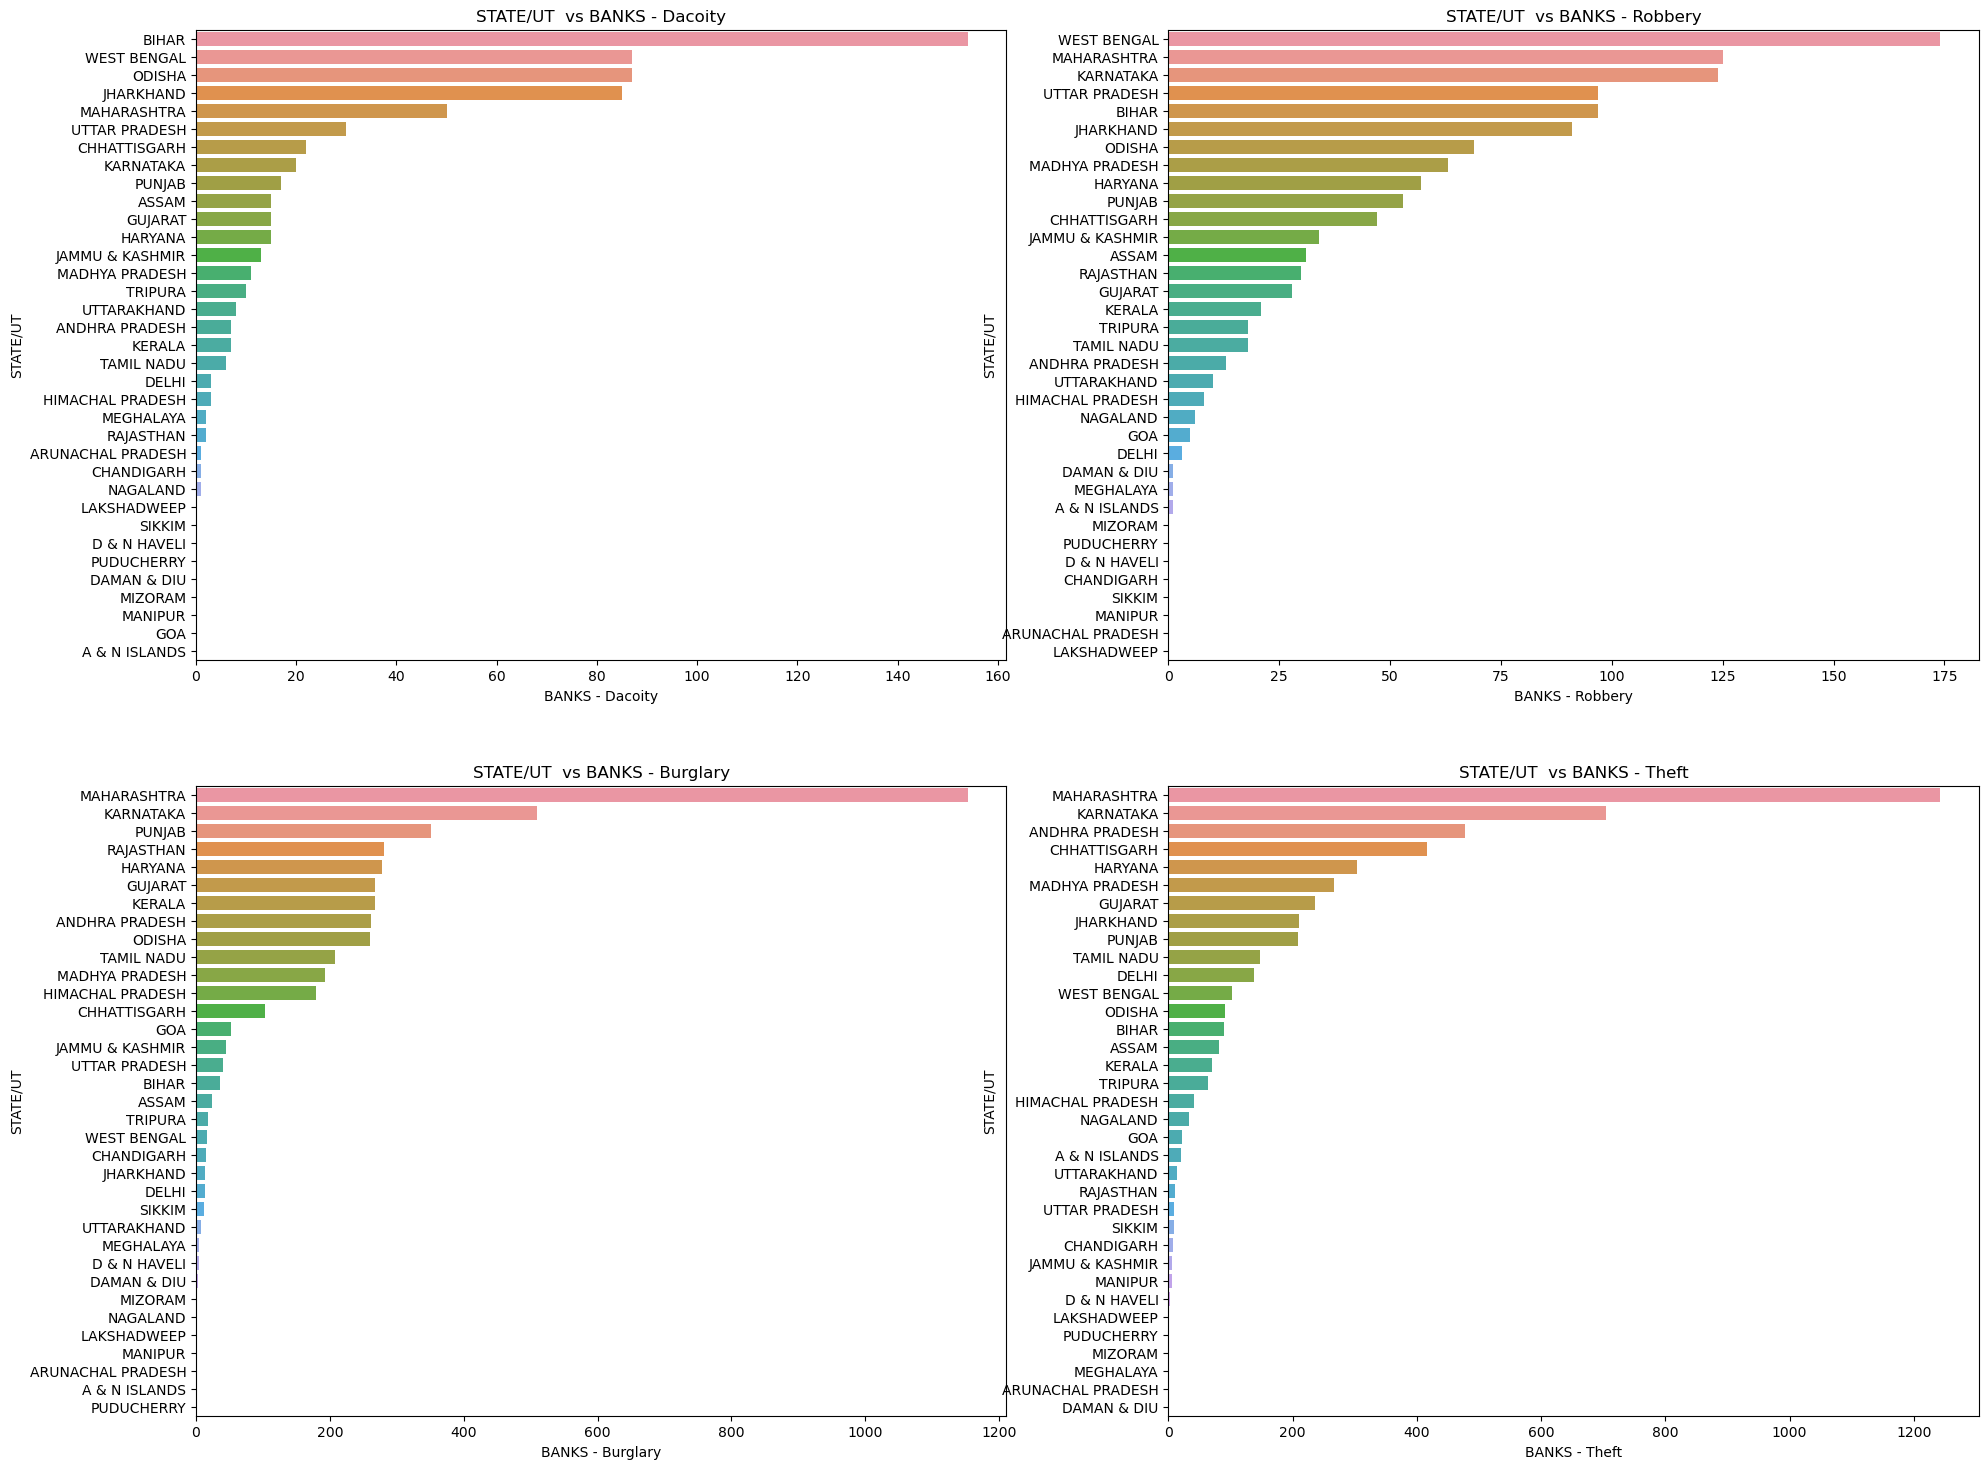

In [50]:
plt.figure(figsize=(23,18))
plot = 1
cols = ['BANKS - Dacoity', 'BANKS - Robbery',
       'BANKS - Burglary', 'BANKS - Theft']
for i in cols :
    if plot <= 4 :
        ax = plt.subplot(2,2,plot)
        dt = dff.groupby('STATE/UT')[i].sum().sort_values(ascending=False).reset_index()
        sns.barplot(x=dt[i] , y=dt['STATE/UT'] , data= dt)
        plt.title('STATE/UT  vs {}'.format(i))
    plot+=1
plt.show()    

- State BIHAR scored the highest number of Banks Dacoity crimes in india
- state WEST BENGAL scored the highest number of Banks Robbery crimes in india
- state MAHARASHTRA recorded the highest number of Burglary and Theft of banks crimes in india

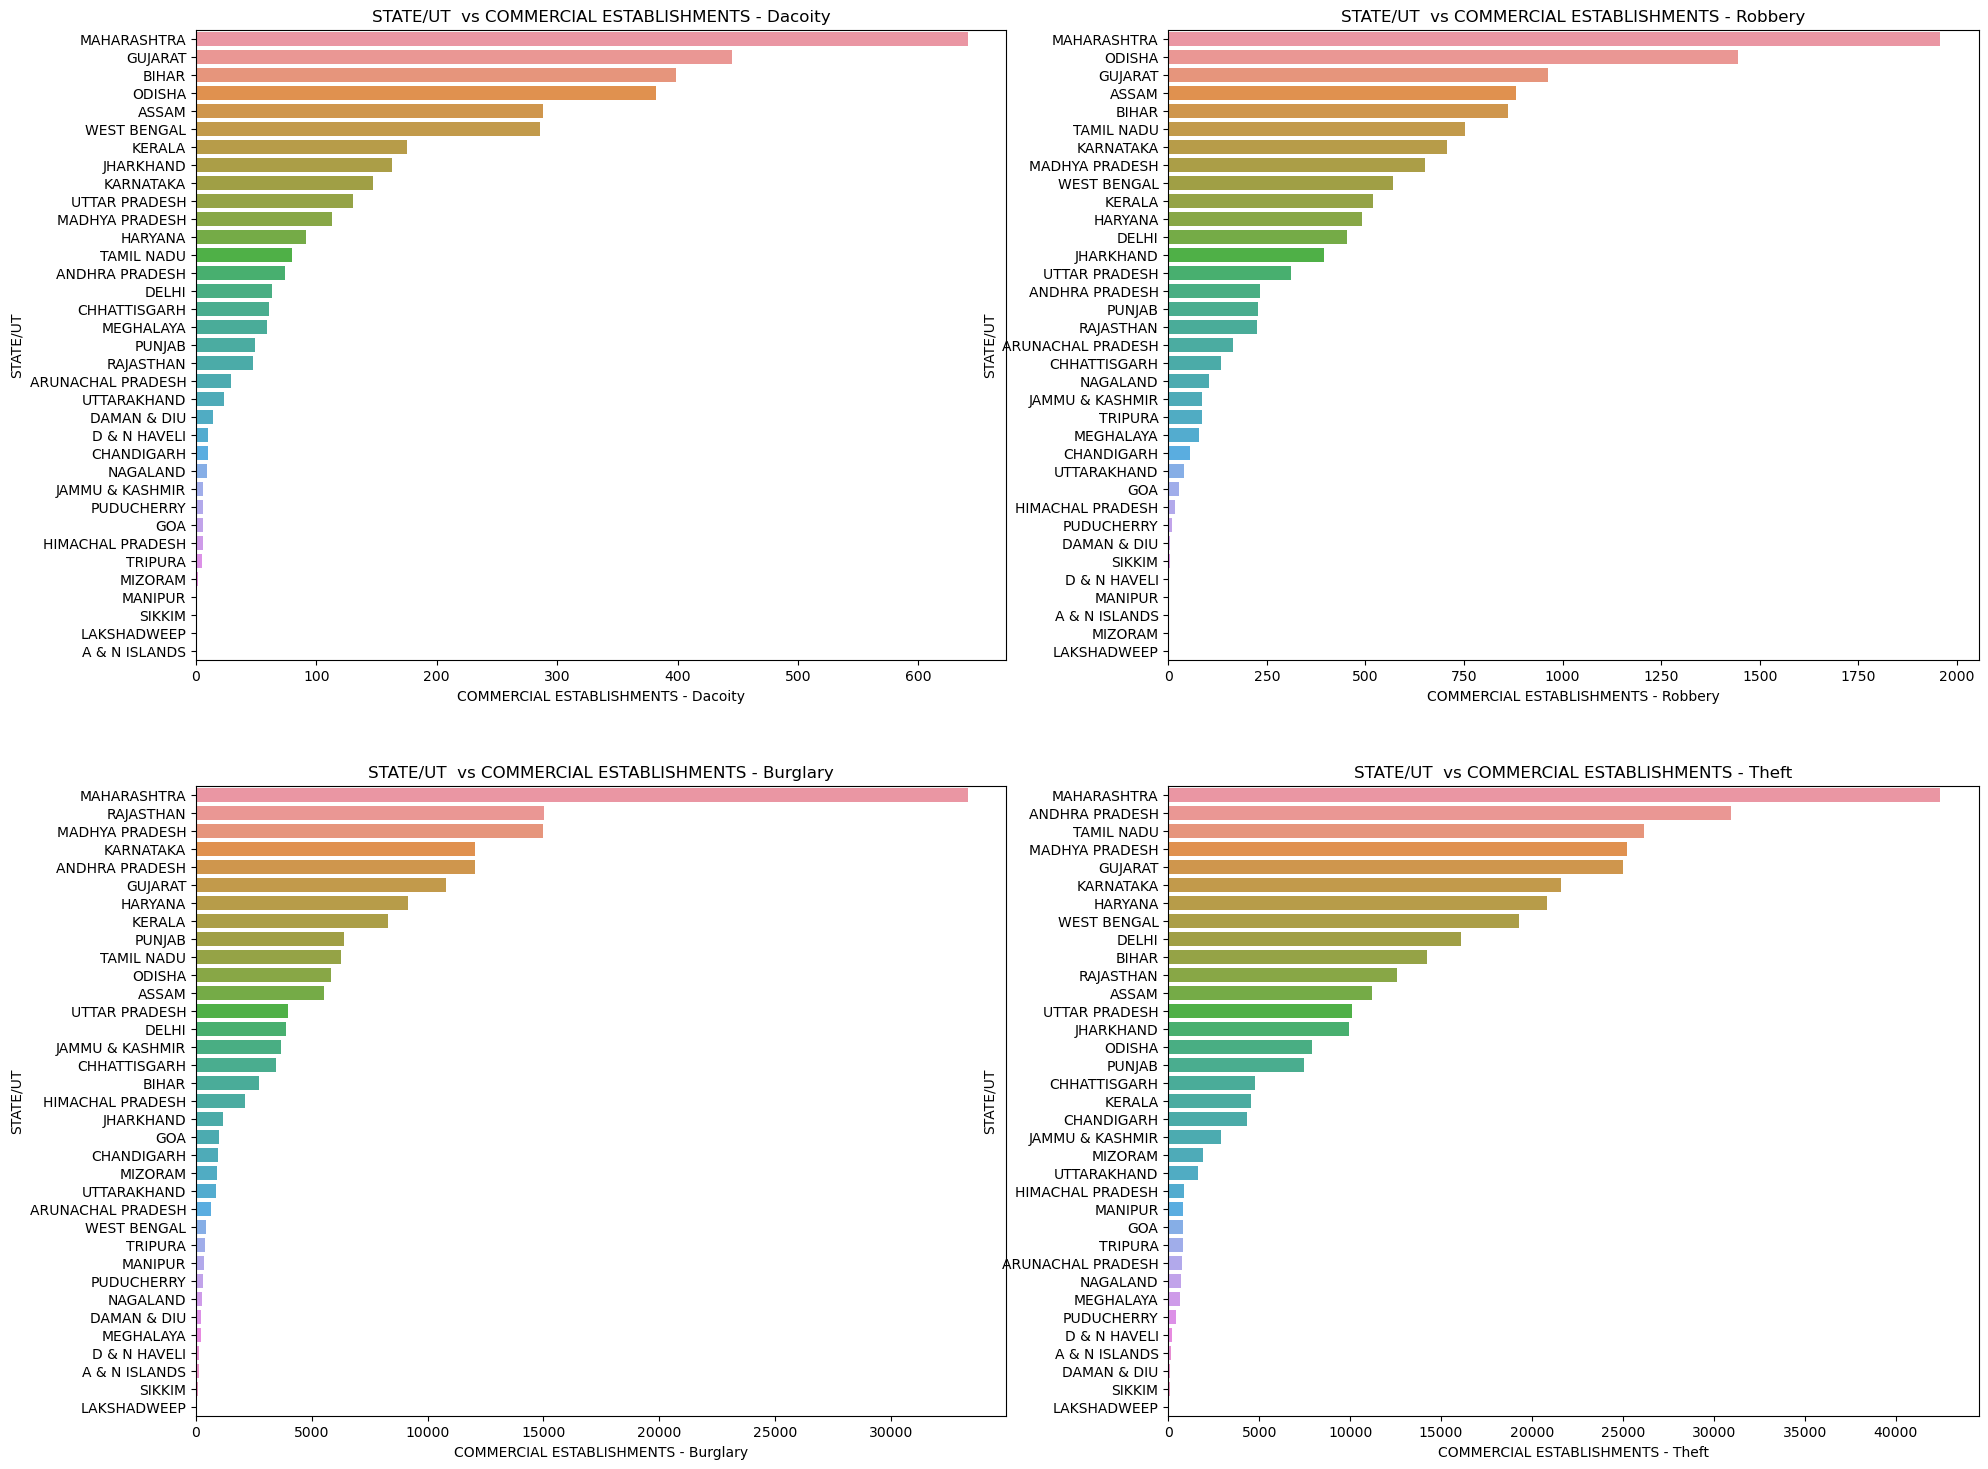

In [51]:
plt.figure(figsize=(23,18))
plot = 1
cols = ['COMMERCIAL ESTABLISHMENTS - Dacoity',
       'COMMERCIAL ESTABLISHMENTS - Robbery',
       'COMMERCIAL ESTABLISHMENTS - Burglary',
       'COMMERCIAL ESTABLISHMENTS - Theft']
for i in cols :
    if plot <= 4 :
        ax = plt.subplot(2,2,plot)
        dt = dff.groupby('STATE/UT')[i].sum().sort_values(ascending=False).reset_index()
        sns.barplot(x=dt[i] , y=dt['STATE/UT'] , data= dt)
        plt.title('STATE/UT  vs {}'.format(i))
    plot+=1
plt.show()    

- state MAHARASHTRA scored the highest numbers of crimes of Dacoity , Robbery , Burglary and Theft against commercial establishments which says it is a very dangerous place to invest in business while states like A & N ISLANDS and LAKSHADWEEP are the most safe states to do business in them

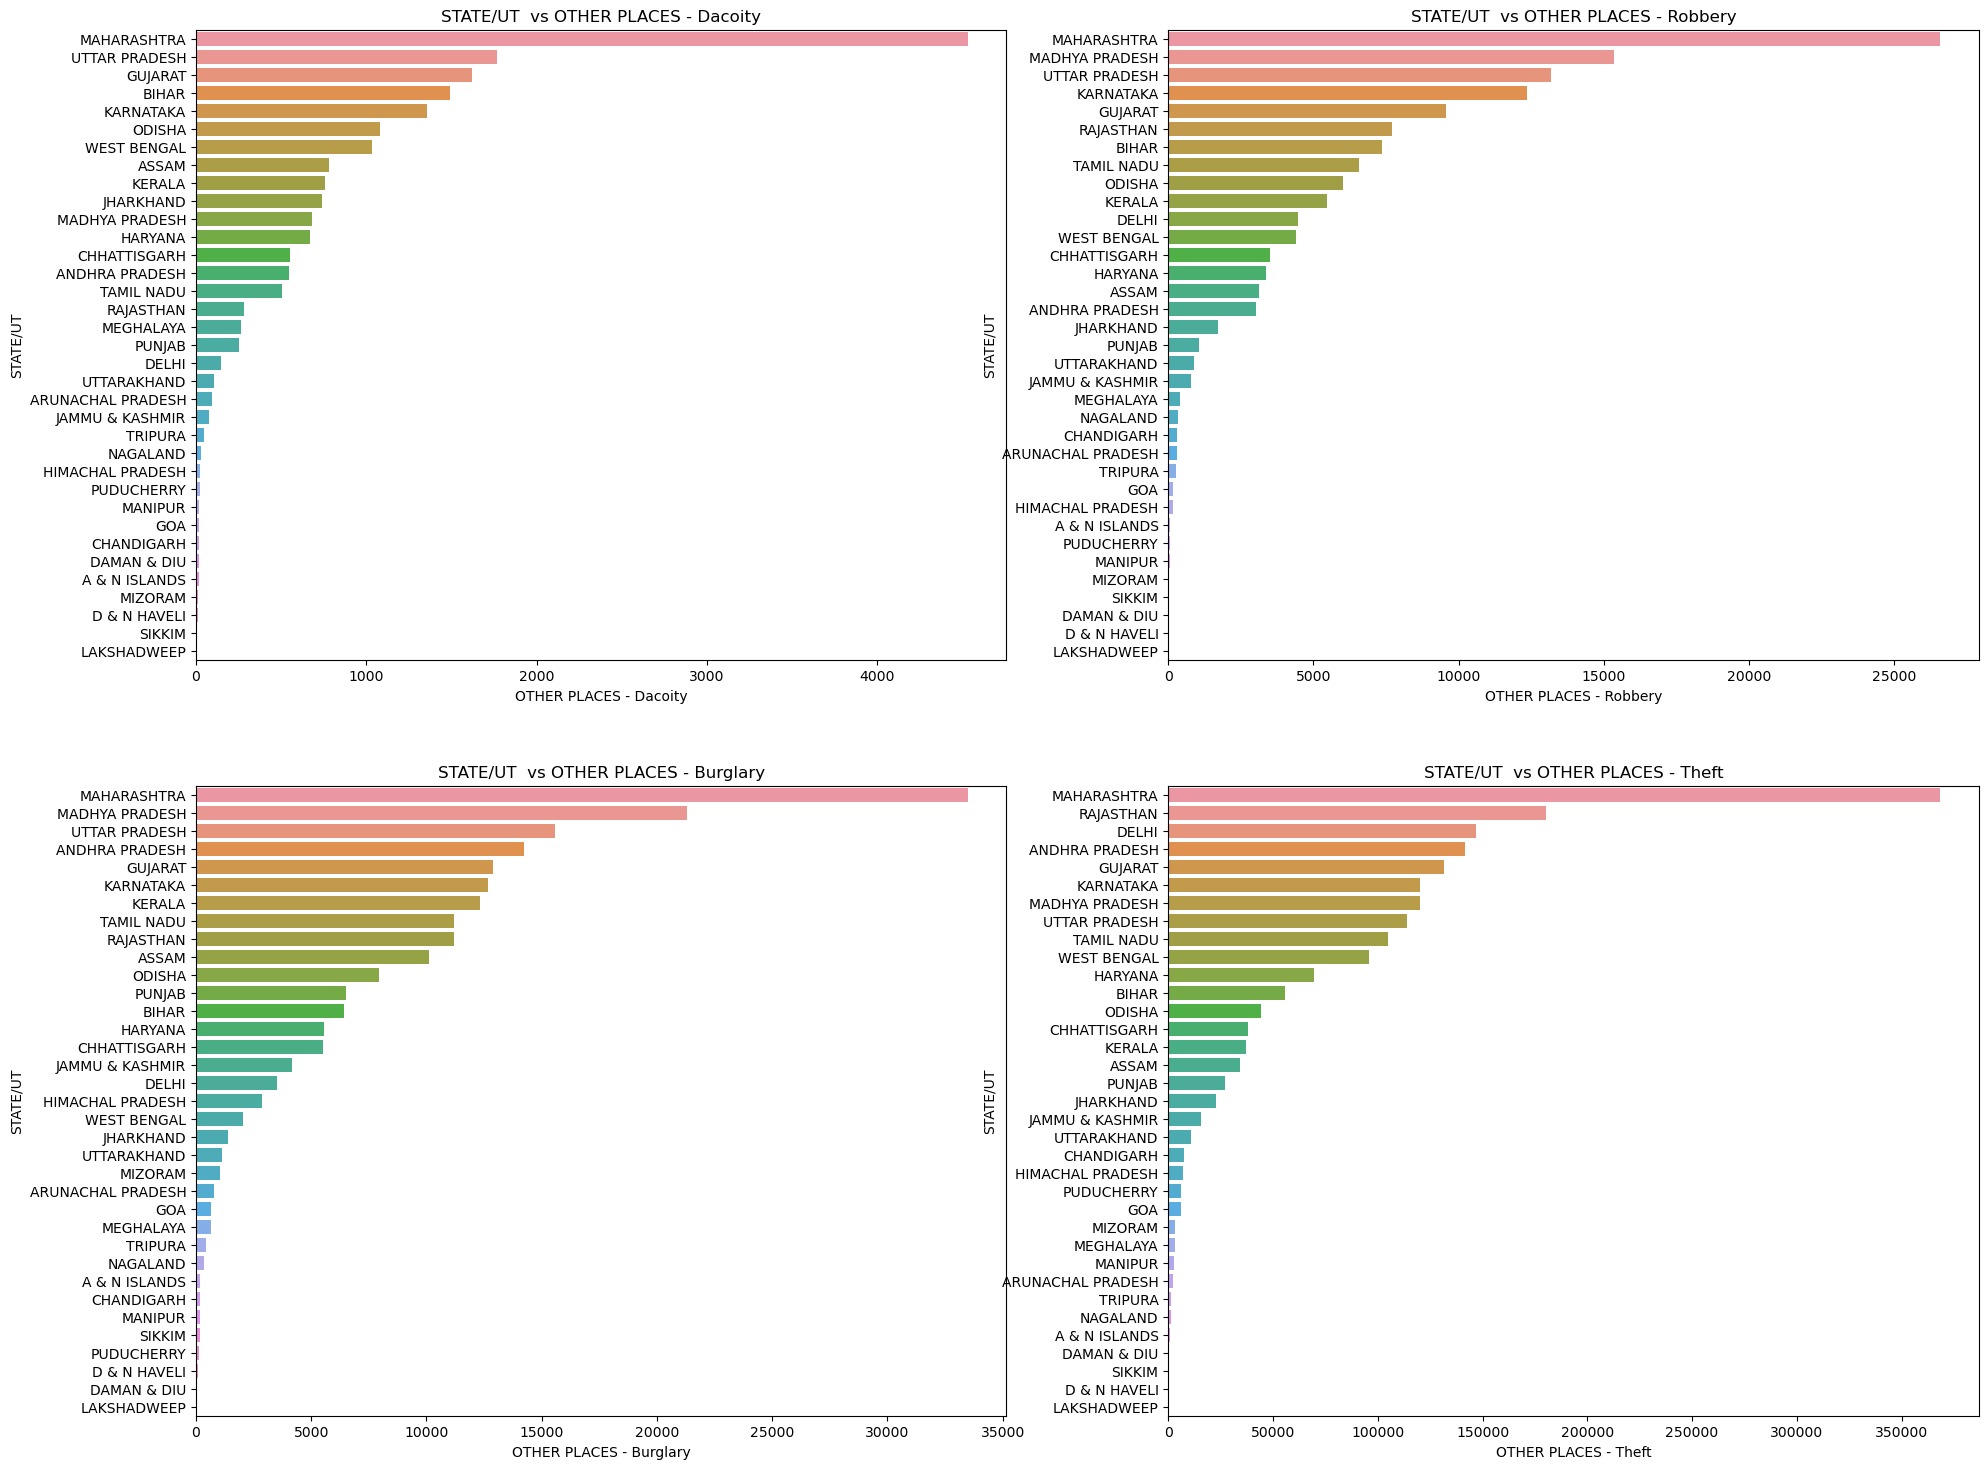

In [52]:
plt.figure(figsize=(23,18))
plot = 1
cols = ['OTHER PLACES - Dacoity',
       'OTHER PLACES - Robbery', 'OTHER PLACES - Burglary',
       'OTHER PLACES - Theft']
for i in cols :
    if plot <= 4 :
        ax = plt.subplot(2,2,plot)
        dt = dff.groupby('STATE/UT')[i].sum().sort_values(ascending=False).reset_index()
        sns.barplot(x=dt[i] , y=dt['STATE/UT'] , data= dt)
        plt.title('STATE/UT  vs {}'.format(i))
    plot+=1
plt.show()    

state MAHARASHTRA recorded the highest number of crimes against different unlabelled places in total india which says it is the most dangerous state to live in or to work while on the other side state LAKSHADWEEP scored the lowest numbers of all types of crimes against general places so it is a very safe state to live and invest in

# Each state vs overall crimes

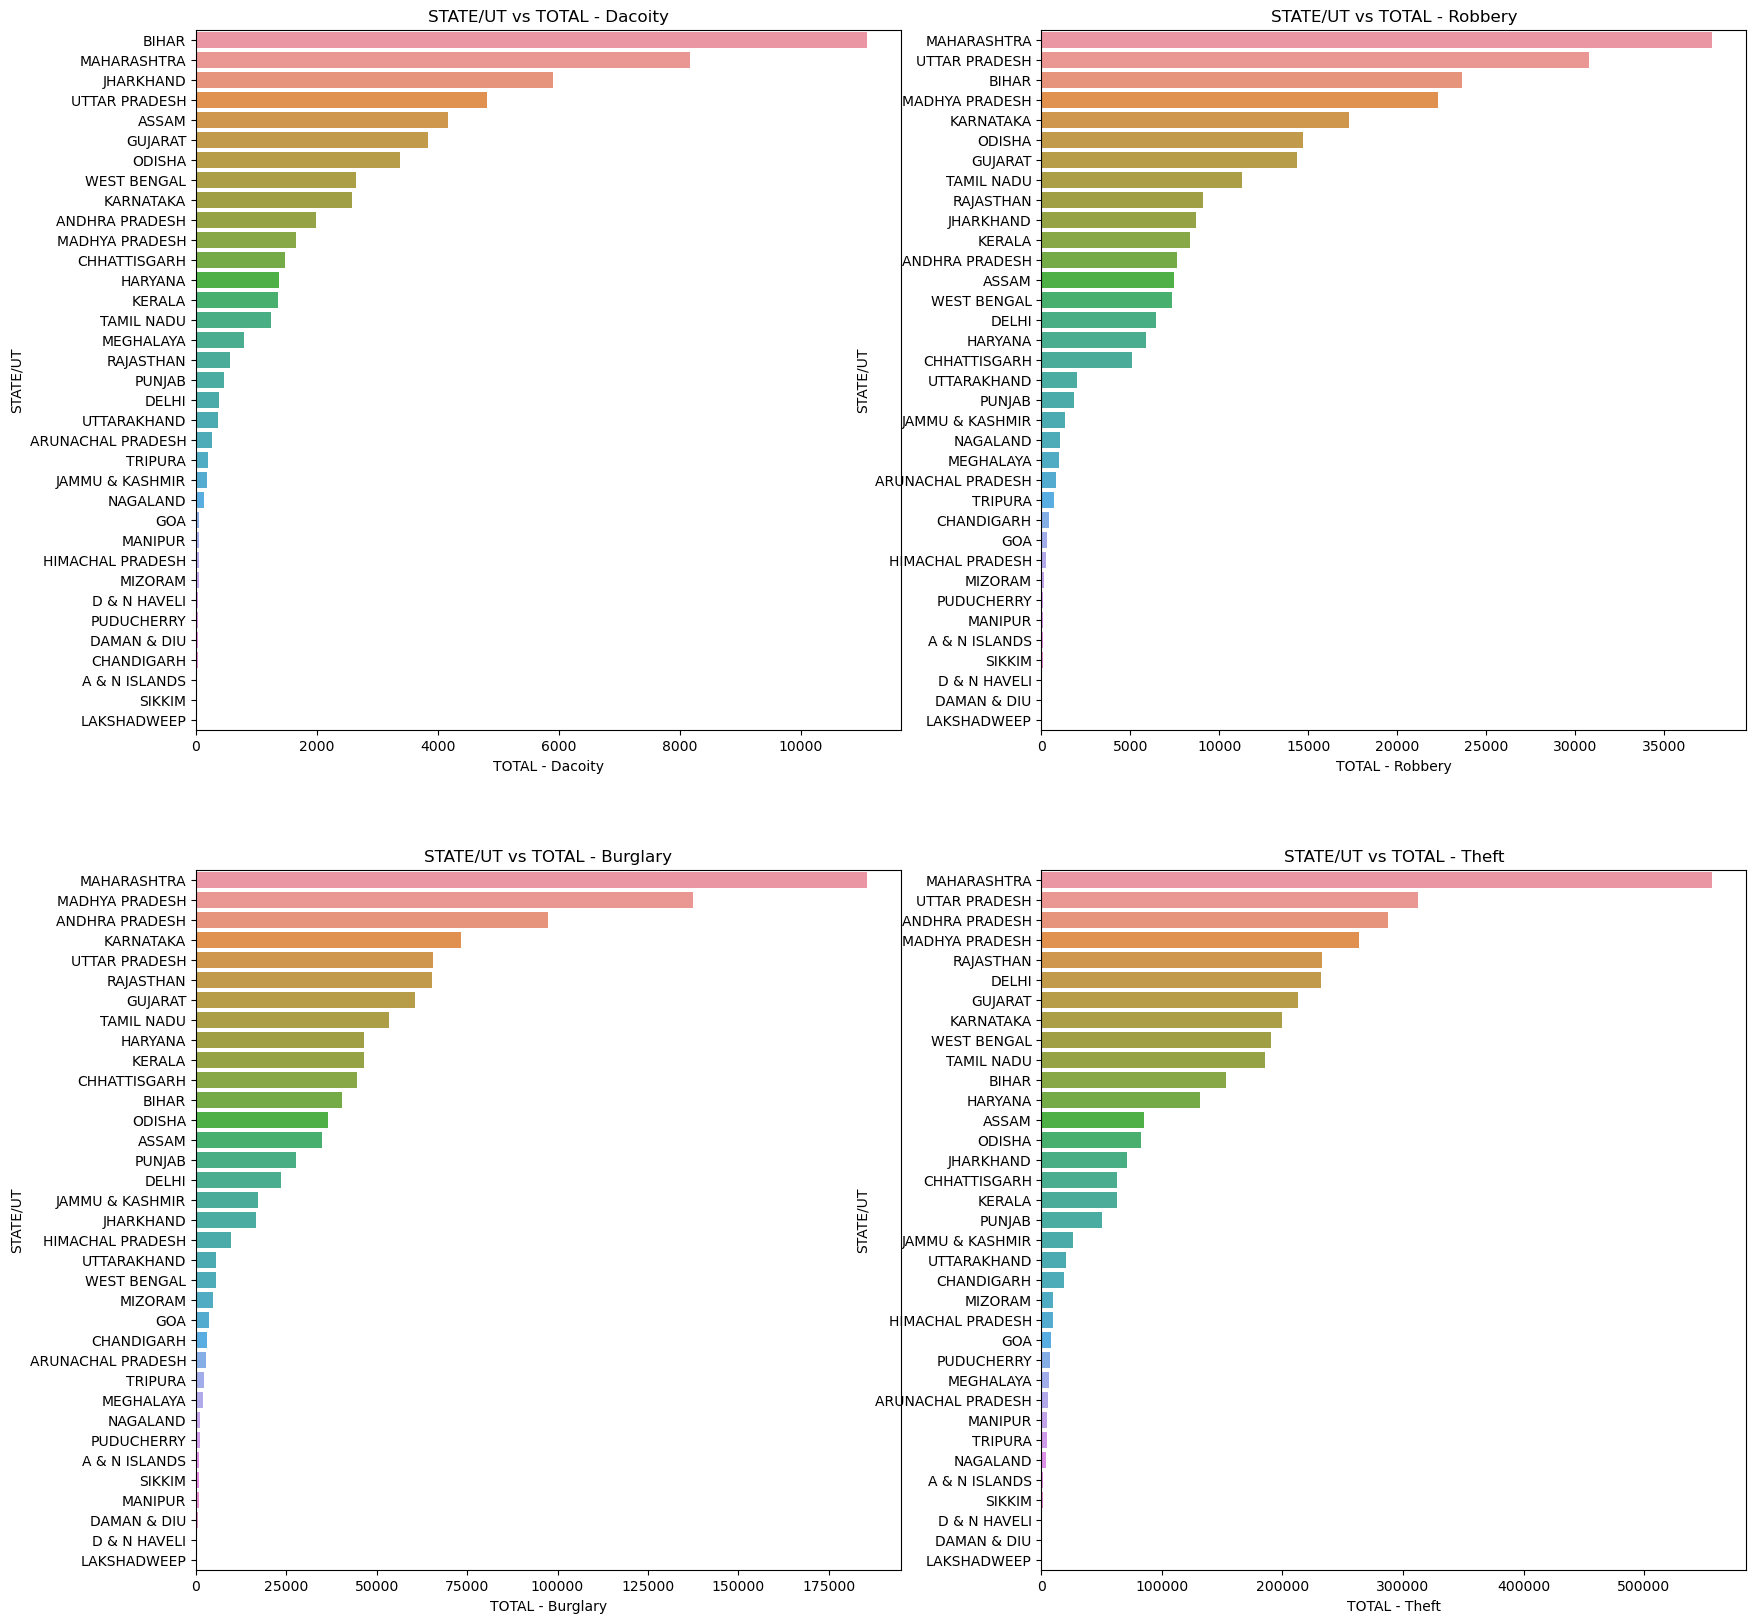

In [53]:
plt.figure(figsize=(20,20))
plot = 1
cols = ['TOTAL - Dacoity', 'TOTAL - Robbery','TOTAL - Burglary', 'TOTAL - Theft']
for i in cols :
    if plot <= 4 :
        ax = plt.subplot(2,2,plot)
        dt = dff.groupby('STATE/UT')[i].sum().sort_values(ascending=False).reset_index()
        sns.barplot(x=dt[i] , y=dt['STATE/UT'] , data= dt)
        plt.title('STATE/UT vs {}'.format(i))
    plot+=1
plt.show()    

- state BIHAR recorded the highest number of Dacoity crimes against all types of properties in india in the last decade
- state MAHARASHTRA scored the highest number of Robbery , Burglary and Theft crimes against all types of properties in india
- state LAKSHADWEEP is the most safe state in india to live and work in as it recorded the lowest numbers of all types of crimes against all types of properties in india

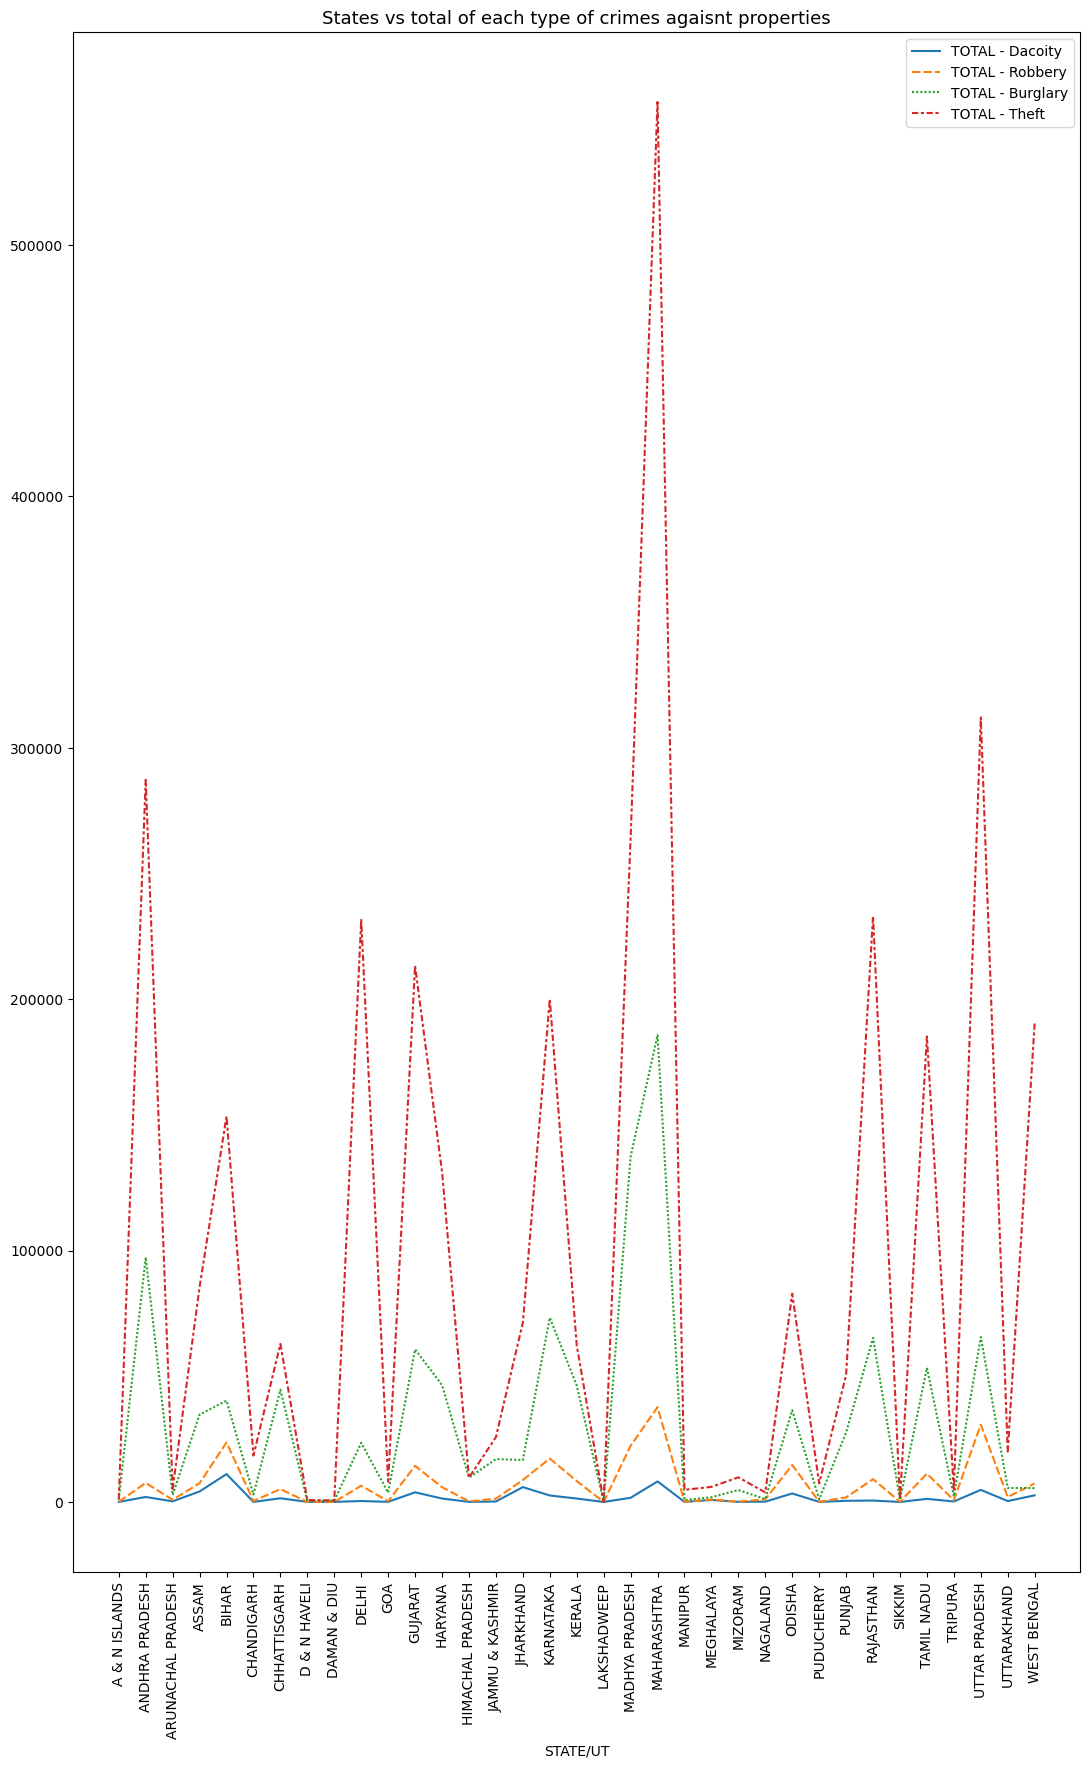

In [54]:
plt.figure(figsize=(13,20))
data1 = dff.groupby('STATE/UT')[['TOTAL - Dacoity', 'TOTAL - Robbery','TOTAL - Burglary', 'TOTAL - Theft']].sum()
sns.lineplot(data = data1)
plt.title('States vs total of each type of crimes agaisnt properties' , fontsize=13)
plt.xticks(rotation = 90)
plt.show()

- Theft of properties Crimes are the most common type of crimes against properties in india while Dacoity crimes are the least
- state MAHARASHTRA scored the highest number of Robbery , Burglary and Theft crimes against all types of properties in india
- state LAKSHADWEEP is the most safe state in india to live and work in as it recorded the lowest numbers of all types of crimes against all types of properties in india

In [55]:
dff.groupby('STATE/UT')['overall crimes'].sum().sort_values(ascending=False).reset_index()

STATE/UT  overall crimes
0         MAHARASHTRA          788318
1      MADHYA PRADESH          425175
2       UTTAR PRADESH          413210
3      ANDHRA PRADESH          394118
4           RAJASTHAN          307876
5           KARNATAKA          293126
6             GUJARAT          292121
7               DELHI          261943
8          TAMIL NADU          251008
9               BIHAR          228430
10        WEST BENGAL          205964
11            HARYANA          185144
12             ODISHA          137428
13              ASSAM          131864
14             KERALA          118417
15       CHHATTISGARH          114110
16          JHARKHAND          102619
17             PUNJAB           80412
18    JAMMU & KASHMIR           44317
19        UTTARAKHAND           27960
20         CHANDIGARH           21849
21   HIMACHAL PRADESH           19628
22            MIZORAM           14710
23                GOA           12098
24          MEGHALAYA            9662
25  ARUNACHAL PRADESH            9061
26         PUDUCHERRY            8557
27            TRIPURA            7483
28           NAGALAND            6115
29            MANIPUR            5720
30      A & N ISLANDS            2105
31             SIKKIM            1966
32       D & N HAVELI            1231
33        DAMAN & DIU            1201
34        LAKSHADWEEP             152

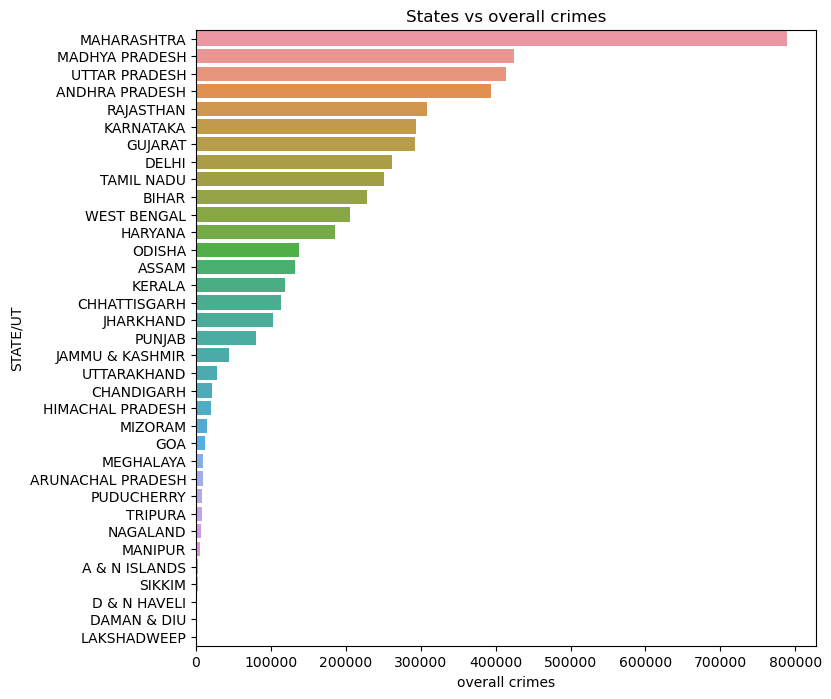

In [58]:
plt.figure(figsize=(8,8))
dtt = dff.groupby('STATE/UT')['overall crimes'].sum().sort_values(ascending=False).reset_index()
sns.barplot(x= dtt['overall crimes'] , y= dtt['STATE/UT'] , data = dtt)
plt.title('States vs overall crimes')
plt.show()

- state MAHARASHTRA scored the highest number of crimes against properties generally in india in the last decade which says it is a very dangerous place to live or work in while state MADHYA PRADESH came in the second place
- state DELHI recorded 261943 in the whole last decade which is proportional to its high density and being the capital
- state LAKSHADWEEP scored the lowest number of crimes generally in indian in the last decade which indicates it is a very safe place to live in

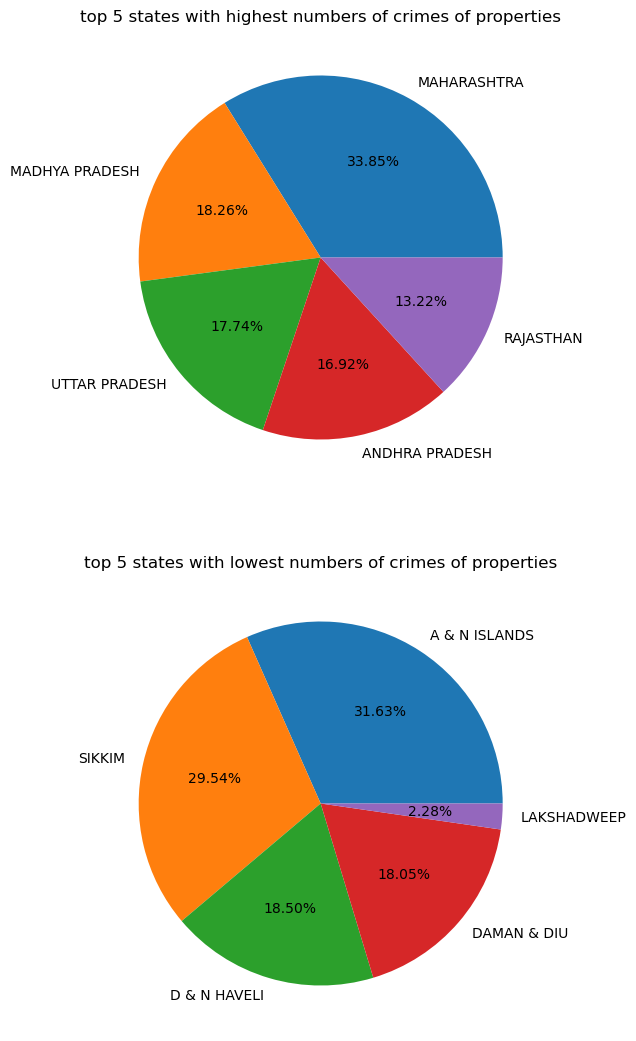

In [70]:
figure,ax= plt.subplots(2,1,figsize=(20,13))

plt.subplot(2,1,1)
dt = dff.groupby('STATE/UT')['overall crimes'].sum().sort_values(ascending=False).reset_index()[:5]
plt.pie(x=dt['overall crimes'] , labels=dt['STATE/UT'].unique() , data=dt , autopct='%0.2f%%')
plt.title('top 5 states with highest numbers of crimes of properties')

plt.subplot(2,1,2)
dt = dff.groupby('STATE/UT')['overall crimes'].sum().sort_values(ascending=False).reset_index()[-5:]
plt.pie(x=dt['overall crimes'] , labels=dt['STATE/UT'].unique() , data=dt , autopct='%0.2f%%')
plt.title('top 5 states with lowest numbers of crimes of properties')

plt.show()

# Visualization of each type of crimes agaisnt each type of property

In [59]:
dff.columns

Index(['STATE/UT', 'YEAR', 'RESIDENTIAL PREMISES - Dacoity',
       'RESIDENTIAL PREMISES - Robbery', 'RESIDENTIAL PREMISES - Burglary',
       'RESIDENTIAL PREMISES - Theft', 'HIGHWAYS - Dacoity',
       'HIGHWAYS - Robbery', 'HIGHWAYS - Burglary', 'HIGHWAYS - Theft',
       'RIVER and SEA - Dacoity', 'RIVER and SEA - Robbery',
       'RIVER and SEA - Burglary', 'RIVER and SEA - Theft',
       'RAILWAYS - Dacoity', 'RAILWAYS - Robbery', 'RAILWAYS - Burglary',
       'RAILWAYS - Theft', 'BANKS - Dacoity', 'BANKS - Robbery',
       'BANKS - Burglary', 'BANKS - Theft',
       'COMMERCIAL ESTABLISHMENTS - Dacoity',
       'COMMERCIAL ESTABLISHMENTS - Robbery',
       'COMMERCIAL ESTABLISHMENTS - Burglary',
       'COMMERCIAL ESTABLISHMENTS - Theft', 'OTHER PLACES - Dacoity',
       'OTHER PLACES - Robbery', 'OTHER PLACES - Burglary',
       'OTHER PLACES - Theft', 'TOTAL - Dacoity', 'TOTAL - Robbery',
       'TOTAL - Burglary', 'TOTAL - Theft', 'overall crimes', 'population',
       'lite

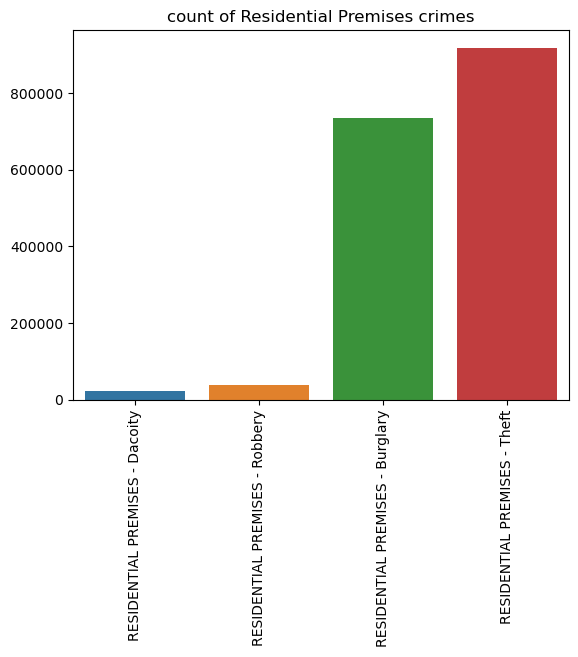

In [60]:
prop = dff[['RESIDENTIAL PREMISES - Dacoity',
       'RESIDENTIAL PREMISES - Robbery', 'RESIDENTIAL PREMISES - Burglary',
       'RESIDENTIAL PREMISES - Theft']].sum()
sns.barplot(x=prop.index , y=prop.values)
plt.title('count of Residential Premises crimes')
plt.xticks(rotation=90)
plt.show()

Theft crimes against Residential Premises are the highest while Dacoity crimes are the least

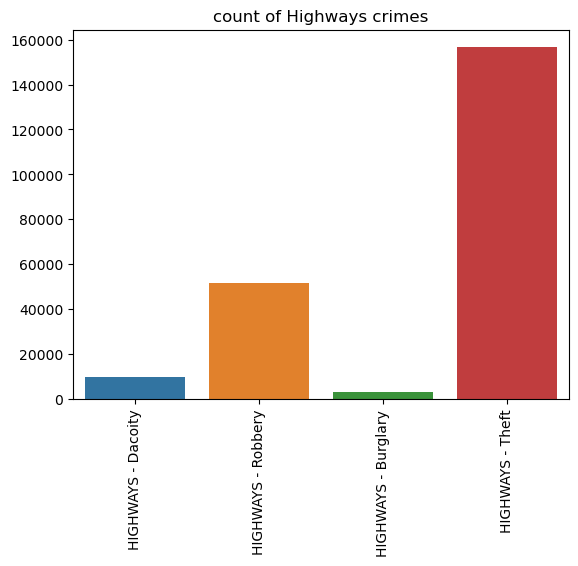

In [62]:
prop1 = dff[['HIGHWAYS - Dacoity',
       'HIGHWAYS - Robbery', 'HIGHWAYS - Burglary', 'HIGHWAYS - Theft']].sum()
sns.barplot(x=prop1.index , y=prop1.values)
plt.title('count of Highways crimes')
plt.xticks(rotation=90)
plt.show()

- Theft crimes against Highways are the highest while Burglary crimes are the least

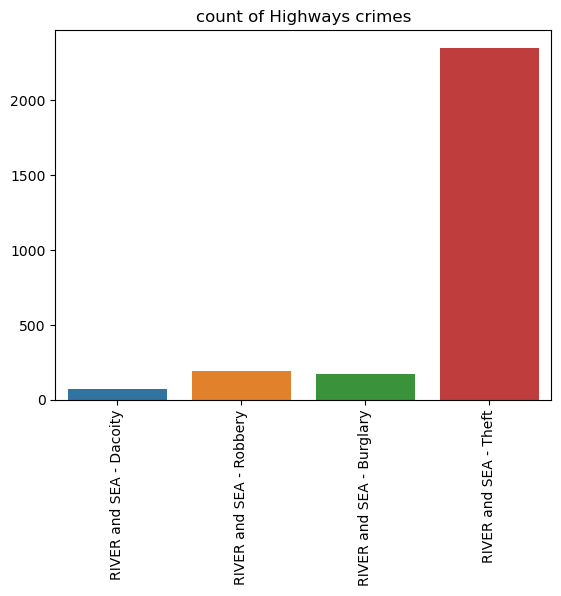

In [63]:
prop2 = dff[['RIVER and SEA - Dacoity', 'RIVER and SEA - Robbery',
       'RIVER and SEA - Burglary', 'RIVER and SEA - Theft']].sum()
sns.barplot(x=prop2.index , y=prop2.values)
plt.title('count of Highways crimes')
plt.xticks(rotation=90)
plt.show()

- Theft crimes against River and sea properties are the highest while Dacoity crimes are the lowest

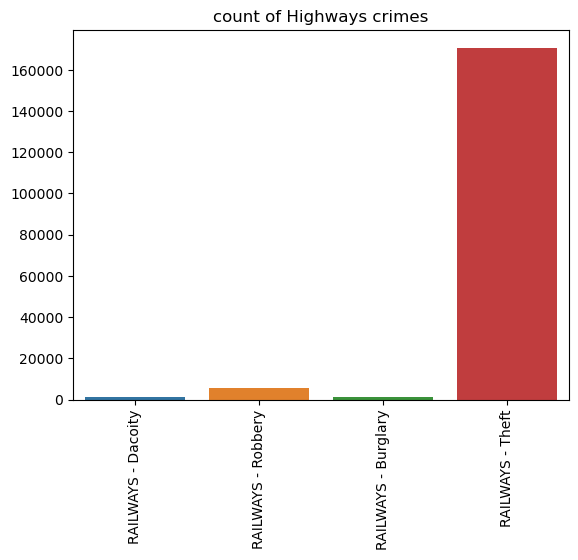

In [64]:
prop3 = dff[['RAILWAYS - Dacoity', 'RAILWAYS - Robbery', 'RAILWAYS - Burglary',
       'RAILWAYS - Theft']].sum()
sns.barplot(x=prop3.index , y=prop3.values)
plt.title('count of Highways crimes')
plt.xticks(rotation=90)
plt.show()

- Theft crimes are the highest type against Railways logistics and properties and Robberies are the second while Burglary crimes are the lowest

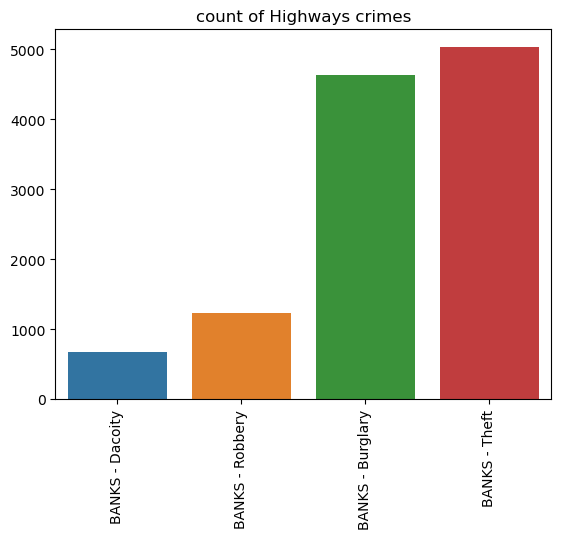

In [66]:
prop4 = dff[['BANKS - Dacoity', 'BANKS - Robbery',
       'BANKS - Burglary', 'BANKS - Theft']].sum()
sns.barplot(x=prop4.index , y=prop4.values)
plt.title('count of Highways crimes')
plt.xticks(rotation=90)
plt.show()

- Theft crimes against Banks are the highest type of Banks crimes in india in the last decade while Brglary are in the second place
- Banks Dacoity are the least occured crimes against banks

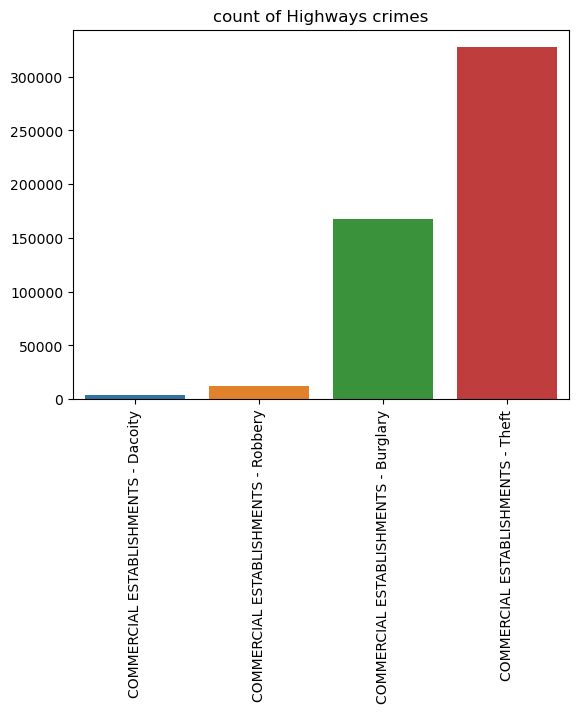

In [67]:
prop5 = dff[['COMMERCIAL ESTABLISHMENTS - Dacoity',
       'COMMERCIAL ESTABLISHMENTS - Robbery',
       'COMMERCIAL ESTABLISHMENTS - Burglary',
       'COMMERCIAL ESTABLISHMENTS - Theft']].sum()
sns.barplot(x=prop5.index , y=prop5.values)
plt.title('count of Highways crimes')
plt.xticks(rotation=90)
plt.show()

Commercial establishment's theft crimes are the most occured against commercial establishments in india in the last decade while Dacoity are the least

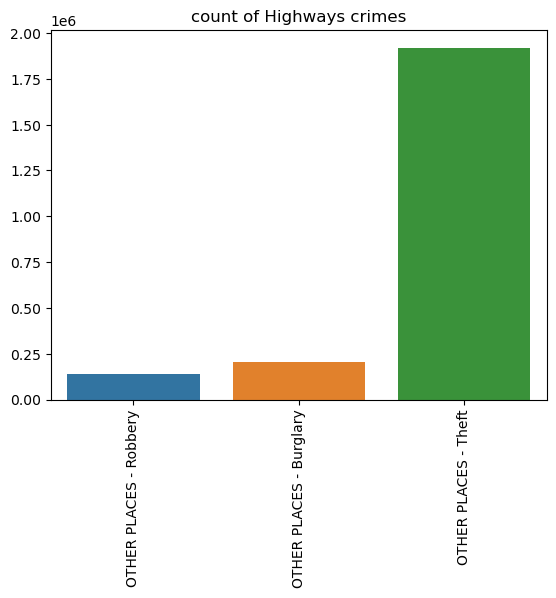

In [68]:
prop5 = dff[['OTHER PLACES - Robbery', 'OTHER PLACES - Burglary',
       'OTHER PLACES - Theft']].sum()
sns.barplot(x=prop5.index , y=prop5.values)
plt.title('count of Highways crimes')
plt.xticks(rotation=90)
plt.show()

There are no recorded Dacoity crimes against other general places in in india the last decade while theft crimes are the most high occured crimes in other general places in india

# 2.3 Years vs overall crimes

In [71]:
dff.groupby('YEAR')['overall crimes'].sum().sort_values(ascending=False).reset_index()

YEAR  overall crimes
0   2011          462289
1   2012          461956
2   2010          448242
3   2009          443260
4   2008          435655
5   2007          399976
6   2004          389304
7   2006          389223
8   2005          386033
9   2001          380040
10  2002          368241
11  2003          360879

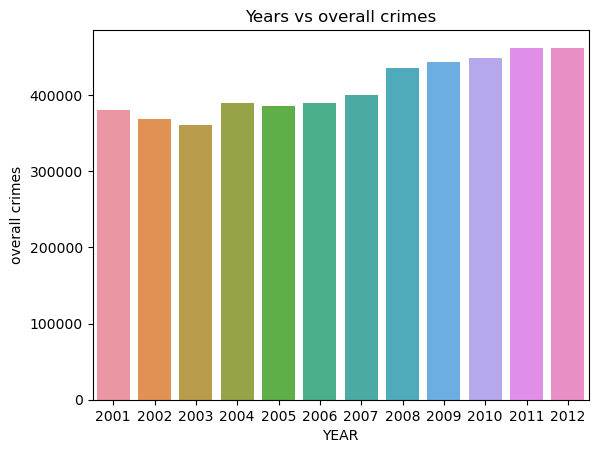

In [72]:
dt = dff.groupby('YEAR')['overall crimes'].sum().sort_values(ascending=False).reset_index()
sns.barplot(y=dt['overall crimes'] , x= dt['YEAR'] , data=dt)
plt.title('Years vs overall crimes')
plt.show()

- 2011 recorded the highest number of property crimes in india
- 2003 recorded the lowest number of crimes in india in the last decade

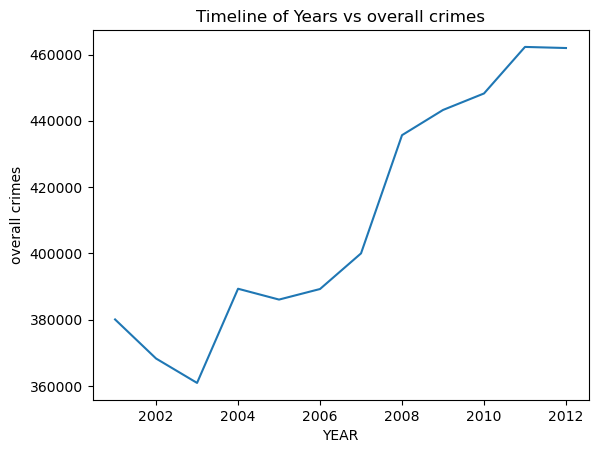

In [73]:
dt = dff.groupby('YEAR')['overall crimes'].sum()
sns.lineplot(data= dt)
plt.title('Timeline of Years vs overall crimes')
plt.show()

criminality against properties decreased between 2001 and 2003 to reincrease rapidly between 2003 and 2012 as it reached its peak in 2011 by more than 460000 crimes in 2011 which is a very high record

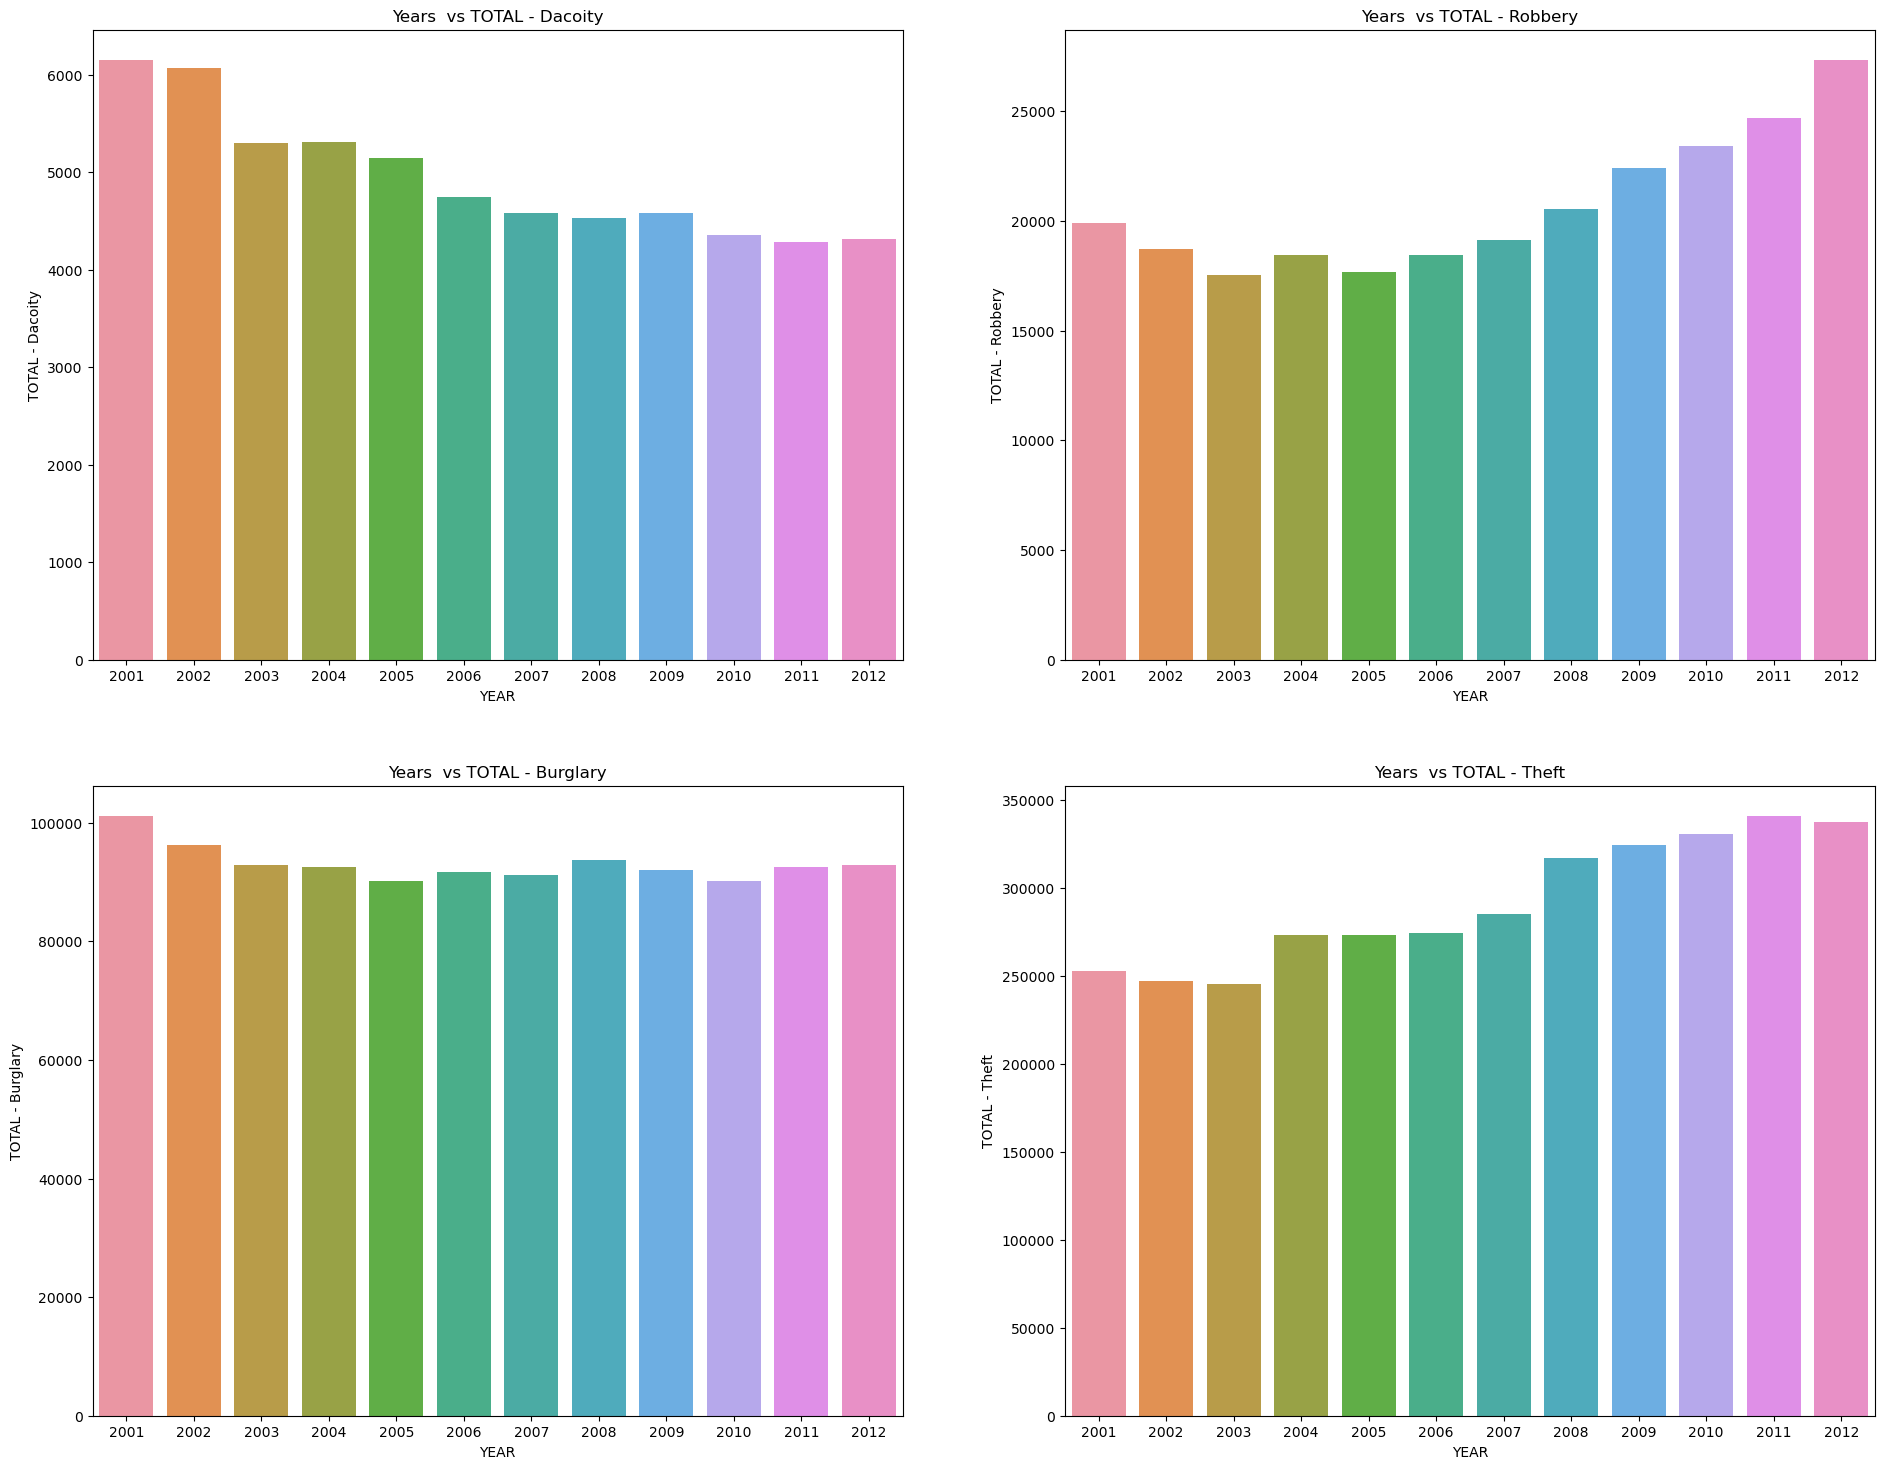

In [76]:
plt.figure(figsize=(23,18))
plot = 1
cols = ['TOTAL - Dacoity', 'TOTAL - Robbery',
       'TOTAL - Burglary', 'TOTAL - Theft']
for i in cols :
    if plot <= 4 :
        ax = plt.subplot(2,2,plot)
        dt = dff.groupby('YEAR')[i].sum().sort_values(ascending=False).reset_index()
        sns.barplot(y=dt[i] , x=dt['YEAR'] , data= dt)
        plt.title('Years  vs {}'.format(i))
    plot+=1
plt.show()    

- 2001 recorded the highest number of Dacoity crimes in india in the last decade while 2011 recorded the lowest number
- 2012 recorded the highest number of Robbery crimes in india in the last decade while 2003 recorded the lowest number
- 2001 recorded the highest number of Burglary crimes in india in the last decade while 2010 recorded the lowest number
- 2011 recorded the highest number of Theft crimes in india in the last decade while 2003 recorded the lowest number

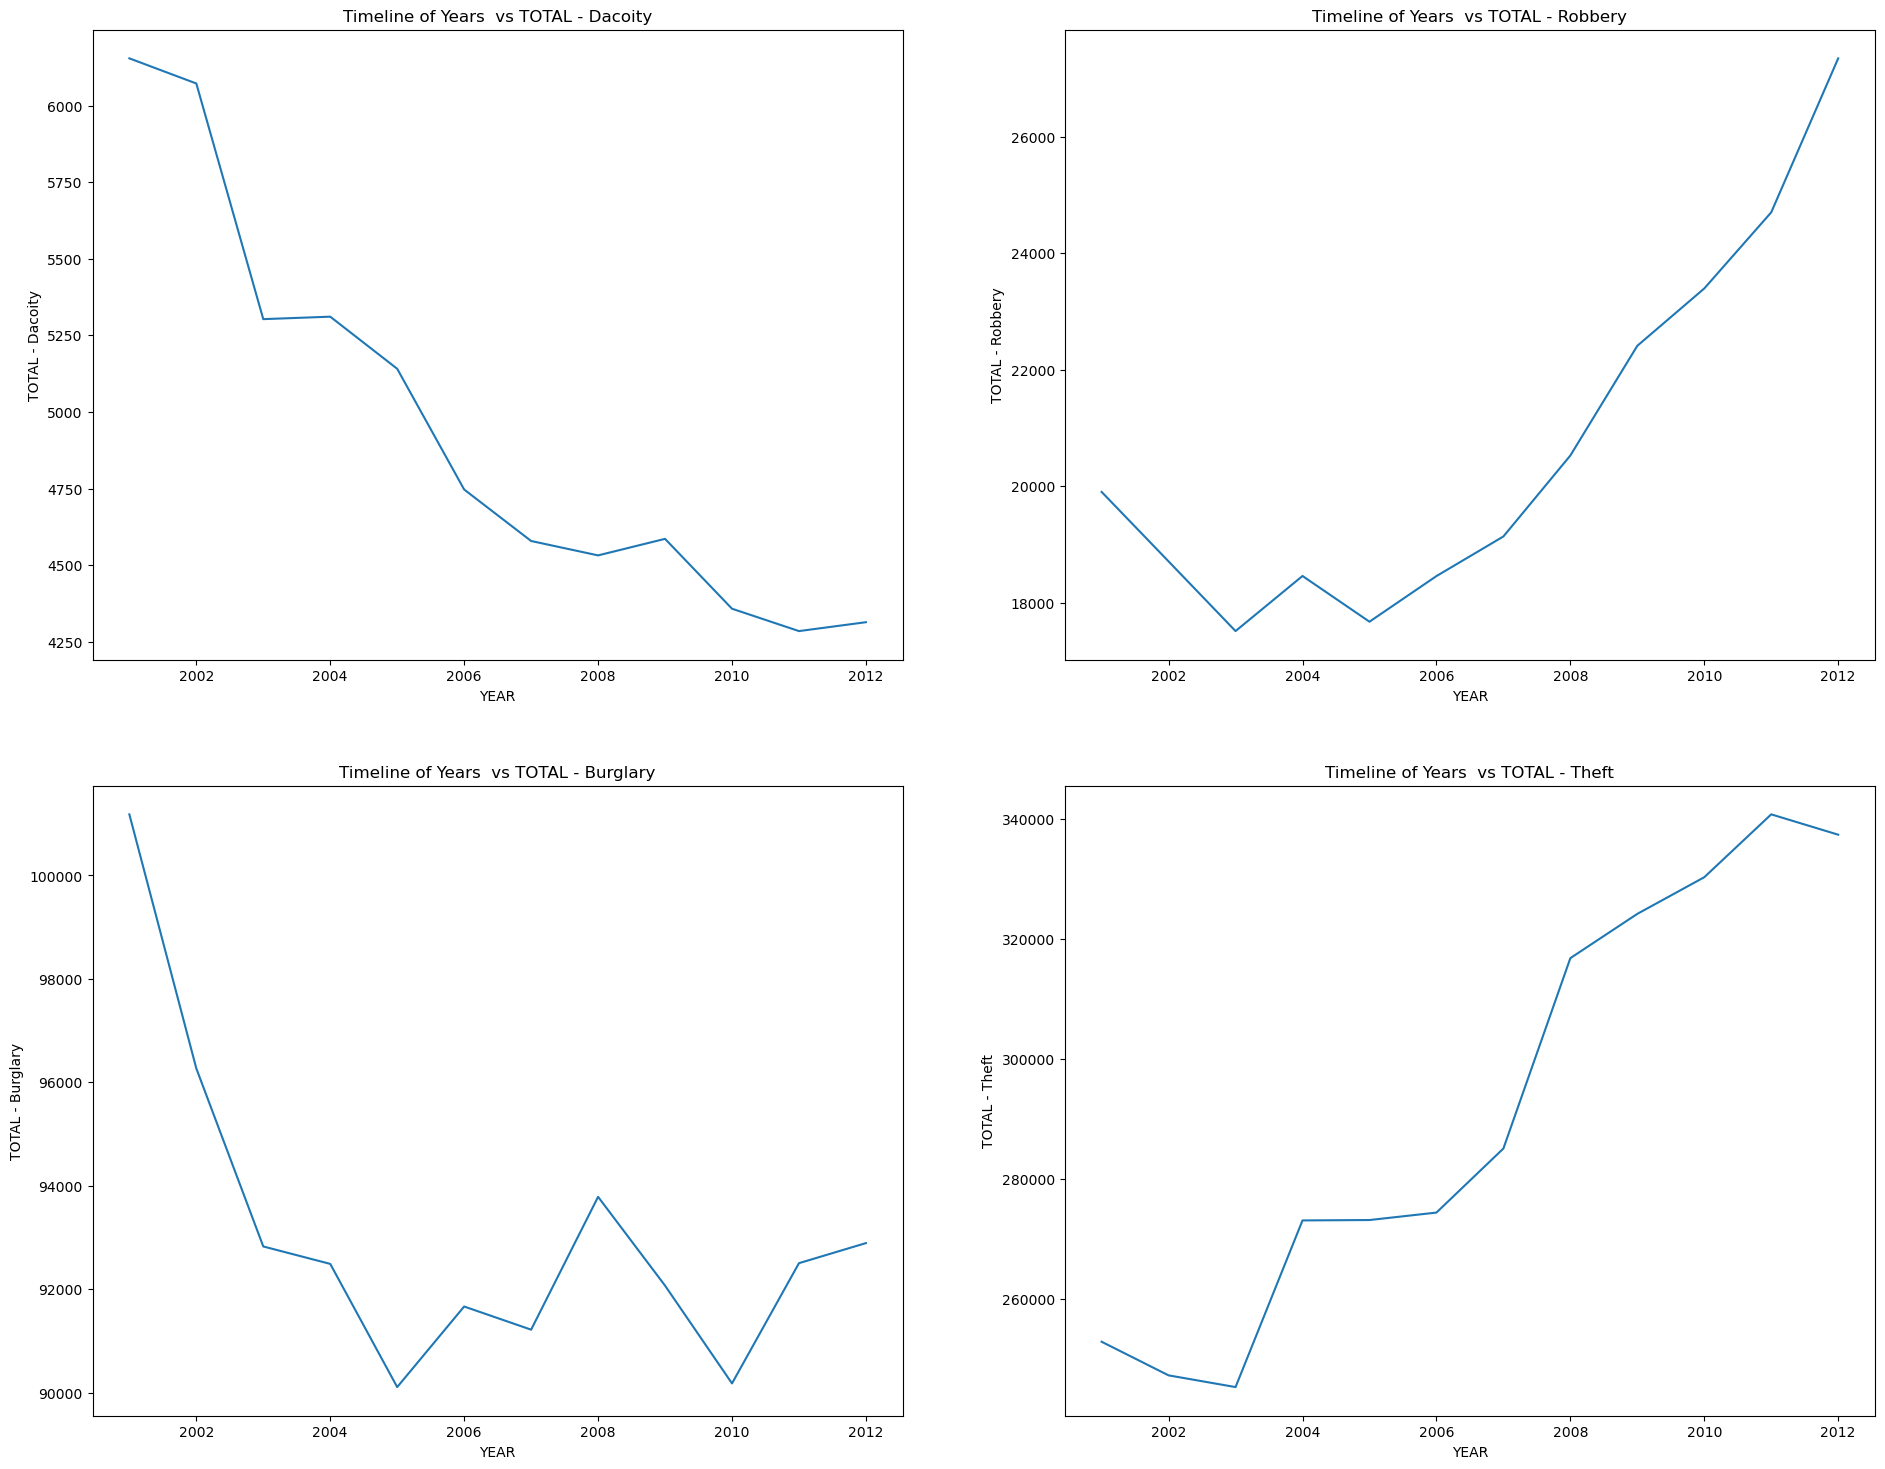

In [78]:
plt.figure(figsize=(23,18))
plot = 1
cols = ['TOTAL - Dacoity', 'TOTAL - Robbery',
       'TOTAL - Burglary', 'TOTAL - Theft']
for i in cols :
    if plot <= 4 :
        ax = plt.subplot(2,2,plot)
        dt = dff.groupby('YEAR')[i].sum()
        sns.lineplot(data = dt)
        plt.title('Timeline of Years  vs {}'.format(i))
    plot+=1
plt.show()    

- crimes of Dacoity decreased from more than 6000 crimes in 2001 to lower than 4500 ones in 2012
- crimes of Robbery increased raplidly from 2005 to reach its peak in 2012
- crimes of Burglary decreased rapidly from more than 100000 crimes in 2001 to lower than 91000 crimes in 2005 to to highly peak again in 2008
- crimes of Theft increased rapidly between 2003 and 2012 and reached its peak in 2011

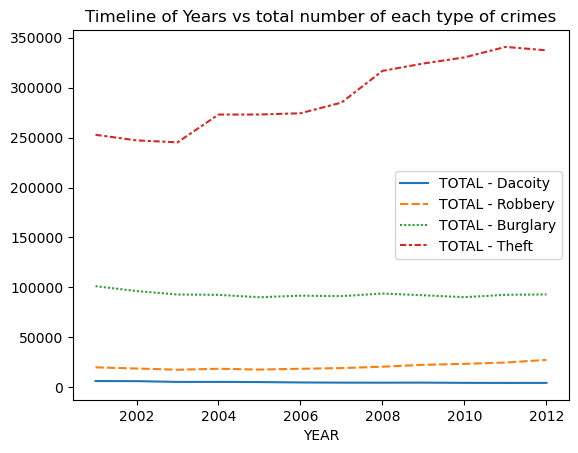

In [77]:
dt = dff.groupby('YEAR')[['TOTAL - Dacoity', 'TOTAL - Robbery',
       'TOTAL - Burglary', 'TOTAL - Theft']].sum()
sns.lineplot(data= dt)
plt.title('Timeline of Years vs total number of each type of crimes')
plt.show()

- Theft crimes are the most committed crimes against all types of properties in in india in the last decade while Dacoity crimes are the lowest
- 2011 recorded the highest number of theft crimes which is the most highest number among all types of crimes
- 2011 was the most dangerous year on properties in the last decade

# 2.4 Analysis of area vs overall crime

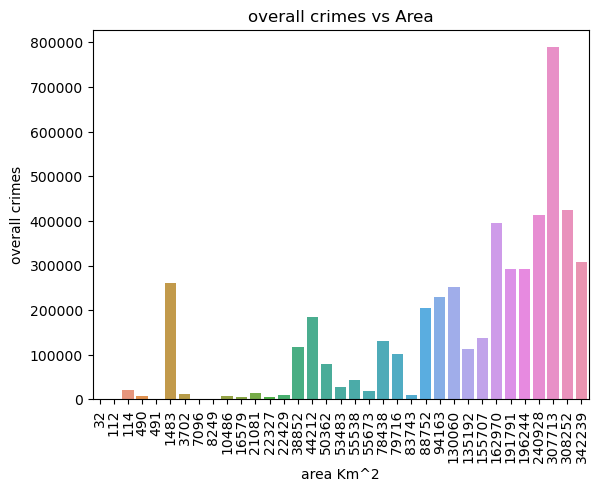

In [97]:
dt = dff.groupby('Area km^2')['overall crimes'].sum().sort_values(ascending=False).reset_index()
sns.barplot(y='overall crimes' , x='Area km^2' , data=dt)
plt.title('overall crimes vs Area')
plt.xlabel('area Km^2')
plt.ylabel('overall crimes')
plt.xticks(rotation=90)
plt.show()

- Area 307713 km^2 has the highest number of crimes while Area 32 km^2 has the lowest crimes
- numbers of crimes increase above 250000 in states with areas higher than 16000 Km^2
- criminality of properties increasing in widen areas

# 2.5 Analysis of Population vs overall Crime

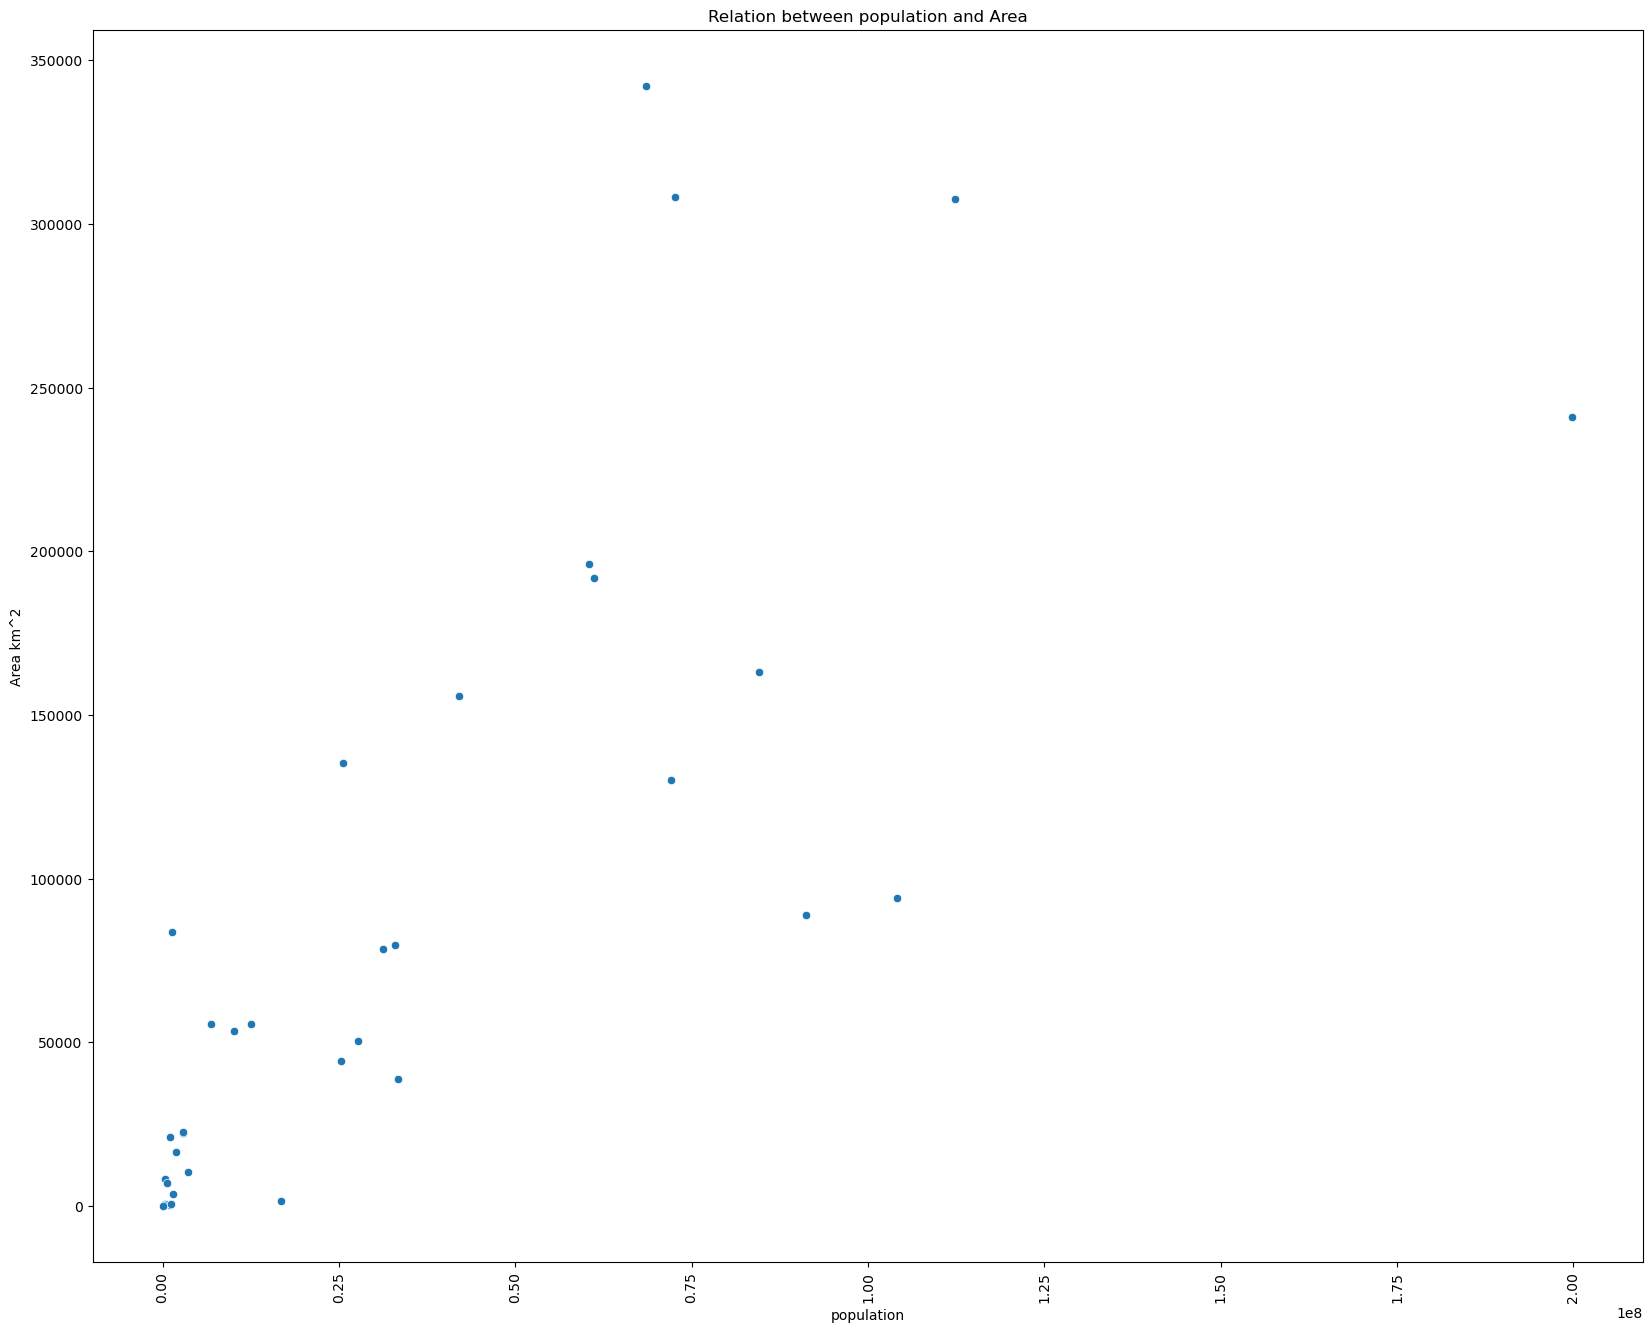

In [80]:
data = dff[dff['YEAR'] == 2011]
plt.figure(figsize=(20,16))
sns.scatterplot(x=data['population'] , y=data['Area km^2'] )
plt.title('Relation between population and Area')
plt.xticks(rotation=90)
plt.show()


-    In INdia the majority of states are highly density populated
-   Delhi is the highest populated density state
-    ARUNACHAL PRADESH is the lowest populated state



In [89]:
dff['Density'] = dff['population'] / dff['Area km^2']
dff.head(5)

STATE/UT  YEAR  RESIDENTIAL PREMISES - Dacoity  \
0  A & N ISLANDS  2001                               0   
1  A & N ISLANDS  2002                               0   
2  A & N ISLANDS  2003                               0   
3  A & N ISLANDS  2004                               0   
4  A & N ISLANDS  2005                               0   

   RESIDENTIAL PREMISES - Robbery  RESIDENTIAL PREMISES - Burglary  \
0                               0                               47   
1                               0                               44   
2                               0                               36   
3                               1                               47   
4                               1                               68   

   RESIDENTIAL PREMISES - Theft  HIGHWAYS - Dacoity  HIGHWAYS - Robbery  \
0                            18                   0                   0   
1                            16                   0                   0   
2                            14                   0                   0   
3                            20                   0                   0   
4                            20                   0                   0   

   HIGHWAYS - Burglary  HIGHWAYS - Theft  ...  OTHER PLACES - Theft  \
0                    0                 0  ...                    40   
1                    0                 0  ...                    30   
2                    0                 0  ...                    41   
3                    0                 0  ...                    68   
4                    0                 0  ...                    41   

   TOTAL - Dacoity  TOTAL - Robbery  TOTAL - Burglary  TOTAL - Theft  \
0                0                4                64             65   
1                1                7                49             49   
2                2                7                56             60   
3                0                3                69            103   
4                0                4                68             92   

   overall crimes  population  litercay rate  Area km^2    Density  
0             133      380581         86.63%       8249  46.136623  
1             106      380581         86.63%       8249  46.136623  
2             125      380581         86.63%       8249  46.136623  
3             175      380581         86.63%       8249  46.136623  
4             164      380581         86.63%       8249  46.136623  

[5 rows x 39 columns]

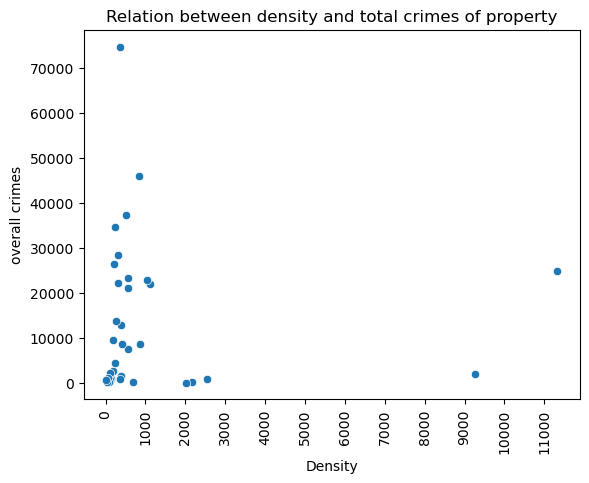

In [98]:
data = dff[dff['YEAR'] == 2011]
popu = data[['Density','overall crimes']].sort_values(by='Density' , ascending=False).reset_index()
sns.scatterplot(x=popu['Density'] , y=popu['overall crimes'] )
plt.title('Relation between density and total crimes of property')
plt.xticks(np.arange(0,12000,1000) , rotation=90)
plt.show()

according to statistics in 2011 we conclude that :

-  in india the vast majority of state are highly densily populated as the standard density of population is 45 km^2
-  in india Populated area does not make it more prone to criminality
- the vast majority of crimes happened in Areas with Density lower than 1000 persons per Km^2
- The highest number of crimes above 70000 happened in an area with density lower than 1000 persons per Km^2 and it is not the most highly densily populated which says rates of crimes and areas are variable and not coorrelated positively